# Telecom Churn Case Study

## Business Understanding

**About this Telecom industry**

Telecom industry experiences an average churn rate of 15 to 25% every year, due to frequent switching of customers from one service provider to the another. Retaining customers, especially high profitable customers is very important, as it costs more for new customer aqusition than existing customer retention. This Telecom industry is based on Indian and South-east Asian market.

**Business details**

- Payment options:
 - pre-paid: customer informing the existing operator to terminate their services, an indicator for churn.
 - post-paid: customer simply stop using the services, no indicator for churn (customer could be abroad).


- Churn types:
  - revenue-based churn: customer did not utilise any revenue-generating facilities, generating < ₹4 per month in total/average/median revenue.
  - usage-based churn: customer did not utilise any revenue-generating facilities over a period of time, after which it is too late for customer retention since, they would've already have made the switch.
 
 
- High-value churn: 80% of revenue comes from the top 20% customers. These are high-value customers.


- Data given: customer-level information for the months of June (6), July (7), August (8) and September (9).


- Phases of customer lifecycle:
 1. good (6th & 7th months): customer satisfied, usual behaviour
 2. action (8th month): customer unsatisfied, experiencing sore
 3. churn (9th month): customer probably churned
 
 
- Data Preparation & Modelling will be performed as per the directions given.

**Directions**

- Analyse customer-level data.
- Define high-value customers, based on their average recharge amount of > 70% during the good phase.
- Predict churn only on high-value customers, to reduce significant revenue leakage.
- Identify high-churn-risk customers in action phase, to implement corrective measures.
- Usage-based churn to be defined at churn phase.
- 9th month data to be discarded after encoding since, data unavailable for making any predictions i.e., not sure if churned or not.
- Post-paid customers are to be given more attention while churn prediction since, there is no indicator for churn.

**Aim of the assignment**

- Build a predictive model for the 9th month from the features of 6th, 7th and 8th months:
 - to identify the customers at high risk of churn.
 - to identify the important indicators of churn.


- Recommend strategies to the Business for managing the customer churn, based on insights.

## Importing Libraries and Filtering warnings

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules & Instantiation

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

## Reading Telecom Dataset

Let us load & read the given dataset. We store this dataset in the dataframe named "telecom".

In [5]:
# Display all rows & columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
# Read & print given dataset

telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## Data Cleaning

### Data Sanity check

Let us check for data inconsistency by looking into shape, data types, numerical distribution, if any missing values & outliers in the given dataset.

In [7]:
# Print shape

telecom.shape

(99999, 226)

In [8]:
# Print number of null/missing values, data types for each variable

telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

#### OBSERVATION

1. We have below number of variables in the given dataset:
    - 216 numerical variables i.e., 54 numerical variables, each suffixed with 6, 7, 8, 9, corresponding to respective months (or) 54 * 4 numerical variables
    - 12 categorical variables
    - Total 226 variables


2. 'churn' is our target variable, that is to be derived based on the average recharge amount of high-value customers. Our  target variable is binary.

In [9]:
# Numerical distribution

telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### Variables grouping according to context:


- Index variable:
<br>
"mobile_number"


- Date variables:
<br>
"last_date_of_month_{month}", "date_of_last_rech_{month}", "date_of_last_rech_data_{month}"


- Time variables (Minutes of usage, no. of days, duration of others):
<br>
"loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "onnet_mou_{month}", "offnet_mou_{month}", "roam_ic_mou_{month}", "roam_og_mou_{month}", "loc_og_t2t_mou_{month}", "loc_og_t2m_mou_{month}", "loc_og_t2f_mou_{month}", "loc_og_t2c_mou_{month}", "loc_og_mou_{month}", "std_og_t2t_mou_{month}", "std_og_t2m_mou_{month}", "std_og_t2f_mou_{month}", "std_og_t2c_mou_{month}", "std_og_mou_{month}",  "isd_og_mou_{month}", "spl_og_mou_{month}", "og_others_{month}", "total_og_mou_{month}", "loc_ic_t2t_mou_{month}", "loc_ic_t2m_mou_{month}", "loc_ic_t2f_mou_{month}", "loc_ic_mou_{month}", "std_ic_t2t_mou_{month}", "std_ic_t2m_mou_{month}", "std_ic_t2f_mou_{month}", "std_ic_t2o_mou_{month}", "std_ic_mou_{month}", "total_ic_mou_{month}", "spl_ic_mou_{month}", "isd_ic_mou_{month}", "ic_others_{month}", "aon"


- Count variables:
<br>
"total_rech_num_{month}", "total_rech_data_{month}", "count_rech_2g_{month}", "count_rech_3g_{month}", "monthly_2g_{month}", "sachet_2g_{month}", "monthly_3g_{month}", "sachet_3g_{month}"


- Quantification variables:
<br>
"max_rech_data_{month}", "vol_2g_mb_{month}", "vol_3g_mb_{month}"


- Cost variables:
<br>
"total_rech_amt_{month}", "max_rech_amt_{month}", "last_day_rch_amt_{month}", "av_rech_amt_data_{month}", "arpu_3g_{month}", "arpu_2g_{month}", "arpu_{month}", "{month}_vbc_3g"


- Categorical variables:
<br>
"night_pck_user_{month}", "fb_user_{month}", "circle_id"

where, {month} = 6, 7, 8, 9

### Missing value imputation

We already saw that our dataset had missing values, during sanity check. Let us look at the missing values for each column and, handle them.

In [10]:
# Missing values percentage

round((100*telecom.isna().sum()/len(telecom)).sort_values(ascending=False),2)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

#### OBSERVATION
We could see above that the columns "date_of_last_rech_data_{month}", "total_rech_data_{month}" and "av_rech_amt_data_{month}" have same missing values (NaN) percentage. So, let us check if these columns have missing values in the same record.

Here, we have considered average recharge amount instead of total since, total is not available for data pack. Also, recharge amount can't be negative.

On the flip side, we could see that there are no missing values in amount of recharge and number of times recharged for voice call. Voice call have missing values only in the date column. These are actual missing values so, can't be imputed with zero.

In [11]:
# NaN records in date, count, amount columns of data pack for month 6

telecom.loc[telecom.date_of_last_rech_data_6.isna() & telecom.total_rech_data_6.isna() & telecom.av_rech_amt_data_6.isna(), ['date_of_last_rech_data_6', 'total_rech_data_6', 'av_rech_amt_data_6']].head()

date_of_last_rech_data_6  total_rech_data_6  av_rech_amt_data_6
1                      NaN                NaN                 NaN
2                      NaN                NaN                 NaN
3                      NaN                NaN                 NaN
5                      NaN                NaN                 NaN
6                      NaN                NaN                 NaN

In [12]:
# NaN records in date, count, amount columns of data pack for month 7

telecom.loc[telecom.date_of_last_rech_data_7.isna() & telecom.total_rech_data_7.isna() & telecom.av_rech_amt_data_7.isna(), ['date_of_last_rech_data_7', 'total_rech_data_7', 'av_rech_amt_data_7']].head()

date_of_last_rech_data_7  total_rech_data_7  av_rech_amt_data_7
2                      NaN                NaN                 NaN
3                      NaN                NaN                 NaN
4                      NaN                NaN                 NaN
5                      NaN                NaN                 NaN
6                      NaN                NaN                 NaN

In [13]:
# NaN records in date, count, amount columns of data pack for month 8

telecom.loc[telecom.date_of_last_rech_data_8.isna() & telecom.total_rech_data_8.isna() & telecom.av_rech_amt_data_8.isna(), ['date_of_last_rech_data_8', 'total_rech_data_8', 'av_rech_amt_data_8']].head()

date_of_last_rech_data_8  total_rech_data_8  av_rech_amt_data_8
2                      NaN                NaN                 NaN
3                      NaN                NaN                 NaN
4                      NaN                NaN                 NaN
5                      NaN                NaN                 NaN
6                      NaN                NaN                 NaN

In [14]:
# NaN records in date, count, amount columns of data pack for month 9

telecom.loc[telecom.date_of_last_rech_data_9.isna() & telecom.total_rech_data_9.isna() & telecom.av_rech_amt_data_9.isna(), ['date_of_last_rech_data_9', 'total_rech_data_9', 'av_rech_amt_data_9']].head()

date_of_last_rech_data_9  total_rech_data_9  av_rech_amt_data_9
0                      NaN                NaN                 NaN
1                      NaN                NaN                 NaN
3                      NaN                NaN                 NaN
4                      NaN                NaN                 NaN
5                      NaN                NaN                 NaN

In [15]:
# NaN% in date, count, amount columns of the same record for data pack in all months

date_amt_count_missing_data_6 = (telecom.date_of_last_rech_data_6.isna() & telecom.av_rech_amt_data_6.isna() & telecom.total_rech_data_6.isna()).sum()
date_amt_count_missing_data_7 = (telecom.date_of_last_rech_data_7.isna() & telecom.av_rech_amt_data_7.isna() & telecom.total_rech_data_7.isna()).sum()
date_amt_count_missing_data_8 = (telecom.date_of_last_rech_data_8.isna() & telecom.av_rech_amt_data_8.isna() & telecom.total_rech_data_8.isna()).sum()
date_amt_count_missing_data_9 = (telecom.date_of_last_rech_data_9.isna() & telecom.av_rech_amt_data_9.isna() & telecom.total_rech_data_9.isna()).sum()

print('NaN in date, count, amount for data pack in month 6 =', round((100*date_amt_count_missing_data_6/len(telecom)),2),'%')
print('NaN in date, count, amount for data pack in month 7 =', round((100*date_amt_count_missing_data_7/len(telecom)),2),'%')
print('NaN in date, count, amount for data pack in month 8 =', round((100*date_amt_count_missing_data_8/len(telecom)),2),'%')
print('NaN in date, count, amount for data pack in month 9 =', round((100*date_amt_count_missing_data_9/len(telecom)),2),'%')

NaN in date, count, amount for data pack in month 6 = 74.85 %
NaN in date, count, amount for data pack in month 7 = 74.43 %
NaN in date, count, amount for data pack in month 8 = 73.66 %
NaN in date, count, amount for data pack in month 9 = 74.08 %


#### OBSERVATION
By looking at the NaN columns & NaN% above, we could say that these columns have missing values in the same record, for all months.

We could say that if date, count, amount columns of the same record are missing then, it is most likely that the user hasn't made any recharge for data pack. Hence, we impute the missing values in "av_rech_amt_data_{month}" and "total_rech_data_{month}" of the same record as that of "date_of_last_rech_data_{month}", with zero, as these are meaningful missing. 'Date' can anyways not be zero.

In [16]:
# Missing value imputation with zero in 'data recharge amount' and 'data recharge count' for all months

for i in range(len(telecom)):
    if pd.isna((telecom['date_of_last_rech_data_6'][i]) and (telecom['total_rech_data_6'][i])):
        telecom['av_rech_amt_data_6'][i] = 0
        telecom['total_rech_data_6'][i] = 0
    if pd.isna((telecom['date_of_last_rech_data_7'][i]) and (telecom['total_rech_data_7'][i])):
        telecom['av_rech_amt_data_7'][i] = 0
        telecom['total_rech_data_7'][i] = 0
    if pd.isna((telecom['date_of_last_rech_data_8'][i]) and (telecom['total_rech_data_8'][i])):
        telecom['av_rech_amt_data_8'][i] = 0
        telecom['total_rech_data_8'][i] = 0
    if pd.isna((telecom['date_of_last_rech_data_9'][i]) and (telecom['total_rech_data_9'][i])):
        telecom['av_rech_amt_data_9'][i] = 0
        telecom['total_rech_data_9'][i] = 0

In [17]:
# Missing values in 'data recharge amount' columns

print('NaN in "av_rech_amt_data_6" =', telecom['av_rech_amt_data_6'].isna().sum())
print('NaN in "av_rech_amt_data_7" =', telecom['av_rech_amt_data_7'].isna().sum())
print('NaN in "av_rech_amt_data_8" =', telecom['av_rech_amt_data_8'].isna().sum())
print('NaN in "av_rech_amt_data_9" =', telecom['av_rech_amt_data_9'].isna().sum())

NaN in "av_rech_amt_data_6" = 0
NaN in "av_rech_amt_data_7" = 0
NaN in "av_rech_amt_data_8" = 0
NaN in "av_rech_amt_data_9" = 0


In [18]:
# Missing values in 'data recharge count' columns

print('NaN in "total_rech_data_6" =', telecom['total_rech_data_6'].isna().sum())
print('NaN in "total_rech_data_7" =', telecom['total_rech_data_7'].isna().sum())
print('NaN in "total_rech_data_8" =', telecom['total_rech_data_8'].isna().sum())
print('NaN in "total_rech_data_9" =', telecom['total_rech_data_9'].isna().sum())

NaN in "total_rech_data_6" = 0
NaN in "total_rech_data_7" = 0
NaN in "total_rech_data_8" = 0
NaN in "total_rech_data_9" = 0


#### OBSERVATION
Now, there are no missing values in 'data recharge amount' & '_count' for any month. Let us now drop those columns having missing values > 30 %.

In [19]:
# Drop columns having missing values > 30 %

for i in telecom:
    if (100*telecom[i].isna().sum()/len(telecom)) > 30:
        telecom.drop(i, axis = 1, inplace = True)

In [20]:
# Print shape

telecom.shape

(99999, 194)

#### OBSERVATION
We have dropped 32 columns, each having missing values > 30%. Note that we have already imputed the missing values in 'data recharge amount' & 'data recharge count' columns with zero. We have extracted required information from 'date' columns, which can now be dropped. Also, index/unique variables are not significant in any regression problem. So, we can drop them.

In [21]:
# Drop unecessary columns 

telecom.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'mobile_number'], axis = 1, inplace = True)

In [22]:
# Print shape

telecom.shape

(99999, 185)

#### OBSERVATION
We have dropped the remaining 'date' columns (some already dropped with 30% missing threshold) and, unique variable i.e., 8 + 1 columns.
<br>
We now have only one categorical variable in our dataset. Let's look at its class imbalance.

In [23]:
# Categorical level distribution in "circle_id"

print('Percentage of categorical levels in "circle_id" = \n\n', round(((telecom['circle_id'].value_counts())/len(telecom))*100,2))

Percentage of categorical levels in "circle_id" = 

 109    100.0
Name: circle_id, dtype: float64


#### OBSERVATION
We could see that "circle_id" has an extreme class imbalance, with just 1 level. Hence, we may drop this column, as it behaves like an unique identifier.

In [24]:
# Dropping unnecessary column

telecom.drop(['circle_id'], axis = 1, inplace = True)

In [25]:
# Print shape

telecom.shape

(99999, 184)

#### OBSERVATION
We have dropped 1 more variable from our dataset, now having 184 variables.

In [26]:
# Missing values percentage

round((100*telecom.isna().sum()/len(telecom)).sort_values(ascending=False),2)

std_og_t2c_mou_9      7.75
std_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
std_ic_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2m_mou_9      7.75
std_ic_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
isd_og_mou_9          7.75
roam_og_mou_9         7.75
std_ic_t2t_mou_9      7.75
spl_og_mou_9          7.75
og_others_9           7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_mou_9          7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_ic_mou_9         7.75
std_ic_mou_9          7.75
onnet_mou_9           7.75
isd_ic_mou_9          7.75
offnet_mou_9          7.75
std_ic_t2o_mou_9      7.75
ic_others_9           7.75
loc_ic_mou_8          5.38
spl_og_mou_8          5.38
offnet_mou_8          5.38
std_og_t2f_mou_8      5.38
std_ic_t2m_mou_8      5.38
std_og_mou_8          5.38
isd_og_mou_8          5.38
onnet_mou_8           5.38
s

#### OBSERVATION
We impute the variables having > 0% missing values with median, as we have only few missing values ranging from 0.6% to 8%. We use median since, we want these missing to be representative of most of the information. Also, we don't want any float data points on those variables having only whole numbers.

In [27]:
for i in telecom:
    if (100*telecom[i].isna().sum()/len(telecom)) != 0:
        telecom[i].fillna(telecom[i].median(), inplace=True)

In [28]:
# Missing values percentage

round((100*telecom.isna().sum()/len(telecom)).sort_values(ascending=False),2)

loc_og_t2o_mou        0.0
isd_ic_mou_9          0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
std_og_t2o_mou        0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
std_ic_mou_9          0.0
std_ic_mou_8          0.0
loc_ic_mou_9          0.0
std_ic_t2t_mou_6      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_m

Now, we have no missing values in our dataset.

## Filtering High Value Customers (HVC)

Let us find out the HVC based on their recharge amount for voice call & data pack, during the "good" phase in customer life-cycle. For that, we need to derive a new variable, for getting the average of 6th & 7th months total recharge amount (voice call + data pack).

As mentioned earlier, we don't have 'recharge amount' variable for data pack, unlike that for voice call. So, we use "av_rech_amt_data_{month}" * "total_rech_data_{month}" for data pack, equivalent to 'recharge amount' variable.

In [29]:
telecom['avg_rech_amt_6_7'] = ((telecom['total_rech_amt_6'] + (telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6'])) + (telecom['total_rech_amt_7'] + (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']))) / 2

In [30]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100        34.31        32.33         0.00        29.84         96.31   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0        91.735          0.00         87.29            0.0           0.00   
1        99.840        304.76         53.76            0.0           0.00   
2       220.590        208.36        118.91            0.0           0.00   
3       109.010         71.68        113.54            0.0          54.86   
4        91.880        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00             11.91             11.61              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             11.26             41.03             40.43              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             39.12              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00         65.11        63.685          0.00         61.84   
1              0.00         35.39       150.510        299.54         72.11   
2              0.48       

In [31]:
# Print shape

telecom.shape

(99999, 185)

#### OBSERVATION
We have now derived the variable "avg_rech_amt_6_7" and, added to our dataset, now having 185 variables.

We filter the top 30% customers (HVC) by setting the criterion that their average recharge amount (voice call + data pack, months 6 & 7) must be at-least 70%.

In [32]:
# Compute 70th percentile of "avg_rech_amt_6_7"

avg_rech_amt_6_7_70perc = np.percentile(telecom['avg_rech_amt_6_7'], 70, interpolation = 'midpoint')
avg_rech_amt_6_7_70perc

478.0

In [33]:
# Filtering HVC

telecom = telecom[telecom['avg_rech_amt_6_7'] >= avg_rech_amt_6_7_70perc]

In [34]:
# Print shape

telecom.shape

(30001, 185)

#### OBSERVATION
We have now filtered our HVC, retaining only ~ 30% of our data (from 99999 to 30001 rows). HVC filtering is based on Pareto's principle but, 30% - 70%.

## Deriving Target variable (churn)

We derive our target variable from *usage-based* churn i.e., the customers are completely inactive. We use 9th month data to derive our target variable, as this is the 'churn' phase. A customer is said to churn if he/she has all the below checked by now:

- total incoming minutes of usage = 0 mins
- total outgoing minutes of usage = 0 mins
- total 2G data volume of usage = 0 MB
- total 3G data volume of usage = 0 MB

In [35]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0              0.0             0.0             0.0   197.385   214.816   
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
21             0.0             0.0             0.0   514.453   597.753   
23             0.0             0.0             0.0    74.350   193.897   

      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0    213.803   21.100        34.31        32.33         0.00        29.84   
7   3171.480  500.000        57.84        54.68        52.29        29.84   
8    137.362  166.787       413.69       351.03        35.08        33.46   
21   637.760  578.596       102.41       132.11        85.14       161.63   
23   366.966  811.480        48.96        50.66        33.58        15.74   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0          96.31        91.735          0.00         87.29           0.00   
7         453.43       567.160        325.91         87.29          16.23   
8          94.66        80.630        136.48        108.71           0.00   
21        757.93       896.680        983.39        869.89           0.00   
23         85.41        89.360        205.89        111.88           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0            0.00           0.00            0.0           0.00           0.00   
7           33.49          31.64            0.0          23.74          12.59   
8            0.00           0.00            0.0           0.00           0.00   
21           0.00           0.00            0.0           0.00           0.00   
23           0.00           0.00            0.0           0.00           0.00   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.00            0.0             11.91             11.61   
7           38.06            0.0             51.39             31.38   
8            0.00            0.0            297.13            217.59   
21           0.00            0.0              4.48              6.16   
23           0.00            0.0             48.96             50.66   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00             11.26             41.03             40.43   
7              40.28             11.26            308.63            447.38   
8              12.49             26.13             80.96             70.58   
21             23.34             29.98             91.81             87.93   
23             33.58             15.74             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00             39.12              0.00              0.00   
7             162.28             39.12             62.13             55.14   
8              50.54             34.58              0.00              0.00   
21            104.81            107.54              0.75              0.00   
23            148.56             83.73              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               0.00              0.00               0.0               0.0   
7              53.23              0.00               0.0               0.0   
8               0.00              0.00               0.0               0.0   
21              1.58              0.00               0.0               0.0   
23              0.00              2.45               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0               0.00              0.00         65.11        63.685   
7               0.00              0.00        422.16       533.910   
8               7.15              0.00        378.09       288.180   
21              0.00      

#### OBSERVATION
We reset the index of our dataset for deriving 'churn' based on condition. Note that most rows have been dropped so, indices are increasing non-uniformly.

In [36]:
# Reset index

telecom.reset_index(drop=True, inplace=True)

In [37]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100        34.31        32.33         0.00        29.84   
1  3171.480  500.000        57.84        54.68        52.29        29.84   
2   137.362  166.787       413.69       351.03        35.08        33.46   
3   637.760  578.596       102.41       132.11        85.14       161.63   
4   366.966  811.480        48.96        50.66        33.58        15.74   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0         96.31        91.735          0.00         87.29           0.00   
1        453.43       567.160        325.91         87.29          16.23   
2         94.66        80.630        136.48        108.71           0.00   
3        757.93       896.680        983.39        869.89           0.00   
4         85.41        89.360        205.89        111.88           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00            0.0           0.00           0.00   
1          33.49          31.64            0.0          23.74          12.59   
2           0.00           0.00            0.0           0.00           0.00   
3           0.00           0.00            0.0           0.00           0.00   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00            0.0             11.91             11.61   
1          38.06            0.0             51.39             31.38   
2           0.00            0.0            297.13            217.59   
3           0.00            0.0              4.48              6.16   
4           0.00            0.0             48.96             50.66   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00             11.26             41.03             40.43   
1             40.28             11.26            308.63            447.38   
2             12.49             26.13             80.96             70.58   
3             23.34             29.98             91.81             87.93   
4             33.58             15.74             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00             39.12              0.00              0.00   
1            162.28             39.12             62.13             55.14   
2             50.54             34.58              0.00              0.00   
3            104.81            107.54              0.75              0.00   
4            148.56             83.73              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00               0.0               0.0   
1             53.23              0.00               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              1.58              0.00               0.0               0.0   
4              0.00              2.45               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00         65.11        63.685   
1              0.00              0.00        422.16       533.910   
2              7.15              0.00        378.09       288.180   
3              0.00              0.00         97.04        94.090   
4       

#### OBSERVATION
Index of our dataset has been reset. Indices are now increasing uniformly.

In [38]:
# Derive 'churn'

telecom['churn'] = 0

for i in range(len(telecom)):
    if telecom['total_ic_mou_9'][i] == 0 and telecom['total_og_mou_9'][i] == 0 and telecom['vol_2g_mb_9'][i] == 0 and telecom['vol_3g_mb_9'][i] == 0:
        telecom['churn'][i] = 1

In [39]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100        34.31        32.33         0.00        29.84   
1  3171.480  500.000        57.84        54.68        52.29        29.84   
2   137.362  166.787       413.69       351.03        35.08        33.46   
3   637.760  578.596       102.41       132.11        85.14       161.63   
4   366.966  811.480        48.96        50.66        33.58        15.74   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0         96.31        91.735          0.00         87.29           0.00   
1        453.43       567.160        325.91         87.29          16.23   
2         94.66        80.630        136.48        108.71           0.00   
3        757.93       896.680        983.39        869.89           0.00   
4         85.41        89.360        205.89        111.88           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00            0.0           0.00           0.00   
1          33.49          31.64            0.0          23.74          12.59   
2           0.00           0.00            0.0           0.00           0.00   
3           0.00           0.00            0.0           0.00           0.00   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00            0.0             11.91             11.61   
1          38.06            0.0             51.39             31.38   
2           0.00            0.0            297.13            217.59   
3           0.00            0.0              4.48              6.16   
4           0.00            0.0             48.96             50.66   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00             11.26             41.03             40.43   
1             40.28             11.26            308.63            447.38   
2             12.49             26.13             80.96             70.58   
3             23.34             29.98             91.81             87.93   
4             33.58             15.74             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00             39.12              0.00              0.00   
1            162.28             39.12             62.13             55.14   
2             50.54             34.58              0.00              0.00   
3            104.81            107.54              0.75              0.00   
4            148.56             83.73              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00               0.0               0.0   
1             53.23              0.00               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              1.58              0.00               0.0               0.0   
4              0.00              2.45               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00         65.11        63.685   
1              0.00              0.00        422.16       533.910   
2              7.15              0.00        378.09       288.180   
3              0.00              0.00         97.04        94.090   
4       

In [40]:
# Print shape

telecom.shape

(30001, 186)

#### OBSERVATION
We have now derived our target variable "churn" and, added to our dataset, now having 186 variables.

<AxesSubplot:ylabel='churn'>

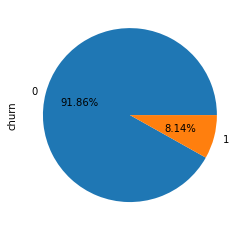

In [41]:
telecom['churn'].value_counts().plot.pie(autopct='%1.2f%%')

#### OBSERVATION
We could see that 8.14% of the high-value customers are likely to be churned. Note that we had filtered the top 30% customers and, not the top 20%.
<br>
Let us drop the redundant 9th month columns after getting insights from EDA. Also, make final data preparations before modelling. 

## Data Preparation

### Deriving meaningful features

In today's market, there is more demand for data pack than voice calls. Also, some data packs include voice call packages too and, not vice-versa. So, we focus more on the data packs. We derive 2 numerical features based on volume of data usage and, number of data services subscribed for, in a month. We derive 1 categorical feature based on customer credibility i.e., how long the customer have been using our services (T-network).

- Volume of data usage "data_usage_{month}" --> "vol_2g_mb_{month}" + "vol_3g_mb_{month}"
- *#*data services subscribed "data_services_{month}" --> "monthly_2g_{month}" + "sachet_2g_{month}" + "monthly_3g_{month}" + "sachet_3g_{month}" 
- Customer credibility "cred" -->
 - 0 to 1000 days spent on T-network "aon" = bronze
 - 1001 to 3000 days spent on T-network "aon" = silver
 - 3001 to 5000 days spent on T-network "aon" = gold
 - *>*5000 days spent on T-network "aon" = platinum

In [42]:
# Derive numerical features

telecom['data_usage_6'] = telecom['vol_2g_mb_6'] + telecom['vol_3g_mb_6']
telecom['data_services_6'] = telecom['monthly_2g_6'] + telecom['sachet_2g_6'] + telecom['monthly_3g_6'] + telecom['sachet_3g_6']
telecom['data_usage_7'] = telecom['vol_2g_mb_7'] + telecom['vol_3g_mb_7']
telecom['data_services_7'] = telecom['monthly_2g_7'] + telecom['sachet_2g_7'] + telecom['monthly_3g_7'] + telecom['sachet_3g_7']
telecom['data_usage_8'] = telecom['vol_2g_mb_8'] + telecom['vol_3g_mb_8']
telecom['data_services_8'] = telecom['monthly_2g_8'] + telecom['sachet_2g_8'] + telecom['monthly_3g_8'] + telecom['sachet_3g_8']
telecom['data_usage_9'] = telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
telecom['data_services_9'] = telecom['monthly_2g_9'] + telecom['sachet_2g_9'] + telecom['monthly_3g_9'] + telecom['sachet_3g_9']

In [43]:
# Derive categorical features

telecom['cred'] = 'NaN'

for i in range(len(telecom)):
    if telecom['aon'][i]>=0 and telecom['aon'][i]<=1000:
        telecom['cred'][i] = 'bronze'
    elif telecom['aon'][i]>=1001 and telecom['aon'][i]<=3000:
        telecom['cred'][i] = 'silver'
    elif telecom['aon'][i]>=3001 and telecom['aon'][i]<=5000:
        telecom['cred'][i] = 'gold'
    else:
        telecom['cred'][i] = 'platinum'

In [44]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100        34.31        32.33         0.00        29.84   
1  3171.480  500.000        57.84        54.68        52.29        29.84   
2   137.362  166.787       413.69       351.03        35.08        33.46   
3   637.760  578.596       102.41       132.11        85.14       161.63   
4   366.966  811.480        48.96        50.66        33.58        15.74   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0         96.31        91.735          0.00         87.29           0.00   
1        453.43       567.160        325.91         87.29          16.23   
2         94.66        80.630        136.48        108.71           0.00   
3        757.93       896.680        983.39        869.89           0.00   
4         85.41        89.360        205.89        111.88           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00            0.0           0.00           0.00   
1          33.49          31.64            0.0          23.74          12.59   
2           0.00           0.00            0.0           0.00           0.00   
3           0.00           0.00            0.0           0.00           0.00   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00            0.0             11.91             11.61   
1          38.06            0.0             51.39             31.38   
2           0.00            0.0            297.13            217.59   
3           0.00            0.0              4.48              6.16   
4           0.00            0.0             48.96             50.66   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00             11.26             41.03             40.43   
1             40.28             11.26            308.63            447.38   
2             12.49             26.13             80.96             70.58   
3             23.34             29.98             91.81             87.93   
4             33.58             15.74             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00             39.12              0.00              0.00   
1            162.28             39.12             62.13             55.14   
2             50.54             34.58              0.00              0.00   
3            104.81            107.54              0.75              0.00   
4            148.56             83.73              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00               0.0               0.0   
1             53.23              0.00               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              1.58              0.00               0.0               0.0   
4              0.00              2.45               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00         65.11        63.685   
1              0.00              0.00        422.16       533.910   
2              7.15              0.00        378.09       288.180   
3              0.00              0.00         97.04        94.090   
4       

In [45]:
# Print shape

telecom.shape

(30001, 195)

#### OBSERVATION
We have now derived 2 numerical variables for each month and, 1 categorical variable i.e., ((4 x 2) + 1) variables. We've added all these 9 variables to our dataset, now having 195 variables.

### Dropping redundant variables

We drop the redundant variables, after condensing the information, by deriving required features / criterion.

- Variable --> derived Feature / Criterion
- "vol_2g_mb_{month}" + "vol_3g_mb_{month}" --> "data_usage_{month}"
- "monthly_2g_{month}" + "sachet_2g_{month}" + "monthly_3g_{month}" + "sachet_3g_{month}" --> "data_services_{month}"
- "aon" --> "cred"
- "avg_rech_amt_6_7" --> filter high-value customers

We also drop the below variables, as there are no keywords for 'others' in our data dictionary:
- incoming calls from others "ic_others_{month}"
- outgoing calls to others "og_others_{month}"    

In [46]:
# Drop unecessary columns 

telecom.drop(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon', 'avg_rech_amt_6_7', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9'], axis = 1, inplace = True)

In [47]:
# Print shape

telecom.shape

(30001, 161)

#### OBSERVATION
We have dropped ((6 x 4) + 1 + 1 + (2 x 4)), a total of 34 redundant variables from our dataset, now having 161 variables. 

## Exploratory Data Analysis (EDA)

Let us perform EDA to get business insights.

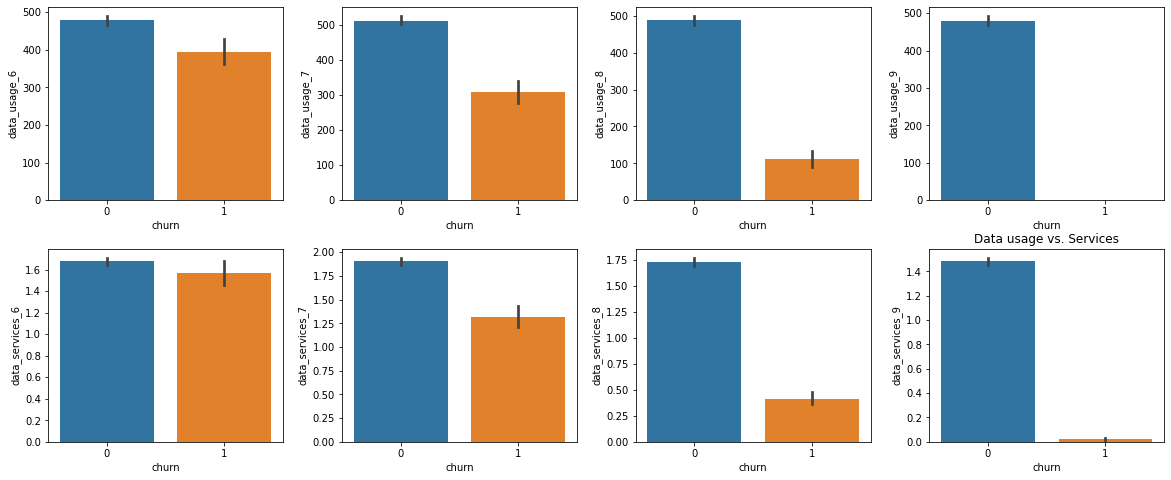

In [48]:
# Customer churn with respect to data usage & services

plt.figure(figsize=(20, 8))
plt.subplot(2,4,1)
sns.barplot(x='churn', y='data_usage_6', data=telecom)
plt.subplot(2,4,2)
sns.barplot(x='churn', y='data_usage_7', data=telecom)
plt.subplot(2,4,3)
sns.barplot(x='churn', y='data_usage_8', data=telecom)
plt.subplot(2,4,4)
sns.barplot(x='churn', y='data_usage_9', data=telecom)
plt.subplot(2,4,5)
sns.barplot(x='churn', y='data_services_6', data=telecom)
plt.subplot(2,4,6)
sns.barplot(x='churn', y='data_services_7', data=telecom)
plt.subplot(2,4,7)
sns.barplot(x='churn', y='data_services_8', data=telecom)
plt.subplot(2,4,8)
sns.barplot(x='churn', y='data_services_9', data=telecom)
plt.title('Data usage vs. Services')
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

Text(0.5, 1.0, 'Customer credibility')

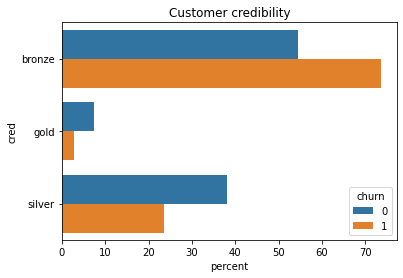

In [49]:
# Customer churn with respect to their credibility

sns.barplot(x='percent', y='cred', hue='churn', data=telecom.groupby(['churn'])['cred'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('cred'), orient='h')
plt.title('Customer credibility')

Text(0.5, 1.0, 'Data usage vs. Services')

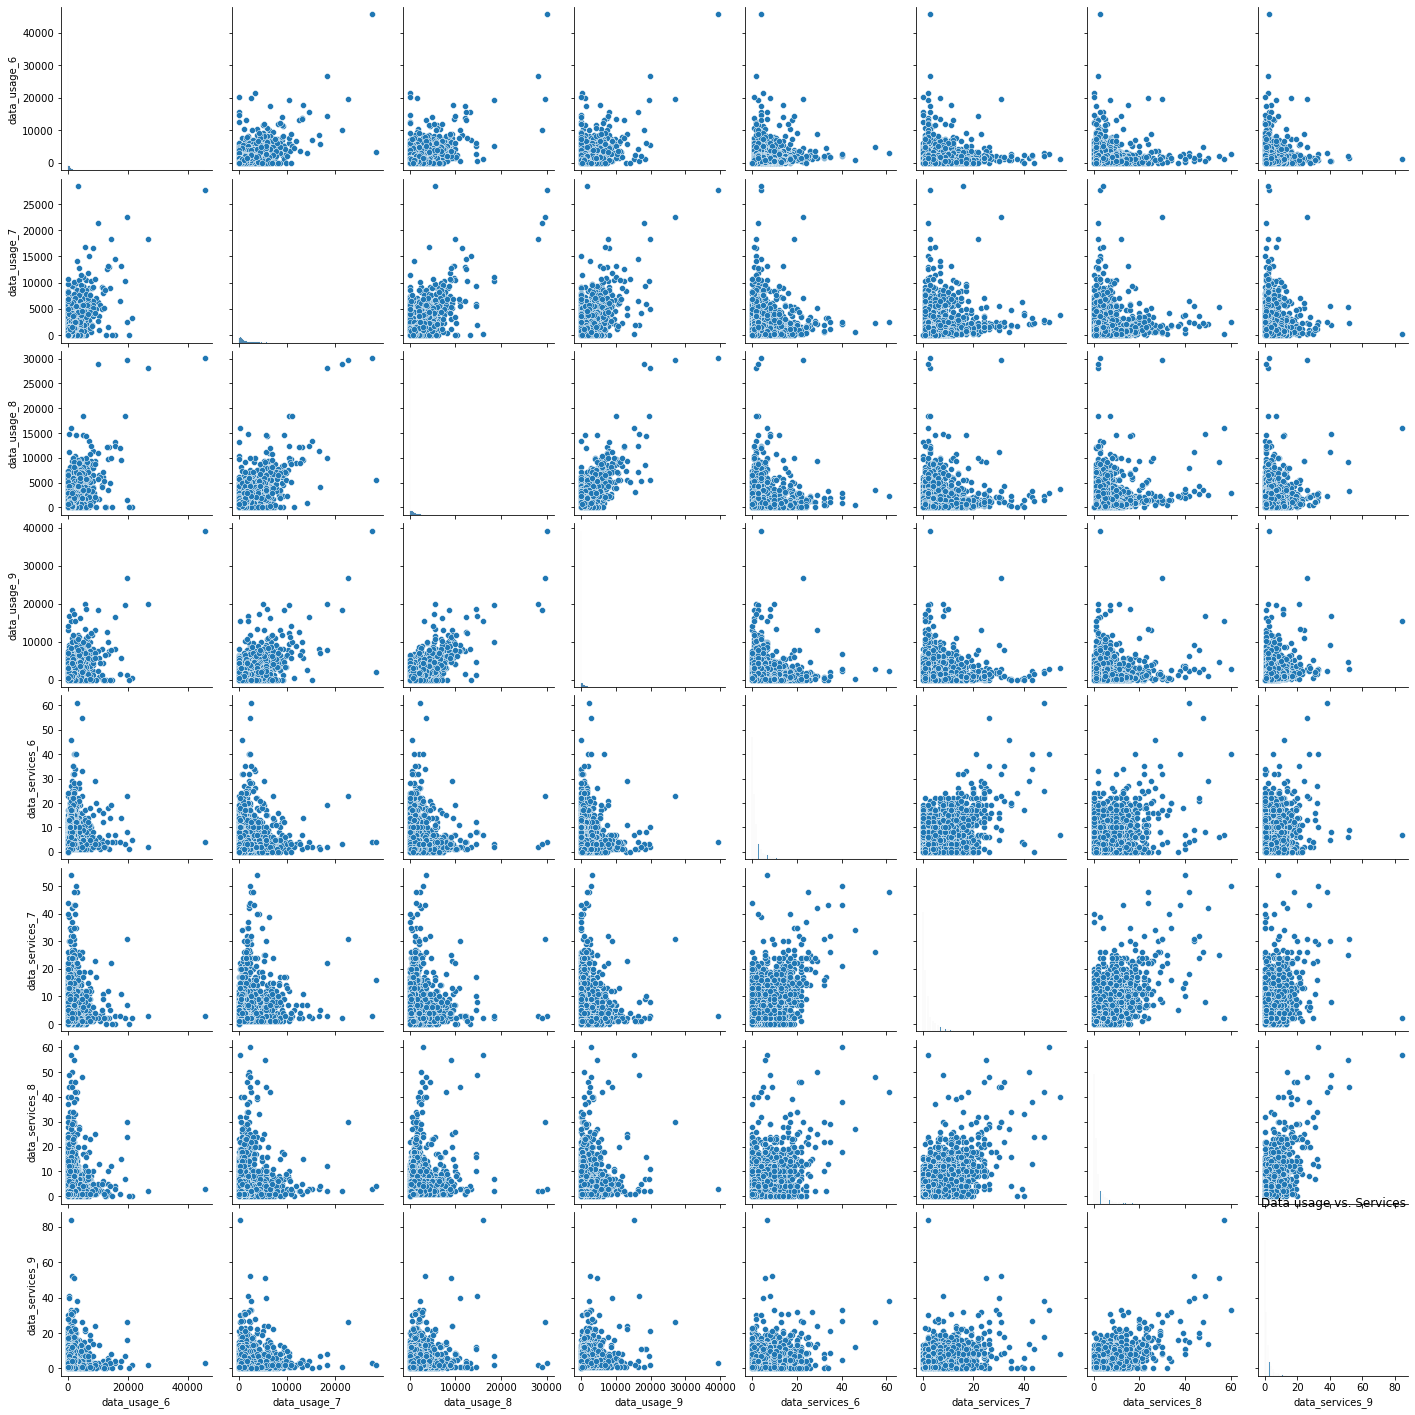

In [50]:
# Pair-wise correlation between data usage & services for each month

sns.pairplot(telecom[['data_usage_6', 'data_usage_7', 'data_usage_8', 'data_usage_9', 'data_services_6', 'data_services_7', 'data_services_8', 'data_services_9']])
plt.title('Data usage vs. Services')

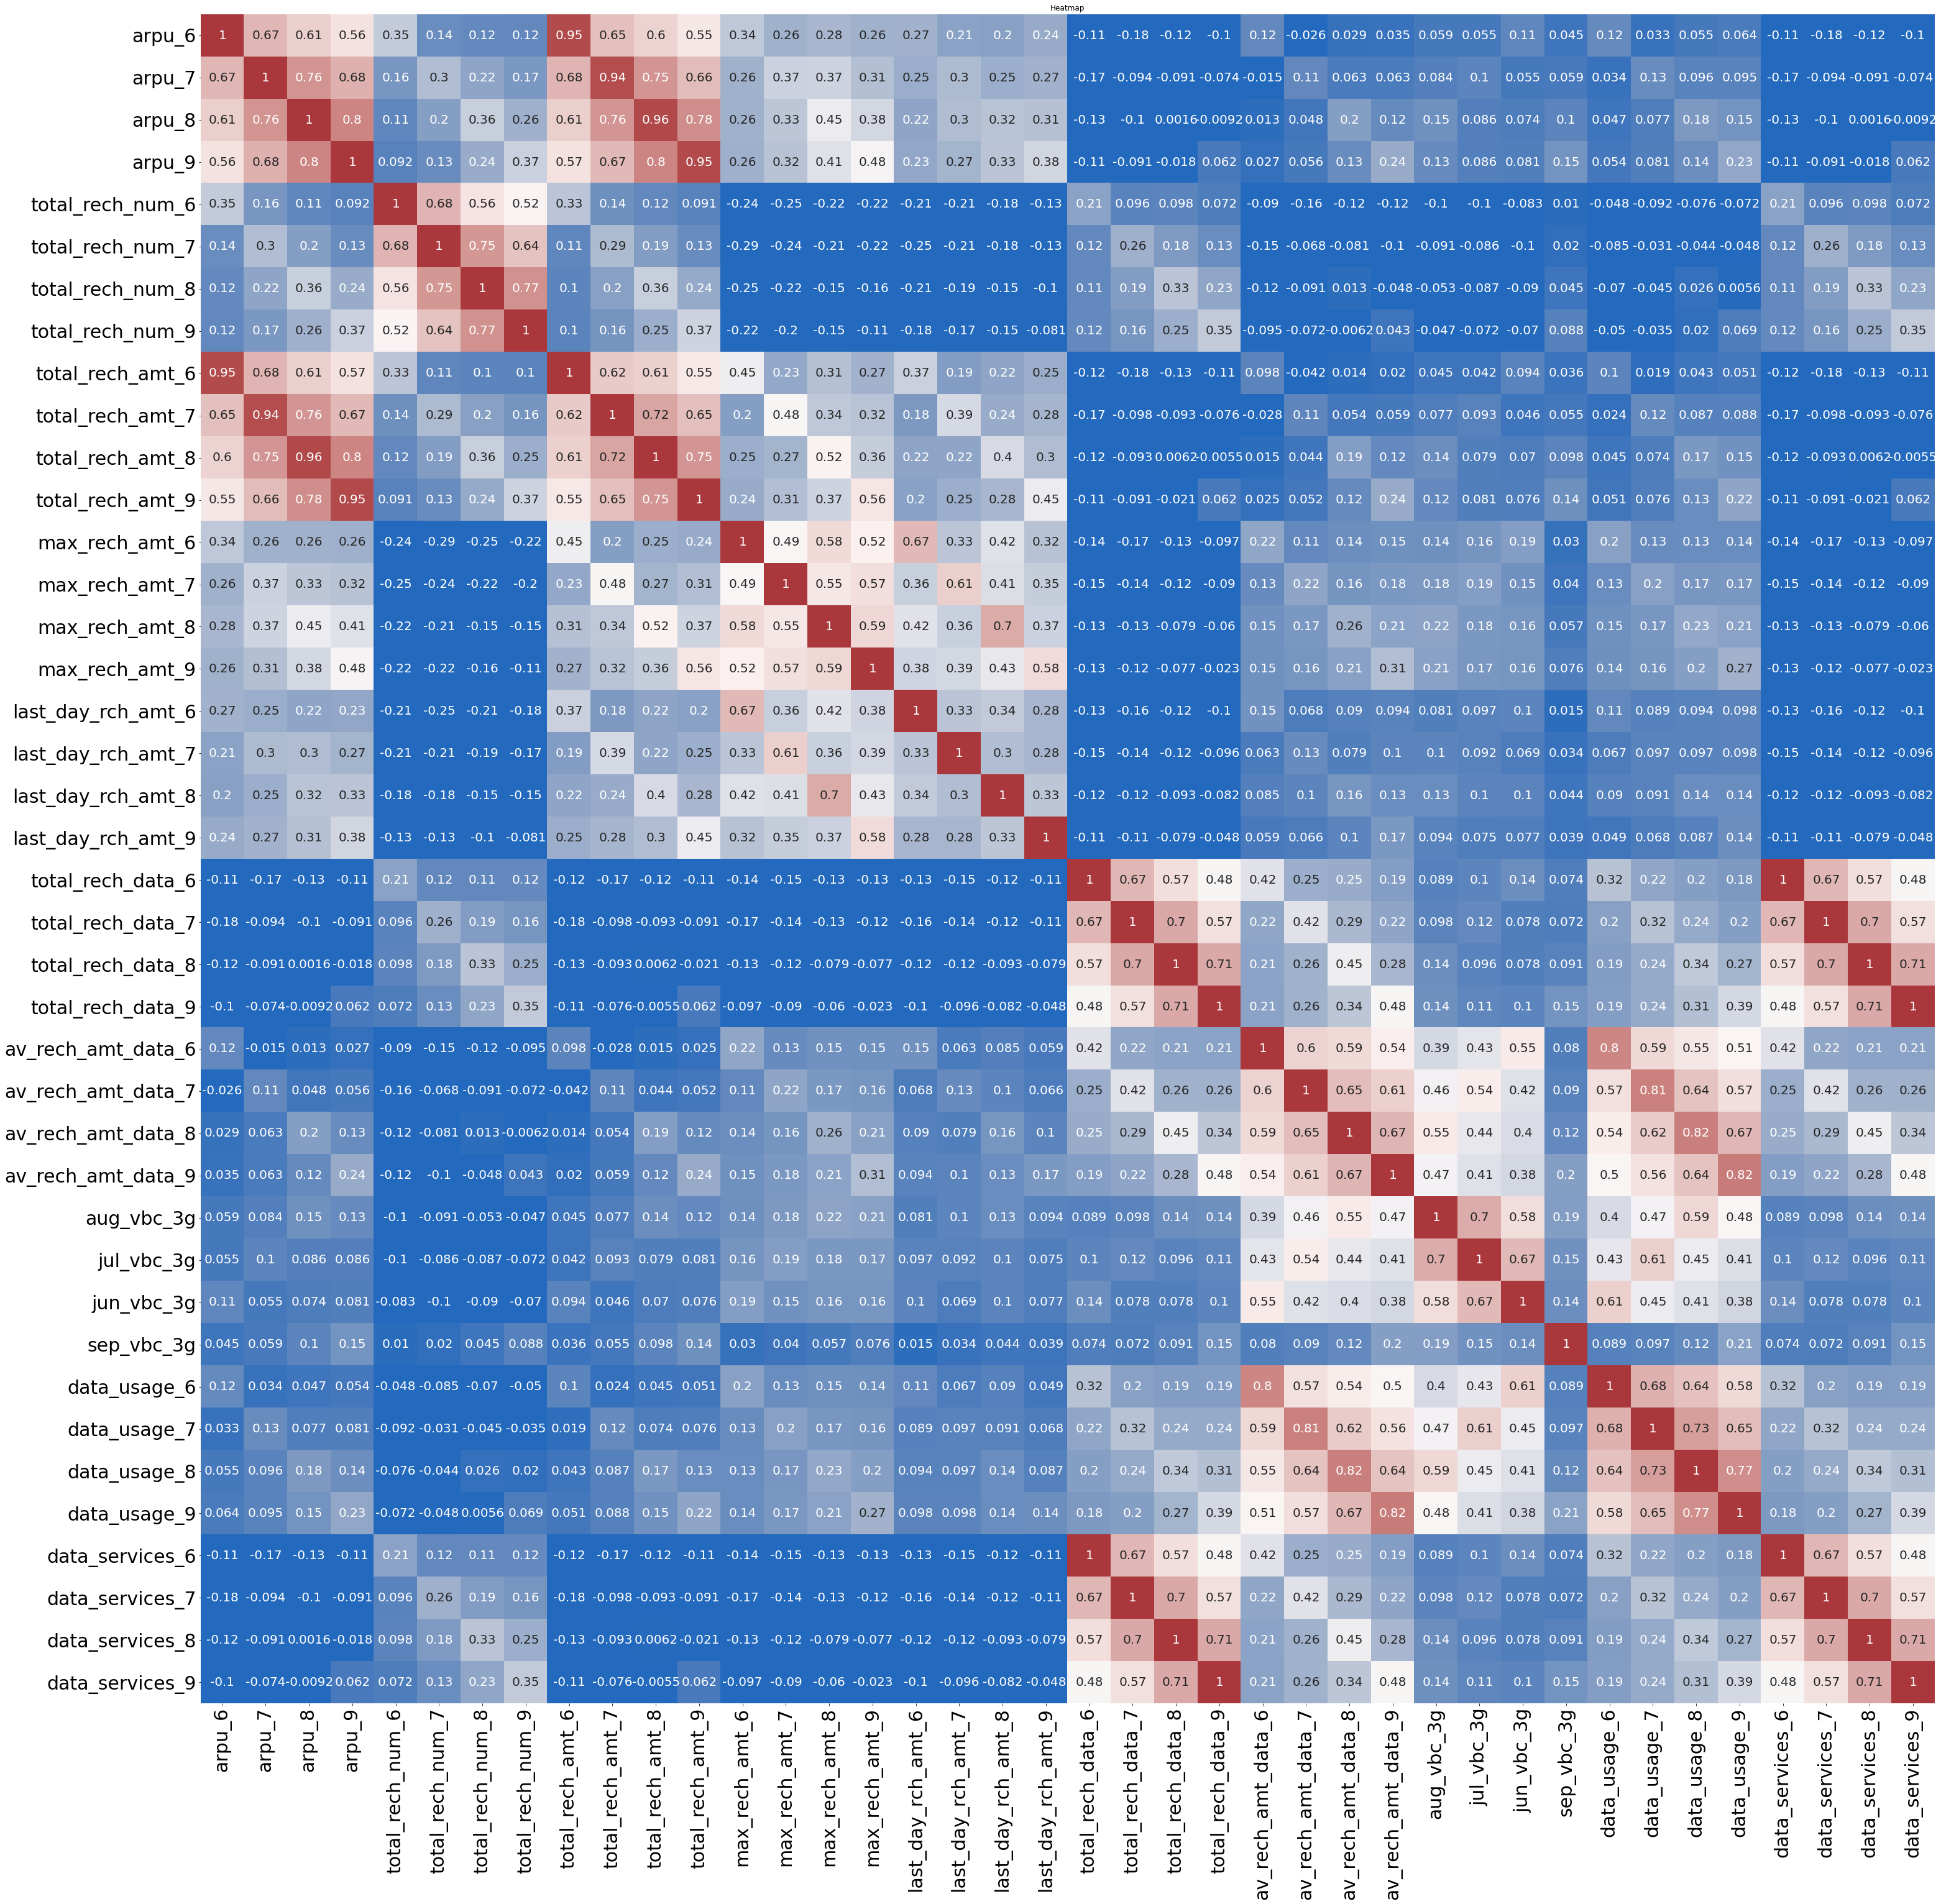

In [51]:
# Correlation heatmap for all numerical variables except mou's

plt.figure(figsize=(50,50))
sns.heatmap((telecom[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'data_usage_6', 'data_usage_7', 'data_usage_8', 'data_usage_9', 'data_services_6', 'data_services_7', 'data_services_8', 'data_services_9']]).corr(), cmap='vlag', annot=True, annot_kws={'size': 20}, vmin=0, vmax=1, cbar=False)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title('Heatmap')
plt.show()

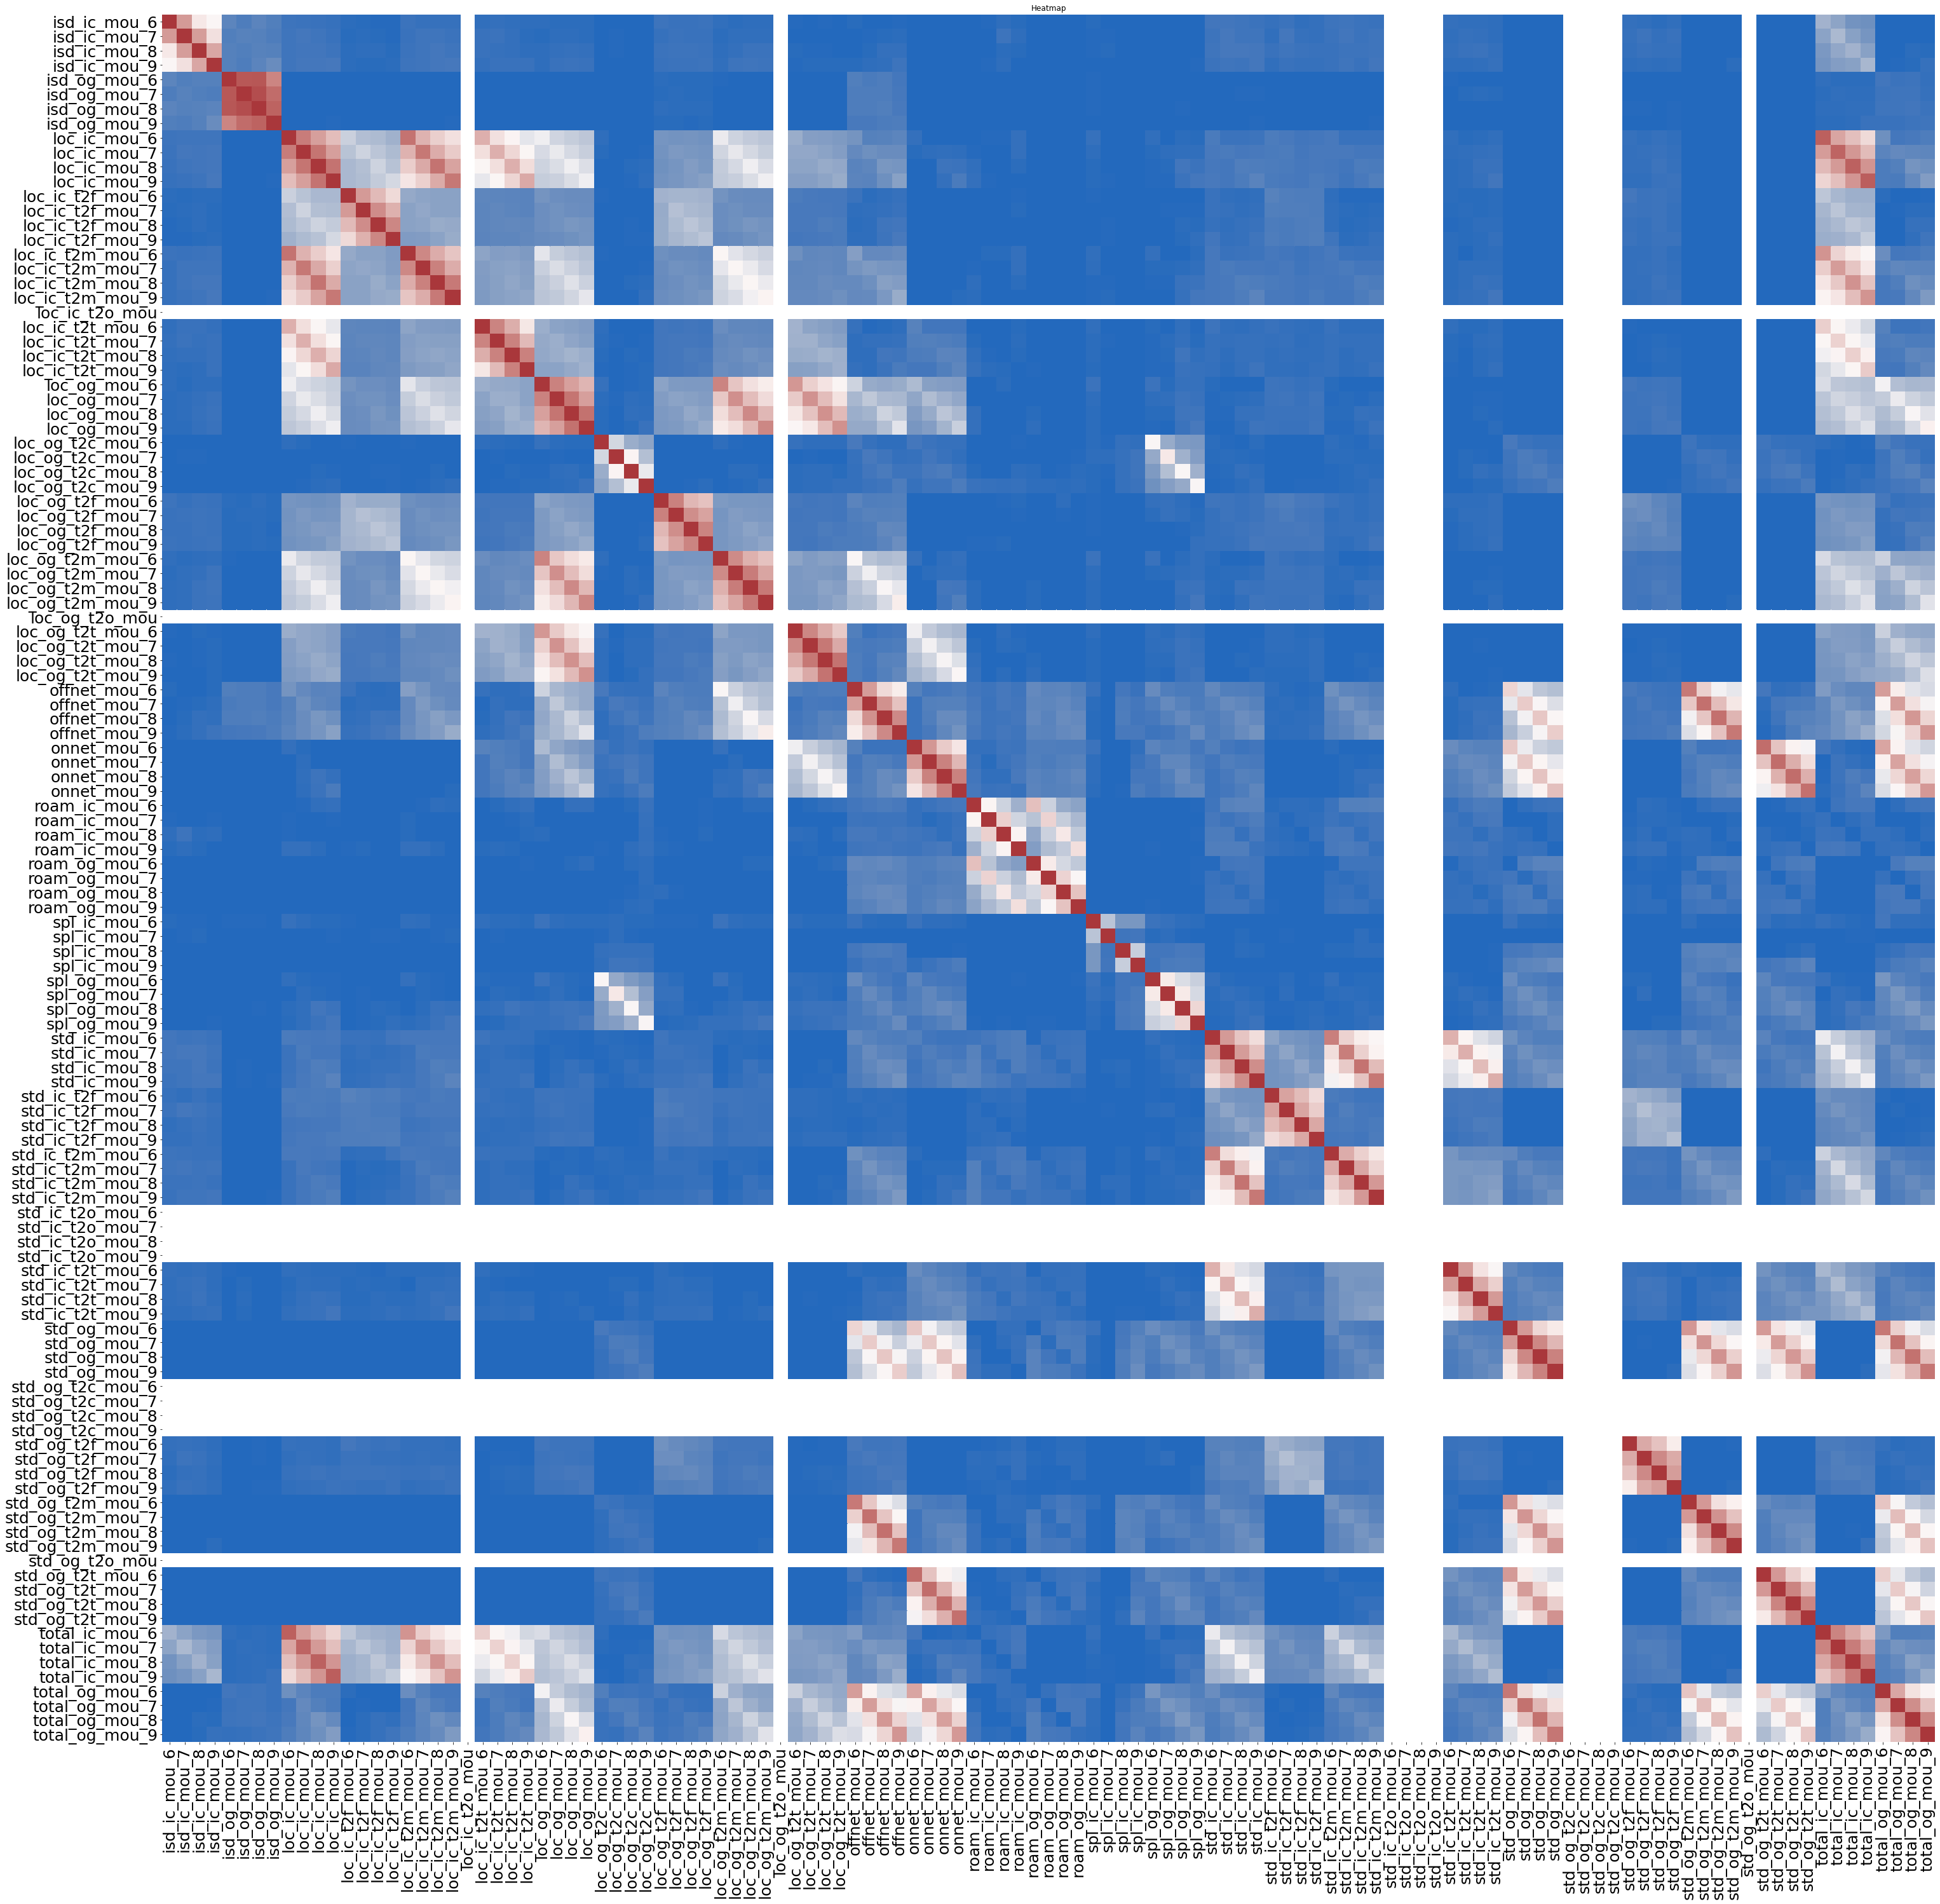

In [52]:
# Correlation heatmap for all mou variables, with churn

plt.figure(figsize=(50,50))
sns.heatmap((telecom[telecom.columns.difference(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'data_usage_6', 'data_usage_7', 'data_usage_8', 'data_usage_9', 'data_services_6', 'data_services_7', 'data_services_8', 'data_services_9', 'cred', 'churn'])]).corr(), cmap='vlag', vmin=0, vmax=1, cbar=False)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Heatmap')
plt.show()

**Note:** We have got rid of the legend / colorbar and, set the color bar limit as 0 to ±1, to accomodate for space constraint.

#### INSIGHTS

- From heatmap, we could see that the total recharge number and data services are least related.
- From heatmap, we could see that the total recharge data and data services are highly correlated.
- From data usage vs. services bar graph, we can see that churning customers usage of services is lesser than non-churn customers.
- From customer credibility bar graph, we can say that the customers usage of T-Network reduces with the increase in customer credibility.
- From data usage vs. services pairplot, no significant trend is observed.

## Data Preparation (after EDA)

**Dropping redundant variables**

We drop all the variables related to 9th month, to avoid overfitting of the model, as we have derived our target variable based on 9th month's data.

In [53]:
# Drop unecessary columns 

telecom.drop(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'data_usage_9', 'data_services_9'], axis = 1, inplace = True)

In [54]:
# Print shape

telecom.shape

(30001, 123)

We have dropped 38 redundant variables (9th month column) from our dataset, now having 123 variables.

**Outlier treatment**

Let us look for any outliers if present and, the distribution of our derived variables.

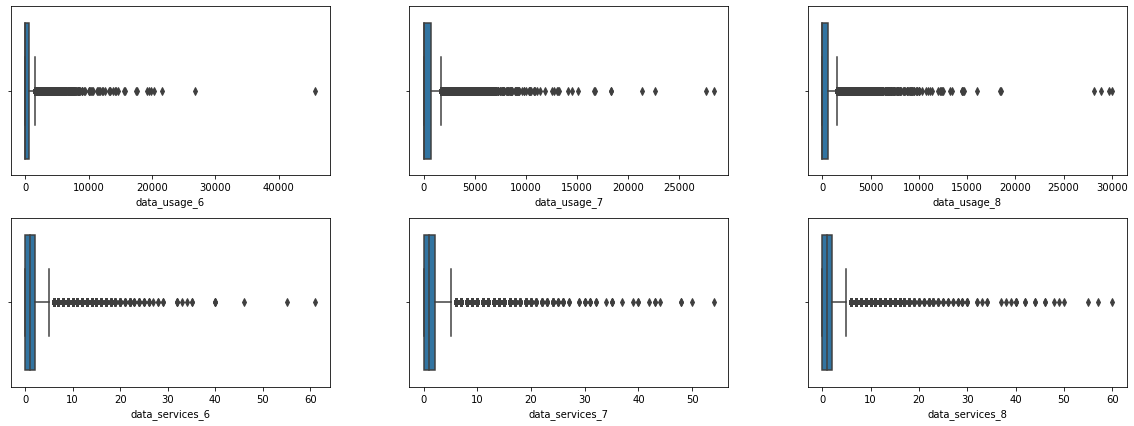

In [55]:
# Check outliers for data usage & services

plt.figure(figsize=(20, 7))
plt.subplot(2,3,1)
sns.boxplot(telecom['data_usage_6'])
plt.subplot(2,3,2)
sns.boxplot(telecom['data_usage_7'])
plt.subplot(2,3,3)
sns.boxplot(telecom['data_usage_8'])
plt.subplot(2,3,4)
sns.boxplot(telecom['data_services_6'])
plt.subplot(2,3,5)
sns.boxplot(telecom['data_services_7'])
plt.subplot(2,3,6)
sns.boxplot(telecom['data_services_8'])
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

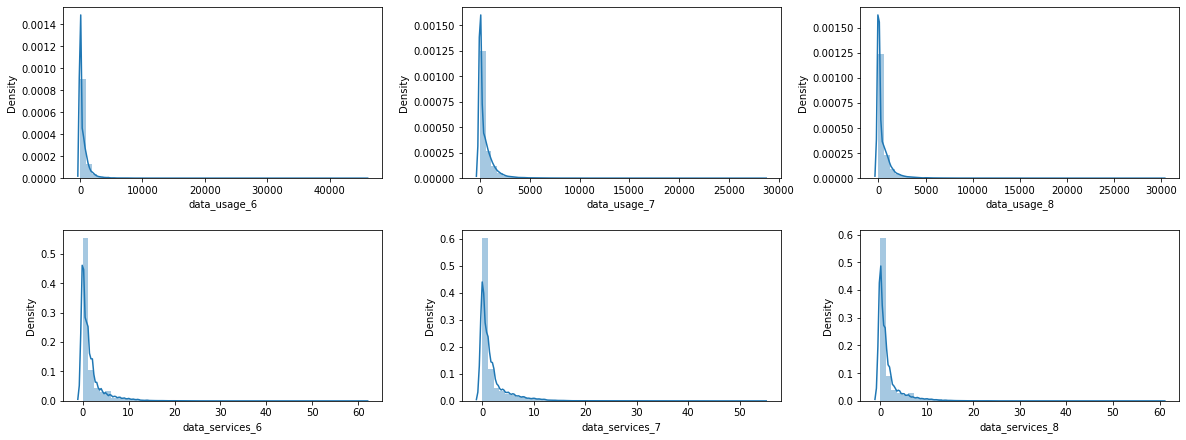

In [56]:
# Distribution of data usage & services

plt.figure(figsize=(20, 7.25))
plt.subplot(2,3,1)
sns.distplot(telecom['data_usage_6'])
plt.subplot(2,3,2)
sns.distplot(telecom['data_usage_7'])
plt.subplot(2,3,3)
sns.distplot(telecom['data_usage_8'])
plt.subplot(2,3,4)
sns.distplot(telecom['data_services_6'])
plt.subplot(2,3,5)
sns.distplot(telecom['data_services_7'])
plt.subplot(2,3,6)
sns.distplot(telecom['data_services_8'])
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

We could see that all our derived numerical variables have many outliers. We treat these outliers using the Interquartile (IQR) Rule.

*Interquartile Rule*
<br>
Q1 = 25th percentile of the entire variable range
<br>
Q3 = 75th percentile of the entire variable range
<br>
*IQR = Q3 - Q1*

Outlier ∉ [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
<br>
We need to minimize these outliers.

In [57]:
# Getting IQR

Q1_data_usage_6 = np.percentile(telecom['data_usage_6'], 25, interpolation = 'midpoint')
Q3_data_usage_6 = np.percentile(telecom['data_usage_6'], 75, interpolation = 'midpoint')  
IQR_data_usage_6 = Q3_data_usage_6 - Q1_data_usage_6
Q1_data_usage_7 = np.percentile(telecom['data_usage_7'], 25, interpolation = 'midpoint')
Q3_data_usage_7 = np.percentile(telecom['data_usage_7'], 75, interpolation = 'midpoint')  
IQR_data_usage_7 = Q3_data_usage_7 - Q1_data_usage_7
Q1_data_usage_8 = np.percentile(telecom['data_usage_8'], 25, interpolation = 'midpoint')
Q3_data_usage_8 = np.percentile(telecom['data_usage_8'], 75, interpolation = 'midpoint')  
IQR_data_usage_8 = Q3_data_usage_8 - Q1_data_usage_8
Q1_data_services_6 = np.percentile(telecom['data_services_6'], 25, interpolation = 'midpoint')
Q3_data_services_6 = np.percentile(telecom['data_services_6'], 75, interpolation = 'midpoint')  
IQR_data_services_6 = Q3_data_services_6 - Q1_data_services_6
Q1_data_services_7 = np.percentile(telecom['data_services_7'], 25, interpolation = 'midpoint')
Q3_data_services_7 = np.percentile(telecom['data_services_7'], 75, interpolation = 'midpoint')  
IQR_data_services_7 = Q3_data_services_7 - Q1_data_services_7
Q1_data_services_8 = np.percentile(telecom['data_services_8'], 25, interpolation = 'midpoint')
Q3_data_services_8 = np.percentile(telecom['data_services_8'], 75, interpolation = 'midpoint')  
IQR_data_services_8 = Q3_data_services_8 - Q1_data_services_8

In [58]:
# Range of outliers = outside IQR range

print('Outliers in "data_usage_6" ∉ [', Q1_data_usage_6 - (1.5 * IQR_data_usage_6),',',Q3_data_usage_6 + (1.5 * IQR_data_usage_6),']')
print('Outliers in "data_usage_7" ∉ [', Q1_data_usage_7 - (1.5 * IQR_data_usage_7),',',Q3_data_usage_7 + (1.5 * IQR_data_usage_7),']')
print('Outliers in "data_usage_8" ∉ [', Q1_data_usage_8 - (1.5 * IQR_data_usage_8),',',Q3_data_usage_8 + (1.5 * IQR_data_usage_8),']')
print('Outliers in "data_services_6" ∉ [', Q1_data_services_6 - (1.5 * IQR_data_services_6),',',Q3_data_services_6 + (1.5 * IQR_data_services_6),']')
print('Outliers in "data_services_7" ∉ [', Q1_data_services_7 - (1.5 * IQR_data_services_7),',',Q3_data_services_7 + (1.5 * IQR_data_services_7),']')
print('Outliers in "data_services_8" ∉ [', Q1_data_services_8 - (1.5 * IQR_data_services_8),',',Q3_data_services_8 + (1.5 * IQR_data_services_8),']')

Outliers in "data_usage_6" ∉ [ -958.935 , 1598.225 ]
Outliers in "data_usage_7" ∉ [ -1011.0 , 1685.0 ]
Outliers in "data_usage_8" ∉ [ -924.885 , 1541.475 ]
Outliers in "data_services_6" ∉ [ -3.0 , 5.0 ]
Outliers in "data_services_7" ∉ [ -3.0 , 5.0 ]
Outliers in "data_services_8" ∉ [ -3.0 , 5.0 ]


In [59]:
# Retaining values within the IQR range

telecom = telecom[~(((telecom['data_usage_6'] < (Q1_data_usage_6 - (1.5 * IQR_data_usage_6))) | (telecom['data_usage_6'] > (Q3_data_usage_6 + (1.5 * IQR_data_usage_6)))) | ((telecom['data_usage_7'] < (Q1_data_usage_7 - (1.5 * IQR_data_usage_7))) | (telecom['data_usage_7'] > (Q3_data_usage_7 + (1.5 * IQR_data_usage_7)))) | ((telecom['data_usage_8'] < (Q1_data_usage_8 - (1.5 * IQR_data_usage_8))) | (telecom['data_usage_8'] > (Q3_data_usage_8 + (1.5 * IQR_data_usage_8)))) | ((telecom['data_services_6'] < (Q1_data_services_6 - (1.5 * IQR_data_services_6))) | (telecom['data_services_6'] > (Q3_data_services_6 + (1.5 * IQR_data_services_6)))) | ((telecom['data_services_7'] < (Q1_data_services_7 - (1.5 * IQR_data_services_7))) | (telecom['data_services_7'] > (Q3_data_services_7 + (1.5 * IQR_data_services_7)))) | ((telecom['data_services_8'] < (Q1_data_services_8 - (1.5 * IQR_data_services_8))) | (telecom['data_services_8'] > (Q3_data_services_8 + (1.5 * IQR_data_services_8)))))]

In [60]:
# Print shape

telecom.shape

(22283, 123)

In [61]:
# Total number of missing values

telecom.isna().sum().sum()

0

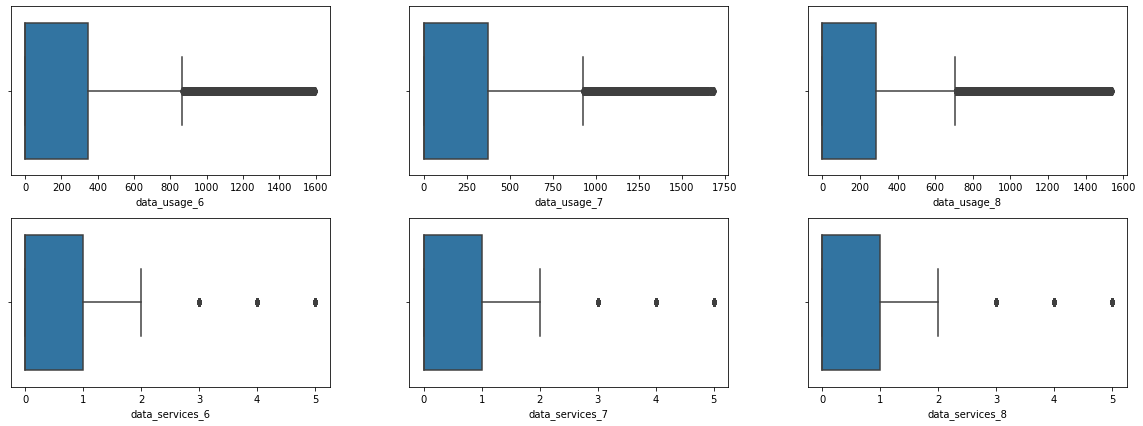

In [62]:
# Check outliers for data usage & services

plt.figure(figsize=(20, 7))
plt.subplot(2,3,1)
sns.boxplot(telecom['data_usage_6'])
plt.subplot(2,3,2)
sns.boxplot(telecom['data_usage_7'])
plt.subplot(2,3,3)
sns.boxplot(telecom['data_usage_8'])
plt.subplot(2,3,4)
sns.boxplot(telecom['data_services_6'])
plt.subplot(2,3,5)
sns.boxplot(telecom['data_services_7'])
plt.subplot(2,3,6)
sns.boxplot(telecom['data_services_8'])
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

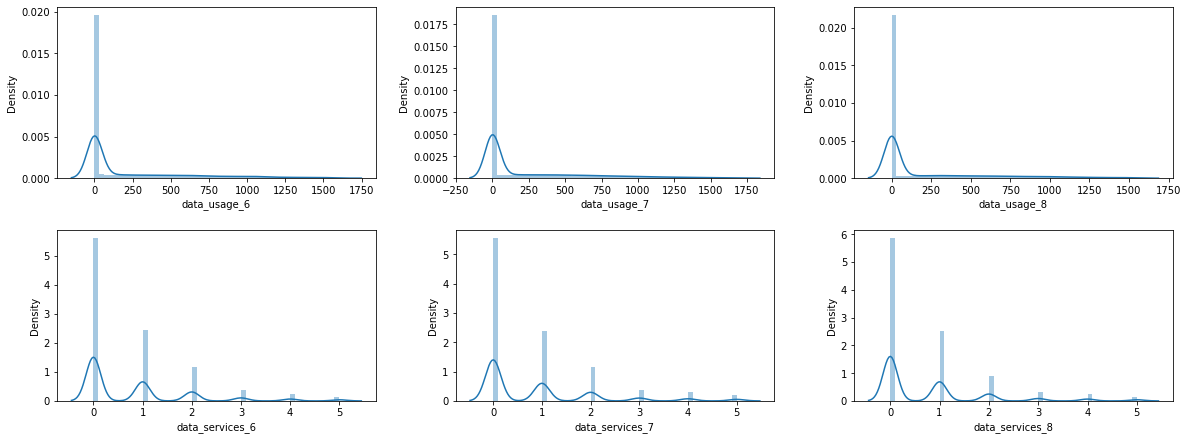

In [63]:
# Distribution of data usage & services

plt.figure(figsize=(20, 7.25))
plt.subplot(2,3,1)
sns.distplot(telecom['data_usage_6'])
plt.subplot(2,3,2)
sns.distplot(telecom['data_usage_7'])
plt.subplot(2,3,3)
sns.distplot(telecom['data_usage_8'])
plt.subplot(2,3,4)
sns.distplot(telecom['data_services_6'])
plt.subplot(2,3,5)
sns.distplot(telecom['data_services_7'])
plt.subplot(2,3,6)
sns.distplot(telecom['data_services_8'])
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

We have minimized the ourliers using IQR rule. Also, skewness in the distribution has reduced marginally. We have retained 74.24% of our previous data (after HVC filtering). Also, no values went missing in any of the records during outlier treatment. We can proceed further, even if the variables follow a skewed distribution since, our target variable is categorical/binary. Skewness in the distribution will not affect the prediction of the non-linear target variable.

**Getting dummies for dervied categorical variable**

Let us proceed with the dummification of the only categorical predictor variable in our dataset, that was derived earlier.

In [64]:
# Get dummies

cred_dummy = pd.get_dummies(telecom['cred'], prefix='cred')
cred_dummy.head()

cred_bronze  cred_gold  cred_silver
0            1          0            0
1            1          0            0
2            1          0            0
3            1          0            0
4            1          0            0

In [65]:
# Drop first dummy

cred_dummy = cred_dummy.iloc[:,1:]
cred_dummy.head()

cred_gold  cred_silver
0          0            0
1          0            0
2          0            0
3          0            0
4          0            0

We drop the first dummy, as we need only 'n-1' dummies for 'n' categorical levels. Now, we need to append these dummies to our dataset.

In [66]:
cred_dummy.shape

(22283, 2)

Out of the 4 levels of customer credibility, our dataset contains values satisfying only 3 conditions. So, having only 3 levels and, (3-1) dummies.

In [67]:
# Append dummies

telecom = pd.concat([telecom, cred_dummy], axis = 1)

In [68]:
# Print shape

telecom.shape

(22283, 125)

2 dummy variables have been added to our dataset, now having 125 variables.

In [69]:
# Drop original variable after dummy creation

telecom.drop(['cred'], axis = 1, inplace = True)

In [70]:
# Print dataset

telecom.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803        34.31        32.33         0.00         96.31   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        91.735          0.00           0.00           0.00           0.00   
1       567.160        325.91          16.23          33.49          31.64   
2        80.630        136.48           0.00           0.00           0.00   
3       896.680        983.39           0.00           0.00           0.00   
4        89.360        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             11.91   
1          23.74          12.59          38.06             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             11.61              0.00             41.03             40.43   
1             31.38             40.28            308.63            447.38   
2            217.59             12.49             80.96             70.58   
3              6.16             23.34             91.81             87.93   
4             50.66             33.58             82.94             83.01   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00         65.11   
1               0.0               0.0              0.00        422.16   
2               0.0               0.0              7.15        378.09   
3               0.0               0.0              0.00         97.04   
4               0.0               0.0             17.71        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0        63.685          0.00              0.00              0.00   
1       533.910        255.79              4.30             23.29   
2       288.180         63.04            116.56            133.43   
3        94.090        129.74             97.93            125.94   
4       133.680        182.14              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              3.95             3.635              0.00   
1             12.01             49.89            31.760             49.14   
2             22.58             13.69            10.040             75.69   
3             61.79            665.36           808.740            876.99   
4              0.00              2.36             6.350             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [71]:
# Print shape

telecom.shape

(22283, 124)

We have dropped the original variable, after creating its dummies. Our dataset now has 124 variables.

## Model Preparation

**Input-Output split**

We store all the input variables in the predictor 'X' and, the output/target variable in the response 'y'. Reshapping y and storing it in a dataframe for ease of computation. On popping, 'y' becomes a series/array, as it has only one variable whereas, 'X' is a dataframe with a collection of all the remaining variables.

In [72]:
# Storing inputs in X & outputs in y

X = telecom.drop(["churn"] , axis = 1)
y = telecom["churn"]

In [73]:
# Printing shape of X & y

print('Shape of "X" = ', X.shape)
print('Shape of "y" = ', y.shape)

Shape of "X" =  (22283, 123)
Shape of "y" =  (22283,)


124 variables --> 123 input variables + 1 response variable

**Train-Test split**

We split our dataset (both X & y) into sub-datasets, with 80% for training and the remaining 20% for testing our data.
We keep the randomness a constant i.e., random_state = 100 for both X & y, for selecting the same set of data points, for every iteration.

In [74]:
# Train-test split for X

X_train, X_test = train_test_split(X, train_size = 0.8, test_size = 0.2, random_state = 100)

In [75]:
# Printing shape of X_train & X_test

print('Shape of "X_train" = ', X_train.shape)
print('Shape of "X_test" = ', X_test.shape)

Shape of "X_train" =  (17826, 123)
Shape of "X_test" =  (4457, 123)


In [76]:
# Train-test split for y

y_train, y_test = train_test_split(y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [77]:
# Printing shape of y_train & y_test

print('Shape of "y_train" = ', y_train.shape)
print('Shape of "y_test" = ', y_test.shape)

Shape of "y_train" =  (17826,)
Shape of "y_test" =  (4457,)


*Summary of Train-test split for X & y*

Split ratio
<br>
Train : Test = 80 : 20

Number of records in input "X"
<br>
X: 22283 --> X_train: 17826 + X_test: 4457
<br>
i.e., X: 100% --> X_train: 80% + X_test: 20%

Number of records in response "y"
<br>
y: 22283 --> y_train: 17826 + y_test: 4457
<br>
i.e., y: 100% --> y_train: 80% + y_test: 20%

**Final datasets for model building**

Below are the list of datasets derived from the given dataset "telecom", that are required for model building:
- X_train
- X_test
- y_train
- y_test

Data preparation has been completed on all these derived datasets.

In [78]:
# Printing X_train

X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
8389              0.0             0.0             0.0  423.755  506.888   
16134             0.0             0.0             0.0  588.420  266.890   
28528             0.0             0.0             0.0  510.468  573.017   
7262              0.0             0.0             0.0  289.842  215.260   
17633             0.0             0.0             0.0  326.482  567.454   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8389   549.248       108.51        61.24        68.28        341.14   
16134  571.600        79.86         8.05        33.88        140.41   
28528  531.668       116.86        68.46        32.84        440.21   
7262   480.011         4.56        19.23        15.43         14.38   
17633  303.215         1.01         0.41         0.63        671.19   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8389         444.84        524.39            0.0            0.0   
16134        158.44        133.54            0.0            0.0   
28528        448.11        459.76            0.0            0.0   
7262          52.74         57.34            0.0            0.0   
17633       1196.78        314.51            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8389            0.00            0.0            0.0           0.00   
16134           0.00            0.0            0.0           0.00   
28528           0.00            0.0            0.0           0.00   
7262            3.76            0.0            0.0           5.64   
17633          61.71            0.0            0.0         119.14   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8389             108.51             57.51             68.28            283.54   
16134              0.00              2.05              1.03             98.86   
28528            116.83             66.78             32.54            408.99   
7262               4.56             19.23             14.21             13.26   
17633              1.01              0.41              0.63             68.51   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8389             431.29            496.08             57.59             13.39   
16134             62.53             27.99             14.31             26.71   
28528            363.23            379.93             11.63             11.54   
7262              47.84             37.91              0.00              1.49   
17633             77.98             54.99              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8389              27.91               0.0               0.0              0.40   
16134             54.33               0.0               0.0              0.00   
28528              4.84               0.0               0.0              0.00   
7262               4.66               0.0               0.0              0.00   
17633              0.00               0.0               0.0              8.13   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8389         449.66        502.21        592.28              0.00   
16134        113.18         91.29         83.36             79.86   
28528        537.46        441.56        417.33              0.00   
7262          17.83         68.58         56.79              0.00   
17633         69.53         78.39         55.63              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8389               3.73              0.00              0.00              0.00   
16134              6.00             32.85             26.86             56.73   
28528              1.68              0.00             14.69             61.74   
7262               0.00              0.00              0.00              3.39   
17633              0.00       

In [79]:
# Printing y_train

y_train.head()

8389     0
16134    0
28528    0
7262     1
17633    0
Name: churn, dtype: int64

In [80]:
# Printing X_test

X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
21827             0.0             0.0             0.0  416.093  568.928   
3572              0.0             0.0             0.0  621.167  544.359   
10702             0.0             0.0             0.0  144.303  -11.000   
23590             0.0             0.0             0.0  785.128  -10.138   
13504             0.0             0.0             0.0   98.271  313.775   

        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
21827  702.751        12.89        65.29       278.39        584.49   
3572   549.874      1315.46       970.79      1090.78        202.61   
10702  150.142         0.00         0.00         0.00          7.58   
23590  162.160       911.18        53.73       105.33        154.54   
13504  121.734         2.76        13.38         5.06          7.76   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
21827        778.76       1167.54          16.84            0.0   
3572         372.33        144.79           0.00            0.0   
10702          0.00          0.00           0.00            0.0   
23590         38.88         61.68           0.00            0.0   
13504         25.43          0.16           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
21827            0.0          23.33            0.0            0.0   
3572             0.0           0.00            0.0            0.0   
10702            0.0           0.00            0.0            0.0   
23590            0.0           0.00            0.0            0.0   
13504            0.0           0.00            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
21827              0.71              0.66              4.96             42.43   
3572              44.33             23.08             13.31             23.54   
10702              0.00              0.00              0.00              7.58   
23590            911.18             53.73            104.43            144.49   
13504              2.76             13.38              5.06              7.66   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
21827             24.93             38.06              0.00              0.00   
3572               8.61              7.71              0.00              0.98   
10702              0.00              0.00              0.00              0.00   
23590             38.09             61.28             10.04              0.00   
13504             11.48              0.16              0.10             13.95   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
21827               0.0              4.04               0.0               0.0   
3572                0.0              0.00               0.0               0.0   
10702               0.0              0.00               0.0               0.0   
23590               0.4              0.00               0.0               0.0   
13504               0.0              0.00               0.0               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
21827         43.14         25.59         43.03             12.18   
3572          67.88         32.68         21.03           1271.13   
10702          7.58          0.00          0.00              0.00   
23590       1065.73         91.83        166.11              0.00   
13504         10.53         38.81          5.23              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
21827             64.63            273.43            514.68            747.84   
3572             947.71           1077.46            175.43            362.73   
10702              0.00              0.00              0.00              0.00   
23590              0.00              0.90              0.00              0.00   
13504              0.00       

In [81]:
# Printing y_test

y_test.head()

21827    0
3572     0
10702    0
23590    0
13504    0
Name: churn, dtype: int64

Our derived datasets are ready for model building.

**Making copies**

Let us create copies of the input & output variables for both test & train, for each model.

In [82]:
# Logistic Regression copies

X_train_logr = X_train.copy()
y_train_logr = y_train.copy()
X_test_logr = X_test.copy()
y_test_logr = y_test.copy()

In [83]:
# Decision Tree copies (same is used for Random Forest as well)

X_train_dt = X_train.copy()
y_train_dt = y_train.copy()
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

## Logistic Regression

**Scaling of train data**

We use *Standard scaling* to scale our train data, for retaining maximum useful information from outliers and, have minimal impact of skewness on our model.

In [84]:
# Standard scaling of X_train

X_train_logr[X_train_logr.columns.difference(['cred_gold', 'cred_silver'])] = scale.fit_transform(X_train_logr[X_train_logr.columns.difference(['cred_gold', 'cred_silver'])])

In [85]:
# Numerical distribution for X_train

X_train_logr[X_train_logr.columns.difference(['cred_gold', 'cred_silver'])].describe()

arpu_6        arpu_7        arpu_8    aug_vbc_3g  \
count  1.782600e+04  1.782600e+04  1.782600e+04  1.782600e+04   
mean   1.249593e-16 -1.204392e-16  4.339530e-16 -4.972524e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.162748e+00 -5.386088e+00 -2.864891e+00 -4.118489e-01   
25%   -4.968099e-01 -4.661527e-01 -5.045976e-01 -4.118489e-01   
50%   -1.573149e-01 -1.515465e-01 -1.338897e-01 -4.118489e-01   
75%    2.898103e-01  2.645167e-01  2.942315e-01 -3.123894e-01   
max    5.889394e+01  7.173792e+01  6.453312e+01  2.975364e+01   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        1.782600e+04        1.782600e+04        1.782600e+04   
mean        -2.682821e-16        3.286200e-16        2.081933e-16   
std          1.000028e+00        1.000028e+00        1.000028e+00   
min         -6.653382e-01       -6.751329e-01       -6.140284e-01   
25%         -6.653382e-01       -6.751329e-01       -6.140284e-01   
50%         -6.653382e-01       -6.751329e-01       -6.140284e-01   
75%          5.812722e-01        5.464338e-01        6.558834e-01   
max          1.192219e+01        1.165952e+01        1.322363e+01   

       data_services_6  data_services_7  data_services_8  data_usage_6  \
count     1.782600e+04     1.782600e+04     1.782600e+04  1.782600e+04   
mean      9.093042e-16     3.520876e-16     1.027925e-15  5.343096e-16   
std       1.000028e+00     1.000028e+00     1.000028e+00  1.000028e+00   
min      -6.889039e-01    -6.860153e-01    -6.436494e-01 -5.940075e-01   
25%      -6.889039e-01    -6.860153e-01    -6.436494e-01 -5.940075e-01   
50%      -6.889039e-01    -6.860153e-01    -6.436494e-01 -5.940075e-01   
75%       2.143988e-01     1.592231e-01     2.746134e-01  3.326804e-01   
max       3.827610e+00     3.540177e+00     3.947665e+00  3.688543e+00   

       data_usage_7  data_usage_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
count  1.782600e+04  1.782600e+04  1.782600e+04  1.782600e+04  1.782600e+04   
mean   1.887491e-16 -7.669669e-16  4.578160e-16 -9.941310e-17 -2.930214e-15   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.012822e-01 -5.579984e-01 -1.375098e-01 -1.549346e-01 -1.662330e-01   
25%   -6.012822e-01 -5.579984e-01 -1.375098e-01 -1.549346e-01 -1.662330e-01   
50%   -6.012822e-01 -5.579984e-01 -1.375098e-01 -1.549346e-01 -1.662330e-01   
75%    3.766513e-01  2.284824e-01 -1.375098e-01 -1.549346e-01 -1.662330e-01   
max    3.824632e+00  3.730430e+00  8.546456e+01  5.822709e+01  3.650251e+01   

       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8    jul_vbc_3g    jun_vbc_3g  \
count  1.782600e+04  1.782600e+04  1.782600e+04  1.782600e+04  1.782600e+04   
mean   2.915861e-16 -2.041137e-15 -7.568945e-16  4.445439e-16  2.629072e-16   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.412413e-02 -5.648006e-02 -5.518133e-02 -4.167573e-01 -4.006784e-01   
25%   -6.412413e-02 -5.648006e-02 -5.518133e-02 -4.167573e-01 -4.006784e-01   
50%   -6.412413e-02 -5.648006e-02 -5.518133e-02 -4.167573e-01 -4.006784e-01   
75%   -6.412413e-02 -5.648006e-02 -5.518133e-02 -2.877399e-01 -3.508352e-01   
max    8.442811e+01  9.765528e+01  9.895684e+01  1.574235e+01  1.857949e+01   

       last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
count        1.782600e+04        1.782600e+04        1.782600e+04   
mean        -1.924113e-16        5.826086e-16        4.675443e-17   
std          1.000028e+00        1.000028e+00        1.000028e+00   
min         -7.129201e-01       -7.321654e-01       -6.483023e-01   
25%         -5.117367e-01       -5.460109e-01       -6.483023e-01   
50%          2.475235e-02       -4.270435e-02       -3.127203e-01   
75%          9.181349e-02        1.641340e-01        2.242107e-01   
max          2.617860e+01        2.691522e+01        2.921178e+01   

       loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  \
count  1.782600e+04  1.

We could see that our X_train columns have their values centered around mean (≈0), with standard deviation unity (≈1).

In [86]:
# Numerical distribution for y_train

y_train_logr.describe()

count    17826.000000
mean         0.087176
std          0.282101
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

We did not scale y_train, as it is binary.

**Scaling of test data**

We scale our test data using the same *Standard scaling* method, from what was learnt from the train data.

In [87]:
# Standard scaling of X_test

X_test_logr[X_test_logr.columns.difference(['cred_gold', 'cred_silver'])] = scale.transform(X_test_logr[X_test_logr.columns.difference(['cred_gold', 'cred_silver'])])

In [88]:
# Numerical distribution for X_test

X_test_logr[X_test_logr.columns.difference(['cred_gold', 'cred_silver'])].describe()

arpu_6       arpu_7       arpu_8   aug_vbc_3g  av_rech_amt_data_6  \
count  4457.000000  4457.000000  4457.000000  4457.000000         4457.000000   
mean      0.021859     0.018525     0.007794    -0.000537           -0.011774   
std       1.035105     0.971351     1.015115     1.071699            0.977707   
min      -1.299857    -3.456251    -1.026398    -0.411849           -0.665338   
25%      -0.494847    -0.474858    -0.510357    -0.411849           -0.665338   
50%      -0.159967    -0.154409    -0.132108    -0.411849           -0.665338   
75%       0.322825     0.288213     0.305498    -0.318288            0.581272   
max      32.334396    29.145769    30.329150    20.202466           10.335594   

       av_rech_amt_data_7  av_rech_amt_data_8  data_services_6  \
count         4457.000000         4457.000000      4457.000000   
mean            -0.002757            0.007188        -0.018470   
std              1.002056            0.993379         0.982610   
min             -0.675133           -0.614028        -0.688904   
25%             -0.675133           -0.614028        -0.688904   
50%             -0.675133           -0.614028        -0.688904   
75%              0.546434            0.655883         0.214399   
max              6.106942            6.874072         3.827610   

       data_services_7  data_services_8  data_usage_6  data_usage_7  \
count      4457.000000      4457.000000   4457.000000   4457.000000   
mean         -0.028523        -0.009910     -0.004411     -0.003979   
std           0.960495         0.971835      0.986883      0.997872   
min          -0.686015        -0.643649     -0.594008     -0.601282   
25%          -0.686015        -0.643649     -0.594008     -0.601282   
50%          -0.686015        -0.643649     -0.594008     -0.601282   
75%           0.159223         0.274613      0.337594      0.349616   
max           3.540177         3.947665      3.669962      3.823240   

       data_usage_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  \
count   4457.000000   4457.000000   4457.000000   4457.000000   4457.000000   
mean      -0.003267      0.018806      0.019949      0.034556      0.023856   
std        0.995589      0.896874      0.918788      1.267267      2.357375   
min       -0.557998     -0.137510     -0.154935     -0.166233     -0.064124   
25%       -0.557998     -0.137510     -0.154935     -0.166233     -0.064124   
50%       -0.557998     -0.137510     -0.154935     -0.166233     -0.064124   
75%        0.230535     -0.137510     -0.154935     -0.166233     -0.064124   
max        3.724669     20.372334     21.893444     52.355945    154.322728   

       isd_og_mou_7  isd_og_mou_8   jul_vbc_3g   jun_vbc_3g  \
count   4457.000000   4457.000000  4457.000000  4457.000000   
mean       0.026682      0.037820    -0.014663    -0.010202   
std        2.130556      2.401987     0.967202     1.084480   
min       -0.056480     -0.055181    -0.416757    -0.400678   
25%       -0.056480     -0.055181    -0.416757    -0.400678   
50%       -0.056480     -0.055181    -0.416757    -0.400678   
75%       -0.056480     -0.055181    -0.306298    -0.369969   
max      138.636265    154.918561     7.676113    31.853294   

       last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
count         4457.000000         4457.000000         4457.000000   
mean             0.009202            0.009608            0.014174   
std              0.939837            0.990986            1.028372   
min             -0.712920           -0.732165           -0.648302   
25%             -0.511737           -0.552906           -0.648302   
50%              0.024752           -0.042704           -0.312720   
75%              0.091813            0.164134            0.224211   
max             14.033824           13.746517           29.211777   

       loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  \
count   4457.000000   4457.000000   4457.000000       4457.000000   
mean   

We could see that our X_test columns have their values centered approximately around mean (*~*0), with standard deviation approximately unity (*~*1).

In [89]:
# Numerical distribution for y_test

y_test_logr.describe()

count    4457.000000
mean        0.086830
std         0.281617
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

We did not scale y_test, as it is binary.

**Feature selection in train data using RFE**

We select the top 30 features for our train data using *Recursive Feature Elimination (RFE)*.

In [90]:
# RFE for train data

logr.fit(X_train_logr, y_train_logr)
rfe = RFE(logr, 30)            
rfe = rfe.fit(X_train_logr, y_train_logr)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [91]:
# RFE results for train data

rfe_select = pd.DataFrame(list(zip(X_train_logr.columns, rfe.support_, rfe.ranking_)), columns=['X_train_logr', 'RFE Support', 'RFE Rank'])
rfe_select = rfe_select.sort_values(by = 'RFE Rank')
rfe_select

X_train_logr  RFE Support  RFE Rank
122         cred_silver         True         1
23     loc_og_t2m_mou_8         True         1
86       total_ic_mou_8         True         1
85       total_ic_mou_7         True         1
83         std_ic_mou_8         True         1
82         std_ic_mou_7         True         1
74     std_ic_t2m_mou_8         True         1
92         isd_ic_mou_8         True         1
71     std_ic_t2t_mou_8         True         1
67         loc_ic_mou_7         True         1
62     loc_ic_t2m_mou_8         True         1
121           cred_gold         True         1
50         isd_og_mou_8         True         1
59     loc_ic_t2t_mou_8         True         1
56       total_og_mou_8         True         1
68         loc_ic_mou_8         True         1
95     total_rech_num_8         True         1
89         spl_ic_mou_8         True         1
4                arpu_7         True         1
110  av_rech_amt_data_8         True         1
17        roam_og_mou_8         True         1
107   total_rech_data_8         True         1
11         offnet_mou_8         True         1
8           onnet_mou_8         True         1
101      max_rech_amt_8         True         1
114          sep_vbc_3g         True         1
104  last_day_rch_amt_8         True         1
98     total_rech_amt_8         True         1
96     total_rech_amt_6         True         1
119        data_usage_8         True         1
91         isd_ic_mou_7        False         2
66         loc_ic_mou_6        False         3
60     loc_ic_t2m_mou_6        False         4
57     loc_ic_t2t_mou_6        False         5
20     loc_og_t2t_mou_8        False         6
32         loc_og_mou_8        False         7
24     loc_og_t2f_mou_6        False         8
69     std_ic_t2t_mou_6        False         9
41     std_og_t2f_mou_8        False        10
38     std_og_t2m_mou_8        False        11
35     std_og_t2t_mou_8        False        12
5                arpu_8        False        13
10         offnet_mou_7        False        14
16        roam_og_mou_7        False        15
84       total_ic_mou_6        False        16
81         std_ic_mou_6        False        17
90         isd_ic_mou_6        False        18
77     std_ic_t2f_mou_8        False        19
7           onnet_mou_7        False        20
55       total_og_mou_7        False        21
21     loc_og_t2m_mou_6        False        22
9          offnet_mou_6        False        23
36     std_og_t2m_mou_6        False        24
54       total_og_mou_6        False        25
47         std_og_mou_8        False        26
94     total_rech_num_7        False        27
61     loc_ic_t2m_mou_7        False        28
58     loc_ic_t2t_mou_7        False        29
64     loc_ic_t2f_mou_7        False        30
6           onnet_mou_6        False        31
15        roam_og_mou_6        False        32
120     data_services_8        False        33
116     data_services_6        False        34
108  av_rech_amt_data_6        False        35
113          jun_vbc_3g        False        36
75     std_ic_t2f_mou_6        False        37
109  av_rech_amt_data_7        False        38
48         isd_og_mou_6        False        39
25     loc_og_t2f_mou_7        False        40
45         std_og_mou_6        False        41
105   total_rech_data_6        False        42
112          jul_vbc_3g        False        43
3                arpu_6        False        44
27     loc_og_t2c_mou_6        False        45
63     loc_ic_t2f_mou_6        False        46
97     total_rech_amt_7        False        47
100      max_rech_amt_7        False        48
70     std_ic_t2t_mou_7        False        49
73     std_ic_t2m_mou_7        False        50
87         spl_ic_mou_6        False        51
18     loc_og_t2t_mou_6        False        52
30         loc_og_mou_6        False        53
33     std_og_t2t_mou_6        False        54
51         spl_og_mou_6        False        55
26     loc_og_t2

RFE has selected the top 30 input variables, from train data. Now, we eliminate the input variables that are less significant, from train data, retaining only those variables with RFE Support = True and RFE Rank = 1.

In [92]:
# Selecting the most significant I/P variables from train data

X_train_logr = X_train_logr[X_train_logr.columns[rfe.support_]]

In [93]:
# Shape of X_train

X_train_logr.shape

(17826, 30)

We have now retained only the top 30 significant features in the train data, dropping the remaining features that are less significant i.e., RFE Support = False and RFE Rank > 1. We had 123 input variables before.

In [94]:
# Printing shape of y_train

y_train_logr.shape

(17826,)

y_train has to be selected by definition (target), if not, our model becomes meaningless.

**Manual Feature selection in train data**

We use the following order of precedence for dropping the features:
- high VIF and high p-value
- low VIF and high p-value
- high VIF and low p-value


If a feature has low VIF and low p-value then, we retain it.
- VIF > 5 --> high
- p-value > 0.05 --> high

We also look at *Log Likelihood* for overall model fit.

*Iteration 1*

In [95]:
# Fitting using GLM for logistic regression

logr1 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr)),family = sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17795
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3231.4
Date:                Sat, 26 Feb 2022   Deviance:                       6462.8
Time:                        22:50:43   Pearson chi2:                 7.70e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8857      0.088    -44.336      0.000      -4.057      -3.714
arpu_7                 0.4714      0.054      8.668      0.000       0.365       0.578
onnet_mou_8            0.6757      2.338      0.289      0.773      -3.906       5.257
offnet_mou_8           0.7424      2.530      0.293      0.769      -4.217       5.702
roam_og_mou_8         -0.0196      0.563     -0.035      0.972      -1.122       1.083
loc_og_t2m_mou_8      -0.7049      0.130     -5.435      0.000      -0.959      -0.451
isd_og_mou_8          -0.2573      0.087     -2.946      0.003      -0.429      -0.086
total_og_mou_8        -1.4697      3.573     -0.411      0.681      -8.472       5.533
loc_ic_t2t_mou_8       0.3886      0.508      0.766      0.444      -0.606       1.383
loc_ic_t2m_mou_8       0.3080      0.614      0.502      0.616      -0.895       1.511
loc_ic_mou_7           0.1478      0.269      0.549      0.583      -0.380       0.675
loc_ic_mou_8           6.6129      2.123      3.115      0.002       2.453      10.773
std_ic_t2t_mou_8       1.1098      0.774      1.433      0.152      -0.408       2.627
std_ic_t2m_mou_8       1.5941      1.114      1.431      0.152      -0.590       3.778
std_ic_mou_7           0.0026      0.135      0.020      0.984      -0.261       0.266
std_ic_mou_8           1.5564      1.723      0.903      0.366      -1.820       4.933
total_ic_mou_7         0.3531      0.298      1.185      0.236      -0.231       0.937
total_ic_mou_8       -10.3450      2.323     -4.454      0.000     -14.897      -5.793
spl_ic_mou_8          -0.4898      0.090     -5.449      0.000      -0.666      -0.314
isd_ic_mou_8           1.7271      0.419      4.122      0.000       0.906       2.548
total_rech_num_8      -0.1732      0.061     -2.838      0.005      -0.293      -0.054
total_rech_amt_6       0.3202      0.042      7.555      0.000       0.237       0.403
total_rech_amt_8      -0.4729      0.102     -4.654      0.000      -0.672      -0.274
max_rech_amt_8         0.2008      0.053      3.818      0.000       0.098       0.304
last_day_rch_amt_8    -0.4145      0.063     -6.590      0.000      -0.538      -0.291
total_rech_data_8     -0.1583      0.067     -2.377      0.017      -0.289      -0.028
av_rech_amt_data_8    -0.2684      0.112     -2.396      0.017      -0.488      -0.049
sep_vbc_3g            -0.5015      0.170     -2.945      0.003      -0.835      -0.168
data_usage_8          -0.5851      0.109     -5.345      0.000      -0.800      -0.371
cred_gold             -0.7633      0.185     -4.129      0.000      -1.126      -0.401
cred_silver           -0.3177      0.077     -4.147      0.000      -0.468      -0.168
======================================================================================
"""

In [96]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr.values, i) for i in range(X_train_logr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6       total_og_mou_8  1495.86
2         offnet_mou_8   751.16
1          onnet_mou_8   641.98
16      total_ic_mou_8   556.16
10        loc_ic_mou_8   459.93
14        std_ic_mou_8   152.81
15      total_ic_mou_7    44.48
3        roam_og_mou_8    38.05
9         loc_ic_mou_7    36.32
12    std_ic_t2m_mou_8    33.94
8     loc_ic_t2m_mou_8    28.37
7     loc_ic_t2t_mou_8    18.54
18        isd_ic_mou_8    18.15
11    std_ic_t2t_mou_8    16.98
13        std_ic_mou_7     9.81
21    total_rech_amt_8     6.00
25  av_rech_amt_data_8     3.61
0               arpu_7     3.38
5         isd_og_mou_8     2.70
27        data_usage_8     2.69
22      max_rech_amt_8     2.64
23  last_day_rch_amt_8     2.15
20    total_rech_amt_6     2.11
24   total_rech_data_8     1.77
4     loc_og_t2m_mou_8     1.77
19    total_rech_num_8     1.70
26          sep_vbc_3g     1.06
17        spl_ic_mou_8     1.04
28           cred_gold     1.03
29         cred_silver     1.03

In [97]:
# Dropping insignificant variable

X_train_logr2 = X_train_logr.drop('total_og_mou_8',axis = 1)

Dropped "total_og_mou_8" as it has high p-value and VIF.

*Iteration 2*

In [98]:
# Fitting using GLM for logistic regression

logr2 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr2)),family = sm.families.Binomial())
logr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17796
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3231.5
Date:                Sat, 26 Feb 2022   Deviance:                       6463.0
Time:                        22:50:44   Pearson chi2:                 7.80e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8869      0.088    -44.370      0.000      -4.059      -3.715
arpu_7                 0.4710      0.054      8.666      0.000       0.365       0.578
onnet_mou_8           -0.2857      0.054     -5.256      0.000      -0.392      -0.179
offnet_mou_8          -0.2981      0.068     -4.391      0.000      -0.431      -0.165
roam_og_mou_8          0.2117      0.026      8.200      0.000       0.161       0.262
loc_og_t2m_mou_8      -0.7047      0.130     -5.432      0.000      -0.959      -0.450
isd_og_mou_8          -0.2609      0.088     -2.953      0.003      -0.434      -0.088
loc_ic_t2t_mou_8       0.3854      0.507      0.760      0.447      -0.609       1.379
loc_ic_t2m_mou_8       0.3039      0.613      0.495      0.620      -0.898       1.506
loc_ic_mou_7           0.1481      0.269      0.550      0.582      -0.380       0.676
loc_ic_mou_8           7.4154      0.837      8.854      0.000       5.774       9.057
std_ic_t2t_mou_8       1.1032      0.772      1.429      0.153      -0.410       2.616
std_ic_t2m_mou_8       1.5857      1.111      1.428      0.153      -0.591       3.762
std_ic_mou_7           0.0024      0.135      0.018      0.986      -0.261       0.266
std_ic_mou_8           1.9418      1.441      1.348      0.178      -0.883       4.766
total_ic_mou_7         0.3537      0.298      1.186      0.236      -0.231       0.938
total_ic_mou_8       -11.2790      0.490    -23.010      0.000     -12.240     -10.318
spl_ic_mou_8          -0.4898      0.090     -5.451      0.000      -0.666      -0.314
isd_ic_mou_8           1.8925      0.118     15.972      0.000       1.660       2.125
total_rech_num_8      -0.1761      0.061     -2.904      0.004      -0.295      -0.057
total_rech_amt_6       0.3199      0.042      7.548      0.000       0.237       0.403
total_rech_amt_8      -0.4724      0.102     -4.642      0.000      -0.672      -0.273
max_rech_amt_8         0.1978      0.052      3.781      0.000       0.095       0.300
last_day_rch_amt_8    -0.4128      0.063     -6.570      0.000      -0.536      -0.290
total_rech_data_8     -0.1582      0.067     -2.376      0.018      -0.289      -0.028
av_rech_amt_data_8    -0.2671      0.112     -2.385      0.017      -0.487      -0.048
sep_vbc_3g            -0.5002      0.170     -2.941      0.003      -0.834      -0.167
data_usage_8          -0.5852      0.109     -5.345      0.000      -0.800      -0.371
cred_gold             -0.7621      0.185     -4.123      0.000      -1.124      -0.400
cred_silver           -0.3167      0.077     -4.136      0.000      -0.467      -0.167
======================================================================================
"""

In [99]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr2.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr2.values, i) for i in range(X_train_logr2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
15      total_ic_mou_8  296.70
9         loc_ic_mou_8  266.94
13        std_ic_mou_8  108.01
14      total_ic_mou_7   44.20
8         loc_ic_mou_7   36.14
11    std_ic_t2m_mou_8   33.91
7     loc_ic_t2m_mou_8   28.36
6     loc_ic_t2t_mou_8   18.53
10    std_ic_t2t_mou_8   16.96
17        isd_ic_mou_8   10.66
12        std_ic_mou_7    9.76
20    total_rech_amt_8    6.00
24  av_rech_amt_data_8    3.60
0               arpu_7    3.38
26        data_usage_8    2.69
5         isd_og_mou_8    2.67
21      max_rech_amt_8    2.63
22  last_day_rch_amt_8    2.15
19    total_rech_amt_6    2.10
2         offnet_mou_8    1.95
4     loc_og_t2m_mou_8    1.77
23   total_rech_data_8    1.77
18    total_rech_num_8    1.67
1          onnet_mou_8    1.46
3        roam_og_mou_8    1.11
25          sep_vbc_3g    1.06
16        spl_ic_mou_8    1.04
27           cred_gold    1.03
28         cred_silver    1.03

In [100]:
# Dropping insignificant variable

X_train_logr3 = X_train_logr2.drop('std_ic_mou_8',axis = 1)

Dropped "std_ic_mou_8" as it has high p-value and VIF.

*Iteration 3*

In [101]:
# Fitting using GLM for logistic regression

logr3 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr3)),family = sm.families.Binomial())
logr3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17797
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3232.3
Date:                Sat, 26 Feb 2022   Deviance:                       6464.5
Time:                        22:50:45   Pearson chi2:                 9.01e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9021      0.087    -44.807      0.000      -4.073      -3.731
arpu_7                 0.4715      0.054      8.675      0.000       0.365       0.578
onnet_mou_8           -0.2874      0.054     -5.284      0.000      -0.394      -0.181
offnet_mou_8          -0.2972      0.068     -4.384      0.000      -0.430      -0.164
roam_og_mou_8          0.2114      0.026      8.182      0.000       0.161       0.262
loc_og_t2m_mou_8      -0.7042      0.130     -5.434      0.000      -0.958      -0.450
isd_og_mou_8          -0.2609      0.088     -2.959      0.003      -0.434      -0.088
loc_ic_t2t_mou_8       0.3130      0.497      0.629      0.529      -0.662       1.288
loc_ic_t2m_mou_8       0.2206      0.601      0.367      0.714      -0.958       1.399
loc_ic_mou_7           0.1493      0.270      0.552      0.581      -0.381       0.679
loc_ic_mou_8           7.6230      0.813      9.375      0.000       6.029       9.217
std_ic_t2t_mou_8       2.1291      0.145     14.640      0.000       1.844       2.414
std_ic_t2m_mou_8       3.0664      0.191     16.089      0.000       2.693       3.440
std_ic_mou_7           0.0060      0.135      0.044      0.965      -0.259       0.271
total_ic_mou_7         0.3502      0.300      1.168      0.243      -0.237       0.938
total_ic_mou_8       -11.3593      0.489    -23.215      0.000     -12.318     -10.400
spl_ic_mou_8          -0.4909      0.090     -5.462      0.000      -0.667      -0.315
isd_ic_mou_8           1.9103      0.118     16.209      0.000       1.679       2.141
total_rech_num_8      -0.1797      0.061     -2.962      0.003      -0.299      -0.061
total_rech_amt_6       0.3191      0.042      7.533      0.000       0.236       0.402
total_rech_amt_8      -0.4728      0.102     -4.646      0.000      -0.672      -0.273
max_rech_amt_8         0.1990      0.052      3.815      0.000       0.097       0.301
last_day_rch_amt_8    -0.4121      0.063     -6.561      0.000      -0.535      -0.289
total_rech_data_8     -0.1592      0.067     -2.391      0.017      -0.290      -0.029
av_rech_amt_data_8    -0.2656      0.112     -2.374      0.018      -0.485      -0.046
sep_vbc_3g            -0.4984      0.170     -2.935      0.003      -0.831      -0.166
data_usage_8          -0.5848      0.109     -5.345      0.000      -0.799      -0.370
cred_gold             -0.7604      0.185     -4.116      0.000      -1.122      -0.398
cred_silver           -0.3151      0.077     -4.117      0.000      -0.465      -0.165
======================================================================================
"""

In [102]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr3.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr3.values, i) for i in range(X_train_logr3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9         loc_ic_mou_8  178.13
14      total_ic_mou_8  161.98
13      total_ic_mou_7   43.53
8         loc_ic_mou_7   35.71
7     loc_ic_t2m_mou_8   28.26
6     loc_ic_t2t_mou_8   18.45
11    std_ic_t2m_mou_8   16.04
12        std_ic_mou_7    9.54
10    std_ic_t2t_mou_8    8.35
16        isd_ic_mou_8    6.83
19    total_rech_amt_8    5.99
23  av_rech_amt_data_8    3.60
0               arpu_7    3.38
25        data_usage_8    2.69
5         isd_og_mou_8    2.67
20      max_rech_amt_8    2.63
21  last_day_rch_amt_8    2.15
18    total_rech_amt_6    2.09
2         offnet_mou_8    1.95
4     loc_og_t2m_mou_8    1.77
22   total_rech_data_8    1.77
17    total_rech_num_8    1.66
1          onnet_mou_8    1.46
3        roam_og_mou_8    1.11
24          sep_vbc_3g    1.06
15        spl_ic_mou_8    1.04
26           cred_gold    1.03
27         cred_silver    1.03

In [103]:
# Dropping insignificant variable

X_train_logr4 = X_train_logr3.drop('total_ic_mou_7',axis = 1)

Dropped "total_ic_mou_7" as it has high p-value and VIF.

*Iteration 4*

In [104]:
# Fitting using GLM for logistic regression

logr4 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr4)),family = sm.families.Binomial())
logr4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17798
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3232.9
Date:                Sat, 26 Feb 2022   Deviance:                       6465.8
Time:                        22:50:46   Pearson chi2:                 9.17e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9061      0.087    -44.841      0.000      -4.077      -3.735
arpu_7                 0.4765      0.054      8.794      0.000       0.370       0.583
onnet_mou_8           -0.2886      0.054     -5.305      0.000      -0.395      -0.182
offnet_mou_8          -0.2989      0.068     -4.407      0.000      -0.432      -0.166
roam_og_mou_8          0.2121      0.026      8.200      0.000       0.161       0.263
loc_og_t2m_mou_8      -0.7059      0.130     -5.443      0.000      -0.960      -0.452
isd_og_mou_8          -0.2619      0.087     -2.999      0.003      -0.433      -0.091
loc_ic_t2t_mou_8       0.3137      0.498      0.630      0.529      -0.662       1.289
loc_ic_t2m_mou_8       0.2223      0.602      0.369      0.712      -0.957       1.402
loc_ic_mou_7           0.4498      0.082      5.470      0.000       0.289       0.611
loc_ic_mou_8           7.5425      0.810      9.309      0.000       5.955       9.130
std_ic_t2t_mou_8       2.1083      0.144     14.623      0.000       1.826       2.391
std_ic_t2m_mou_8       3.0356      0.189     16.088      0.000       2.666       3.405
std_ic_mou_7           0.1528      0.051      3.019      0.003       0.054       0.252
total_ic_mou_8       -11.2705      0.482    -23.371      0.000     -12.216     -10.325
spl_ic_mou_8          -0.4909      0.090     -5.461      0.000      -0.667      -0.315
isd_ic_mou_8           1.9610      0.107     18.322      0.000       1.751       2.171
total_rech_num_8      -0.1799      0.061     -2.966      0.003      -0.299      -0.061
total_rech_amt_6       0.3174      0.042      7.502      0.000       0.235       0.400
total_rech_amt_8      -0.4743      0.102     -4.662      0.000      -0.674      -0.275
max_rech_amt_8         0.2010      0.052      3.856      0.000       0.099       0.303
last_day_rch_amt_8    -0.4146      0.063     -6.592      0.000      -0.538      -0.291
total_rech_data_8     -0.1569      0.067     -2.358      0.018      -0.287      -0.026
av_rech_amt_data_8    -0.2720      0.112     -2.426      0.015      -0.492      -0.052
sep_vbc_3g            -0.4980      0.170     -2.935      0.003      -0.830      -0.165
data_usage_8          -0.5874      0.110     -5.358      0.000      -0.802      -0.373
cred_gold             -0.7516      0.184     -4.082      0.000      -1.113      -0.391
cred_silver           -0.3133      0.076     -4.095      0.000      -0.463      -0.163
======================================================================================
"""

In [105]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr4.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr4.values, i) for i in range(X_train_logr4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
9         loc_ic_mou_8  175.09
13      total_ic_mou_8  158.52
7     loc_ic_t2m_mou_8   28.25
6     loc_ic_t2t_mou_8   18.44
11    std_ic_t2m_mou_8   15.73
10    std_ic_t2t_mou_8    8.19
15        isd_ic_mou_8    6.40
18    total_rech_amt_8    5.98
8         loc_ic_mou_7    3.71
22  av_rech_amt_data_8    3.60
0               arpu_7    3.38
24        data_usage_8    2.69
5         isd_og_mou_8    2.66
19      max_rech_amt_8    2.63
12        std_ic_mou_7    2.21
20  last_day_rch_amt_8    2.15
17    total_rech_amt_6    2.09
2         offnet_mou_8    1.95
4     loc_og_t2m_mou_8    1.77
21   total_rech_data_8    1.77
16    total_rech_num_8    1.66
1          onnet_mou_8    1.46
3        roam_og_mou_8    1.11
23          sep_vbc_3g    1.06
14        spl_ic_mou_8    1.04
25           cred_gold    1.03
26         cred_silver    1.03

In [106]:
# Dropping insignificant variable

X_train_logr5 = X_train_logr4.drop('loc_ic_t2m_mou_8',axis = 1)

Dropped "loc_ic_t2m_mou_8" as it has high p-value and VIF.

*Iteration 5*

In [107]:
# Fitting using GLM for logistic regression

logr5 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr5)),family = sm.families.Binomial())
logr5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17799
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3233.0
Date:                Sat, 26 Feb 2022   Deviance:                       6466.0
Time:                        22:50:47   Pearson chi2:                 9.25e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9040      0.087    -44.946      0.000      -4.074      -3.734
arpu_7                 0.4764      0.054      8.795      0.000       0.370       0.583
onnet_mou_8           -0.2886      0.054     -5.305      0.000      -0.395      -0.182
offnet_mou_8          -0.2985      0.068     -4.402      0.000      -0.431      -0.166
roam_og_mou_8          0.2121      0.026      8.203      0.000       0.161       0.263
loc_og_t2m_mou_8      -0.7012      0.129     -5.438      0.000      -0.954      -0.448
isd_og_mou_8          -0.2616      0.087     -2.995      0.003      -0.433      -0.090
loc_ic_t2t_mou_8       0.1493      0.219      0.683      0.495      -0.279       0.578
loc_ic_mou_7           0.4497      0.082      5.456      0.000       0.288       0.611
loc_ic_mou_8           7.8002      0.409     19.065      0.000       6.998       8.602
std_ic_t2t_mou_8       2.0984      0.142     14.819      0.000       1.821       2.376
std_ic_t2m_mou_8       3.0213      0.184     16.378      0.000       2.660       3.383
std_ic_mou_7           0.1527      0.051      3.017      0.003       0.054       0.252
total_ic_mou_8       -11.2233      0.464    -24.166      0.000     -12.134     -10.313
spl_ic_mou_8          -0.4909      0.090     -5.461      0.000      -0.667      -0.315
isd_ic_mou_8           1.9523      0.104     18.703      0.000       1.748       2.157
total_rech_num_8      -0.1786      0.061     -2.950      0.003      -0.297      -0.060
total_rech_amt_6       0.3177      0.042      7.510      0.000       0.235       0.401
total_rech_amt_8      -0.4748      0.102     -4.670      0.000      -0.674      -0.276
max_rech_amt_8         0.2005      0.052      3.849      0.000       0.098       0.303
last_day_rch_amt_8    -0.4146      0.063     -6.597      0.000      -0.538      -0.291
total_rech_data_8     -0.1566      0.067     -2.354      0.019      -0.287      -0.026
av_rech_amt_data_8    -0.2727      0.112     -2.431      0.015      -0.492      -0.053
sep_vbc_3g            -0.4990      0.170     -2.938      0.003      -0.832      -0.166
data_usage_8          -0.5874      0.110     -5.357      0.000      -0.802      -0.372
cred_gold             -0.7541      0.184     -4.099      0.000      -1.115      -0.394
cred_silver           -0.3148      0.076     -4.120      0.000      -0.464      -0.165
======================================================================================
"""

In [108]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr5.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr5.values, i) for i in range(X_train_logr5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12      total_ic_mou_8  158.52
8         loc_ic_mou_8  121.84
10    std_ic_t2m_mou_8   15.73
9     std_ic_t2t_mou_8    8.19
14        isd_ic_mou_8    6.40
17    total_rech_amt_8    5.98
7         loc_ic_mou_7    3.71
21  av_rech_amt_data_8    3.60
0               arpu_7    3.38
23        data_usage_8    2.69
5         isd_og_mou_8    2.66
18      max_rech_amt_8    2.63
6     loc_ic_t2t_mou_8    2.27
11        std_ic_mou_7    2.21
19  last_day_rch_amt_8    2.15
16    total_rech_amt_6    2.09
2         offnet_mou_8    1.95
20   total_rech_data_8    1.77
4     loc_og_t2m_mou_8    1.76
15    total_rech_num_8    1.66
1          onnet_mou_8    1.46
3        roam_og_mou_8    1.11
22          sep_vbc_3g    1.06
13        spl_ic_mou_8    1.04
24           cred_gold    1.03
25         cred_silver    1.03

In [109]:
# Dropping insignificant variable

X_train_logr6 = X_train_logr5.drop('loc_ic_t2t_mou_8' ,axis = 1)

Dropped "loc_ic_t2t_mou_8" as it has High p-value and low VIF.

*Iteration 6*

In [110]:
# Fitting using GLM for logistic regression

logr6 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr6)),family = sm.families.Binomial())
logr6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17800
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3233.2
Date:                Sat, 26 Feb 2022   Deviance:                       6466.4
Time:                        22:50:48   Pearson chi2:                 8.60e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9046      0.087    -44.935      0.000      -4.075      -3.734
arpu_7                 0.4762      0.054      8.797      0.000       0.370       0.582
onnet_mou_8           -0.2853      0.054     -5.275      0.000      -0.391      -0.179
offnet_mou_8          -0.2980      0.068     -4.394      0.000      -0.431      -0.165
roam_og_mou_8          0.2122      0.026      8.199      0.000       0.162       0.263
loc_og_t2m_mou_8      -0.7176      0.127     -5.649      0.000      -0.967      -0.469
isd_og_mou_8          -0.2602      0.087     -3.003      0.003      -0.430      -0.090
loc_ic_mou_7           0.4499      0.082      5.464      0.000       0.289       0.611
loc_ic_mou_8           7.8614      0.399     19.711      0.000       7.080       8.643
std_ic_t2t_mou_8       2.0902      0.141     14.822      0.000       1.814       2.367
std_ic_t2m_mou_8       3.0102      0.184     16.384      0.000       2.650       3.370
std_ic_mou_7           0.1531      0.051      3.022      0.003       0.054       0.252
total_ic_mou_8       -11.1882      0.461    -24.259      0.000     -12.092     -10.284
spl_ic_mou_8          -0.4912      0.090     -5.464      0.000      -0.667      -0.315
isd_ic_mou_8           1.9463      0.104     18.736      0.000       1.743       2.150
total_rech_num_8      -0.1798      0.060     -2.974      0.003      -0.298      -0.061
total_rech_amt_6       0.3177      0.042      7.517      0.000       0.235       0.400
total_rech_amt_8      -0.4732      0.102     -4.661      0.000      -0.672      -0.274
max_rech_amt_8         0.1999      0.052      3.837      0.000       0.098       0.302
last_day_rch_amt_8    -0.4146      0.063     -6.593      0.000      -0.538      -0.291
total_rech_data_8     -0.1566      0.067     -2.354      0.019      -0.287      -0.026
av_rech_amt_data_8    -0.2720      0.112     -2.425      0.015      -0.492      -0.052
sep_vbc_3g            -0.5001      0.170     -2.941      0.003      -0.833      -0.167
data_usage_8          -0.5884      0.110     -5.364      0.000      -0.803      -0.373
cred_gold             -0.7563      0.184     -4.112      0.000      -1.117      -0.396
cred_silver           -0.3147      0.076     -4.120      0.000      -0.464      -0.165
======================================================================================
"""

In [111]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr6.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr6.values, i) for i in range(X_train_logr6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
11      total_ic_mou_8  158.52
7         loc_ic_mou_8  120.37
9     std_ic_t2m_mou_8   15.72
8     std_ic_t2t_mou_8    8.19
13        isd_ic_mou_8    6.40
16    total_rech_amt_8    5.98
6         loc_ic_mou_7    3.70
20  av_rech_amt_data_8    3.60
0               arpu_7    3.38
22        data_usage_8    2.69
5         isd_og_mou_8    2.66
17      max_rech_amt_8    2.63
10        std_ic_mou_7    2.21
18  last_day_rch_amt_8    2.15
15    total_rech_amt_6    2.09
2         offnet_mou_8    1.95
19   total_rech_data_8    1.77
14    total_rech_num_8    1.66
4     loc_og_t2m_mou_8    1.64
1          onnet_mou_8    1.45
3        roam_og_mou_8    1.11
21          sep_vbc_3g    1.06
12        spl_ic_mou_8    1.04
23           cred_gold    1.03
24         cred_silver    1.03

In [112]:
# Dropping insignificant variable

X_train_logr7 = X_train_logr6.drop('total_ic_mou_8',axis = 1)

Dropped "total_ic_mou_8" as it has high VIF and low p-value.

*Iteration 7*

In [113]:
# Fitting using GLM for logistic regression

logr7 = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr7)),family = sm.families.Binomial())
logr7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17801
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3588.2
Date:                Sat, 26 Feb 2022   Deviance:                       7176.5
Time:                        22:50:49   Pearson chi2:                 6.56e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6891      0.079    -46.949      0.000      -3.843      -3.535
arpu_7                 0.3780      0.051      7.389      0.000       0.278       0.478
onnet_mou_8           -0.2669      0.058     -4.588      0.000      -0.381      -0.153
offnet_mou_8          -0.2310      0.070     -3.297      0.001      -0.368      -0.094
roam_og_mou_8          0.2476      0.026      9.363      0.000       0.196       0.299
loc_og_t2m_mou_8      -0.8134      0.117     -6.971      0.000      -1.042      -0.585
isd_og_mou_8          -0.1260      0.096     -1.317      0.188      -0.314       0.062
loc_ic_mou_7           0.1712      0.069      2.475      0.013       0.036       0.307
loc_ic_mou_8          -1.0341      0.133     -7.782      0.000      -1.295      -0.774
std_ic_t2t_mou_8      -0.3776      0.117     -3.228      0.001      -0.607      -0.148
std_ic_t2m_mou_8      -0.5505      0.130     -4.220      0.000      -0.806      -0.295
std_ic_mou_7           0.1629      0.052      3.135      0.002       0.061       0.265
spl_ic_mou_8          -0.5945      0.094     -6.319      0.000      -0.779      -0.410
isd_ic_mou_8          -0.1308      0.077     -1.710      0.087      -0.281       0.019
total_rech_num_8      -0.4638      0.069     -6.755      0.000      -0.598      -0.329
total_rech_amt_6       0.4435      0.040     11.032      0.000       0.365       0.522
total_rech_amt_8      -0.6235      0.131     -4.745      0.000      -0.881      -0.366
max_rech_amt_8         0.0540      0.058      0.925      0.355      -0.060       0.169
last_day_rch_amt_8    -0.5340      0.069     -7.721      0.000      -0.670      -0.398
total_rech_data_8     -0.2933      0.071     -4.136      0.000      -0.432      -0.154
av_rech_amt_data_8    -0.1164      0.115     -1.012      0.312      -0.342       0.109
sep_vbc_3g            -0.5348      0.185     -2.896      0.004      -0.897      -0.173
data_usage_8          -0.6086      0.108     -5.629      0.000      -0.820      -0.397
cred_gold             -0.8363      0.169     -4.962      0.000      -1.167      -0.506
cred_silver           -0.4597      0.071     -6.438      0.000      -0.600      -0.320
======================================================================================
"""

In [114]:
# Handling multi-colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_logr7.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr7.values, i) for i in range(X_train_logr7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15    total_rech_amt_8  5.97
7         loc_ic_mou_8  3.94
6         loc_ic_mou_7  3.70
19  av_rech_amt_data_8  3.60
0               arpu_7  3.38
21        data_usage_8  2.68
5         isd_og_mou_8  2.66
16      max_rech_amt_8  2.62
10        std_ic_mou_7  2.19
17  last_day_rch_amt_8  2.15
14    total_rech_amt_6  2.07
2         offnet_mou_8  1.95
18   total_rech_data_8  1.76
9     std_ic_t2m_mou_8  1.69
13    total_rech_num_8  1.66
4     loc_og_t2m_mou_8  1.64
1          onnet_mou_8  1.45
8     std_ic_t2t_mou_8  1.43
3        roam_og_mou_8  1.11
20          sep_vbc_3g  1.06
12        isd_ic_mou_8  1.04
11        spl_ic_mou_8  1.04
22           cred_gold  1.03
23         cred_silver  1.02

We stop iterating since, our log likelihood has gone down significantly. We select 6th iteration train data for further modelling.

**Optimal probability cut-off selection for predicting churn on train data**

We select the optimal probability cut-off after looking at the performance metrics for different cut-offs.

In [115]:
# Probability of predicted churn

y_train_logr_pred = pd.DataFrame({'actual churn':y_train_logr.values, 'probability of predicted churn':(logr6.fit()).predict(sm.add_constant(X_train_logr6))})
y_train_logr_pred.head()

actual churn  probability of predicted churn
8389              0                        0.008026
16134             0                        0.049600
28528             0                        0.001650
7262              1                        0.016538
17633             0                        0.195287

In [116]:
# Find possibility of prediction for all probability cut-offs

cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in cutoffs:
    y_train_logr_pred['predicted churn, P cut-off=%0.1f' % i] = y_train_logr_pred['probability of predicted churn'].map(lambda x: 1 if x > i else 0)
y_train_logr_pred.head()

actual churn  probability of predicted churn  \
8389              0                        0.008026   
16134             0                        0.049600   
28528             0                        0.001650   
7262              1                        0.016538   
17633             0                        0.195287   

       predicted churn, P cut-off=0.0  predicted churn, P cut-off=0.1  \
8389                                1                               0   
16134                               1                               0   
28528                               1                               0   
7262                                1                               0   
17633                               1                               1   

       predicted churn, P cut-off=0.2  predicted churn, P cut-off=0.3  \
8389                                0                               0   
16134                               0                               0   
28528                               0                               0   
7262                                0                               0   
17633                               0                               0   

       predicted churn, P cut-off=0.4  predicted churn, P cut-off=0.5  \
8389                                0                               0   
16134                               0                               0   
28528                               0                               0   
7262                                0                               0   
17633                               0                               0   

       predicted churn, P cut-off=0.6  predicted churn, P cut-off=0.7  \
8389                                0                               0   
16134                               0                               0   
28528                               0                               0   
7262                                0                               0   
17633                               0                               0   

       predicted churn, P cut-off=0.8  predicted churn, P cut-off=0.9  \
8389                                0                               0   
16134                               0                               0   
28528                               0                               0   
7262                                0                               0   
17633                               0                               0   

       predicted churn, P cut-off=1.0  
8389                                0  
16134                               0  
28528                               0  
7262                                0  
17633                               0

In [117]:
# Computing the sensitvity, specificity and accuracy performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Sensitvity', 'Specificity', 'Accuracy'])

for i in cutoffs:
    cm = confusion_matrix(y_train_logr_pred['actual churn'], y_train_logr_pred['predicted churn, P cut-off=%0.1f' % i])
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
    perf_all.loc[i] = [i, sensitivity, specificity, accuracy]
perf_all

P cut-off  Sensitvity  Specificity  Accuracy
0.0        0.0    1.000000     0.000000  0.087176
0.1        0.1    0.826255     0.842490  0.841075
0.2        0.2    0.697555     0.930064  0.909795
0.3        0.3    0.569498     0.965524  0.931000
0.4        0.4    0.424067     0.983653  0.934870
0.5        0.5    0.353282     0.989921  0.934422
0.6        0.6    0.315315     0.992318  0.933300
0.7        0.7    0.283784     0.993977  0.932066
0.8        0.8    0.192407     0.997357  0.927185
0.9        0.9    0.054698     0.999816  0.917424
1.0        1.0    0.000000     1.000000  0.912824

<AxesSubplot:xlabel='P cut-off'>

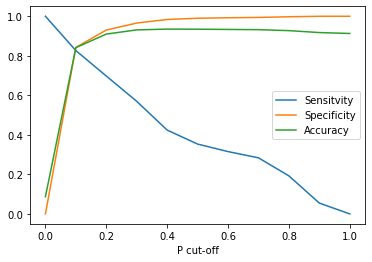

In [118]:
# Finding the optimal cut-off probability

perf_all.plot.line(x = 'P cut-off', y = ['Sensitvity', 'Specificity', 'Accuracy'])

In [119]:
# Computing the precision and recall performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Precision', 'Recall'])

for i in cutoffs:
    cm = confusion_matrix(y_train_logr_pred['actual churn'], y_train_logr_pred['predicted churn, P cut-off=%0.1f' % i])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    perf_all.loc[i] = [i, precision, recall]
perf_all

P cut-off  Precision    Recall
0.0        0.0   0.087176  1.000000
0.1        0.1   0.333767  0.826255
0.2        0.2   0.487849  0.697555
0.3        0.3   0.612033  0.569498
0.4        0.4   0.712432  0.424067
0.5        0.5   0.769986  0.353282
0.6        0.6   0.796748  0.315315
0.7        0.7   0.818182  0.283784
0.8        0.8   0.874269  0.192407
0.9        0.9   0.965909  0.054698
1.0        1.0        NaN  0.000000

<AxesSubplot:xlabel='P cut-off'>

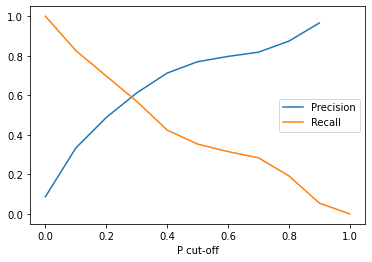

In [120]:
# Finding the precision and recall trade-off

perf_all.plot.line(x = 'P cut-off', y = ['Precision', 'Recall'])

We select the optimal probability cut-off between the point of intersection of accuracy, sensitivity, specificity and the point of intersection of precision, recall, for predicting churn.

In [121]:
# Predicted churn

y_train_logr_pred['predicted churn'] = y_train_logr_pred['probability of predicted churn'].map(lambda x: 1 if x > 0.2 else 0)
y_train_logr_pred = y_train_logr_pred.loc[:, y_train_logr_pred.columns.isin(['actual churn', 'probability of predicted churn', 'predicted churn'])]
y_train_logr_pred.head()

actual churn  probability of predicted churn  predicted churn
8389              0                        0.008026                0
16134             0                        0.049600                0
28528             0                        0.001650                0
7262              1                        0.016538                0
17633             0                        0.195287                0

**Performance Metrics on train data**

In [122]:
# Function to calculate performance metrics

def performance_metrics (y,y_pred,model):
    cm = confusion_matrix(y,y_pred)
    accuracy = (round((cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0]),2))*100
    sensitivity = (round(cm[1, 1] / (cm[1, 1] + cm[1, 0]),2))*100
    specificity = (round(cm[0, 0] / (cm[0, 0] + cm[0, 1]),2))*100
    precision = (round(cm[1, 1] / (cm[1, 1] + cm[0, 1]),2))*100
    recall = (round(cm[1, 1] / (cm[1, 1] + cm[1, 0]),2))*100
    f1_score = round(2 * ((precision * recall) / (precision + recall)),2)
    perf_metrics = {'Performance Metrics':  ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score'], 
                    model: [accuracy, sensitivity, specificity, precision, recall, f1_score]}
    perf_metrics = pd.DataFrame(perf_metrics)
    return perf_metrics

In [123]:
# Performance metrics

perf_metrics_logr_train = pd.DataFrame(performance_metrics(y_train_logr_pred['actual churn'], y_train_logr_pred['predicted churn'],'Logistic Regression for Train (in %)'))
perf_metrics_logr_train

Performance Metrics  Logistic Regression for Train (in %)
0            Accuracy                                 91.00
1         Sensitivity                                 70.00
2         Specificity                                 93.00
3           Precision                                 49.00
4              Recall                                 70.00
5            F1 Score                                 57.65

In [124]:
# Defining a function to plot ROC, importing necessary libraries

def ROC(actual, predicted):
    FPR, TPR, threshold = metrics.roc_curve(actual, predicted, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, predicted)
    plt.figure(figsize = (5, 5))
    plt.plot(FPR, TPR, label = 'AUC = %0.2f' % auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    ax = plt.show()
    return ax

In [125]:
def AUC_ROC(actual, predicted):
    FPR, TPR, threshold = metrics.roc_curve(actual, predicted, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, predicted)
    return round(auc_score,2)

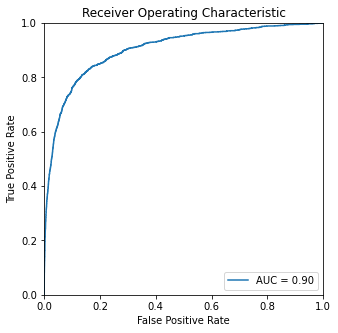

In [126]:
# Plotting the ROC curve

ROC(y_train_logr_pred['actual churn'], y_train_logr_pred['probability of predicted churn'])

In [127]:
# Getting AUC-ROC score

AUC_ROC_logr_train = AUC_ROC(y_train_logr_pred['actual churn'], y_train_logr_pred['probability of predicted churn'])

**Feature selection on test data**

We select the same set of variables in test data as the train data from 6th iteration.

In [128]:
# Feature selection from train data

X_test_logr = X_test_logr[X_train_logr6.columns]
X_test_logr.head()

arpu_7  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2m_mou_8  \
21827 -0.025219     0.004851      1.516917      -0.199393         -0.536339   
3572  -0.076211     1.714617     -0.470136      -0.199393         -0.660225   
10702 -1.228839    -0.581053     -0.751442      -0.199393         -0.691696   
23590 -1.227050    -0.359374     -0.631606      -0.199393         -0.441556   
13504 -0.554780    -0.570403     -0.751131      -0.199393         -0.691043   

       isd_og_mou_8  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_8  \
21827     -0.055181     -0.592447     -0.568808         -0.192024   
3572      -0.051635     -0.688210     -0.729741         -0.193062   
10702     -0.055181     -0.748123     -0.756006         -0.195397   
23590     -0.055181     -0.522737     -0.141629         -0.127797   
13504     -0.055181      1.168971     -0.468824         -0.195397   

       std_ic_t2m_mou_8  std_ic_mou_7  total_ic_mou_8  spl_ic_mou_8  \
21827         -0.185847     -0.318252       -0.610616      3.398653   
3572           0.166765     -0.272847       -0.643581     -0.239761   
10702         -0.268407     -0.335828       -0.796888     -0.239761   
23590         -0.265263     -0.299848       -0.257555     -0.239761   
13504         -0.263377     -0.335828       -0.548373     -0.239761   

       isd_ic_mou_8  total_rech_num_8  total_rech_amt_6  total_rech_amt_8  \
21827     -0.166233          0.376465         -0.269715          0.217868   
3572      -0.166233         -0.057123          0.122352          0.128373   
10702     -0.166233         -0.599109         -0.936227         -0.680231   
23590     -0.166233         -0.924301          0.469865         -0.937728   
13504     -0.160878         -0.490712         -1.007512         -0.623707   

       max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
21827       -0.176100            0.224211          -0.643649   
3572         0.047209            0.224211          -0.643649   
10702       -0.359327           -0.373125           3.029402   
23590       -0.920461           -0.648302          -0.643649   
13504       -0.090212           -0.346279           0.274613   

       av_rech_amt_data_8  sep_vbc_3g  data_usage_8  cred_gold  cred_silver  
21827           -0.614028   -0.128284     -0.557998          0            0  
3572            -0.614028   -0.128284     -0.557998          0            0  
10702            1.041236   -0.128284      1.040551          0            0  
23590           -0.614028   -0.128284     -0.557998          0            1  
13504            0.655883   -0.128284      0.010722          0            0

In [129]:
# Print shape

X_test_logr.shape

(4457, 25)

**Optimal probability cut-off selection for predicting churn on test data**

We select the optimal probability cut-off after looking at the performance metrics for different cut-offs.

In [130]:
# Probability of predicted churn

y_test_logr_pred = pd.DataFrame({'actual churn':y_test_logr.values, 'probability of predicted churn':(logr6.fit()).predict(sm.add_constant(X_test_logr))})
y_test_logr_pred.head()

actual churn  probability of predicted churn
21827             0                        0.009506
3572              0                        0.093218
10702             0                        0.027652
23590             0                        0.075575
13504             0                        0.146614

In [131]:
# Find possibility of prediction for all probability cut-offs

cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in cutoffs:
    y_test_logr_pred['predicted churn, P cut-off=%0.1f' % i] = y_test_logr_pred['probability of predicted churn'].map(lambda x: 1 if x > i else 0)
y_test_logr_pred.head()

actual churn  probability of predicted churn  \
21827             0                        0.009506   
3572              0                        0.093218   
10702             0                        0.027652   
23590             0                        0.075575   
13504             0                        0.146614   

       predicted churn, P cut-off=0.0  predicted churn, P cut-off=0.1  \
21827                               1                               0   
3572                                1                               0   
10702                               1                               0   
23590                               1                               0   
13504                               1                               1   

       predicted churn, P cut-off=0.2  predicted churn, P cut-off=0.3  \
21827                               0                               0   
3572                                0                               0   
10702                               0                               0   
23590                               0                               0   
13504                               0                               0   

       predicted churn, P cut-off=0.4  predicted churn, P cut-off=0.5  \
21827                               0                               0   
3572                                0                               0   
10702                               0                               0   
23590                               0                               0   
13504                               0                               0   

       predicted churn, P cut-off=0.6  predicted churn, P cut-off=0.7  \
21827                               0                               0   
3572                                0                               0   
10702                               0                               0   
23590                               0                               0   
13504                               0                               0   

       predicted churn, P cut-off=0.8  predicted churn, P cut-off=0.9  \
21827                               0                               0   
3572                                0                               0   
10702                               0                               0   
23590                               0                               0   
13504                               0                               0   

       predicted churn, P cut-off=1.0  
21827                               0  
3572                                0  
10702                               0  
23590                               0  
13504                               0

In [132]:
# Computing the sensitvity, specificity and accuracy performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Sensitvity', 'Specificity', 'Accuracy'])

for i in cutoffs:
    cm = confusion_matrix(y_test_logr_pred['actual churn'], y_test_logr_pred['predicted churn, P cut-off=%0.1f' % i])
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
    perf_all.loc[i] = [i, sensitivity, specificity, accuracy]
perf_all

P cut-off  Sensitvity  Specificity  Accuracy
0.0        0.0    1.000000     0.000000  0.086830
0.1        0.1    0.839793     0.836855  0.837110
0.2        0.2    0.697674     0.925307  0.905542
0.3        0.3    0.519380     0.959951  0.921696
0.4        0.4    0.390181     0.975921  0.925062
0.5        0.5    0.335917     0.983784  0.927530
0.6        0.6    0.294574     0.988943  0.928652
0.7        0.7    0.276486     0.990172  0.928203
0.8        0.8    0.183463     0.995577  0.925062
0.9        0.9    0.043928     0.999263  0.916311
1.0        1.0    0.000000     1.000000  0.913170

<AxesSubplot:xlabel='P cut-off'>

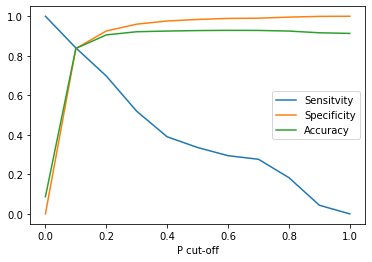

In [133]:
# Finding the optimal cut-off probability

perf_all.plot.line(x = 'P cut-off', y = ['Sensitvity', 'Specificity', 'Accuracy'])

In [134]:
# Computing the precision and recall performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Precision', 'Recall'])

for i in cutoffs:
    cm = confusion_matrix(y_test_logr_pred['actual churn'], y_test_logr_pred['predicted churn, P cut-off=%0.1f' % i])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    perf_all.loc[i] = [i, precision, recall]
perf_all

P cut-off  Precision    Recall
0.0        0.0   0.086830  1.000000
0.1        0.1   0.328615  0.839793
0.2        0.2   0.470383  0.697674
0.3        0.3   0.552198  0.519380
0.4        0.4   0.606426  0.390181
0.5        0.5   0.663265  0.335917
0.6        0.6   0.716981  0.294574
0.7        0.7   0.727891  0.276486
0.8        0.8   0.797753  0.183463
0.9        0.9   0.850000  0.043928
1.0        1.0        NaN  0.000000

<AxesSubplot:xlabel='P cut-off'>

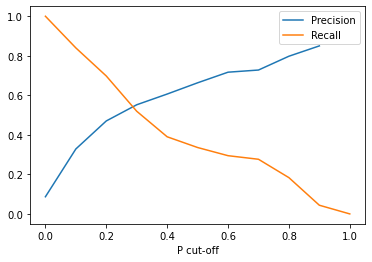

In [135]:
# Finding the precision and recall trade-off

perf_all.plot.line(x = 'P cut-off', y = ['Precision', 'Recall'])

We select the optimal probability cut-off between the point of intersection of accuracy, sensitivity, specificity and the point of intersection of precision, recall, for predicting churn.

In [136]:
# Predicted churn

y_test_logr_pred['predicted churn'] = y_test_logr_pred['probability of predicted churn'].map(lambda x: 1 if x > 0.2 else 0)
y_test_logr_pred = y_test_logr_pred.loc[:, y_test_logr_pred.columns.isin(['actual churn', 'probability of predicted churn', 'predicted churn'])]
y_test_logr_pred.head()

actual churn  probability of predicted churn  predicted churn
21827             0                        0.009506                0
3572              0                        0.093218                0
10702             0                        0.027652                0
23590             0                        0.075575                0
13504             0                        0.146614                0

**Performance metrics on test data**

In [137]:
# Performance metrics

perf_metrics_logr_test = pd.DataFrame(performance_metrics(y_test_logr_pred['actual churn'], y_test_logr_pred['predicted churn'],'Logistic Regression for Test (in %)'))
perf_metrics_logr_test

Performance Metrics  Logistic Regression for Test (in %)
0            Accuracy                                91.00
1         Sensitivity                                70.00
2         Specificity                                93.00
3           Precision                                47.00
4              Recall                                70.00
5            F1 Score                                56.24

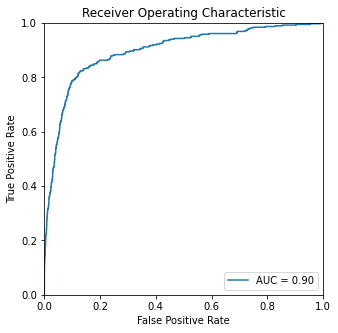

In [138]:
# Plotting the ROC curve

ROC(y_test_logr_pred['actual churn'], y_test_logr_pred['probability of predicted churn'])

In [139]:
# Getting AUC-ROC score

AUC_ROC_logr_test = AUC_ROC(y_test_logr_pred['actual churn'], y_test_logr_pred['probability of predicted churn'])

**Important predictors for churn**

In [140]:
# Finding the predictive power of each variable in our final model

pred_pow = round(logr6.fit().params[1:] / logr6.fit().params[1:].max(), 2)
pred_pow

arpu_7                0.06
onnet_mou_8          -0.04
offnet_mou_8         -0.04
roam_og_mou_8         0.03
loc_og_t2m_mou_8     -0.09
isd_og_mou_8         -0.03
loc_ic_mou_7          0.06
loc_ic_mou_8          1.00
std_ic_t2t_mou_8      0.27
std_ic_t2m_mou_8      0.38
std_ic_mou_7          0.02
total_ic_mou_8       -1.42
spl_ic_mou_8         -0.06
isd_ic_mou_8          0.25
total_rech_num_8     -0.02
total_rech_amt_6      0.04
total_rech_amt_8     -0.06
max_rech_amt_8        0.03
last_day_rch_amt_8   -0.05
total_rech_data_8    -0.02
av_rech_amt_data_8   -0.03
sep_vbc_3g           -0.06
data_usage_8         -0.07
cred_gold            -0.10
cred_silver          -0.04
dtype: float64

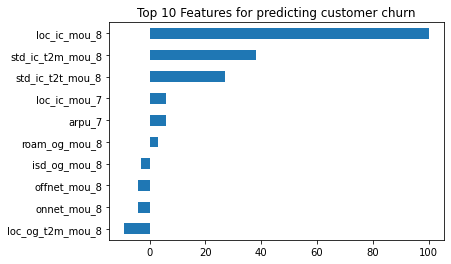

In [141]:
# Visualizing the predictive power of the features

pred_pow_top_10 = pred_pow[:10].sort_values()
(100 * pred_pow_top_10).plot.barh()
plt.title('Top 10 Features for predicting customer churn')
plt.show()

## Logistic Regression with PCA

We perform *Principal Component Analysis (PCA)* on Logistic Regressionto capture the same amount of information with lesser number of variables. We use PCA for predicting the important features for churn. With PCA we have better predictability and, reduced dimensionality.

We perform PCA on the train data from 6th iteration.

**PCA on train data**

In [142]:
# Fitting PCA

pca = PCA(random_state=100)
pca.fit(X_train_logr6)

PCA(random_state=100)

In [143]:
# PCA Components

pca.components_

array([[ 3.68852389e-01,  1.24526485e-01,  2.56607962e-01,
         6.65198225e-02,  2.54780403e-01,  2.40296221e-01,
         2.34373823e-01,  2.55712751e-01,  9.19486274e-02,
         1.19381709e-01,  1.15029737e-01,  2.95706013e-01,
         7.92401269e-03,  9.10277455e-02,  1.45775332e-01,
         3.15051388e-01,  4.09596301e-01,  2.60105404e-01,
         2.09773342e-01, -2.82359143e-02, -1.23023178e-02,
         4.03810609e-02, -2.54323606e-02,  7.28397031e-03,
         1.57513301e-02],
       [ 2.27482429e-01,  1.64244643e-01,  1.07525380e-01,
         1.21480276e-01, -1.28224448e-01,  1.90250033e-01,
        -3.43953279e-01, -3.70972221e-01, -6.40376649e-02,
        -9.77181988e-02, -8.80253728e-02, -3.71638438e-01,
         5.37504983e-02, -3.96062794e-02,  1.41699726e-01,
         2.23901152e-01,  1.69293121e-01, -3.45295017e-02,
        -3.01150306e-02, -2.80843278e-01, -3.56443220e-01,
        -5.49303273e-02, -3.33249238e-01, -1.43318792e-02,
        -3.53835341e-02],
    

In [144]:
# Print shape

pca.components_.shape

(25, 25)

In [145]:
# Variance explained by PCA

pca.explained_variance_ratio_

array([1.78893755e-01, 1.23022402e-01, 1.00760113e-01, 8.07671663e-02,
       6.64795676e-02, 5.77422743e-02, 4.70314080e-02, 4.23832783e-02,
       4.15044421e-02, 4.03098996e-02, 3.89036359e-02, 3.36224918e-02,
       2.42588882e-02, 2.15739425e-02, 1.77493040e-02, 1.69750857e-02,
       1.33679985e-02, 1.15039568e-02, 1.01703438e-02, 9.99501232e-03,
       7.84621670e-03, 7.21732185e-03, 5.06031896e-03, 2.71977809e-03,
       1.41398631e-04])

<BarContainer object of 25 artists>

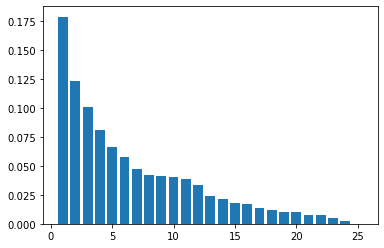

In [146]:
# Variance explained ratio

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [147]:
# Cumulative sum of variance

var_cum = np.cumsum(pca.explained_variance_ratio_)
var_cum

array([0.17889376, 0.30191616, 0.40267627, 0.48344344, 0.549923  ,
       0.60766528, 0.65469669, 0.69707996, 0.73858441, 0.77889431,
       0.81779794, 0.85142043, 0.87567932, 0.89725326, 0.91500257,
       0.93197765, 0.94534565, 0.95684961, 0.96701995, 0.97701497,
       0.98486118, 0.9920785 , 0.99713882, 0.9998586 , 1.        ])

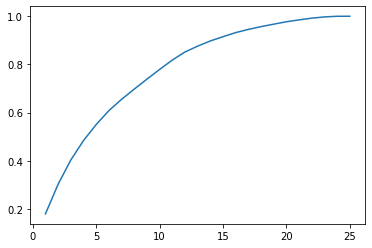

In [148]:
# Scree plot

plt.plot(range(1,len(var_cum)+1), var_cum)

Using scree plot, we identify that the optimal number of principal components to be 12.

In [149]:
# Selecting PC's

pc = PCA(n_components=12, random_state=100)
pc

PCA(n_components=12, random_state=100)

In [150]:
# PCA transformation on train data

X_train_logr_pca = pc.fit_transform(X_train_logr6)
X_train_logr_pca

array([[ 0.46864914,  0.0919545 , -0.22326554, ..., -0.14861064,
        -0.54025889,  0.38259997],
       [-1.58303708,  0.64861937, -0.30751505, ..., -0.0979164 ,
        -0.95111408,  0.86305461],
       [ 2.25955854, -2.77332324, -2.00654   , ..., -0.11626621,
         0.82347442, -0.08924308],
       ...,
       [ 3.69697831, -4.74876567, -1.97233524, ...,  0.04380847,
         0.9347278 , -0.65861915],
       [ 0.49110845,  1.34041278, -0.78452185, ..., -0.03421093,
        -0.59996306,  0.11854778],
       [-0.41843253,  1.53246393, -0.51273487, ..., -0.34393741,
        -0.29686378, -0.46216131]])

In [151]:
# Print shape

X_train_logr_pca.shape

(17826, 12)

<AxesSubplot:>

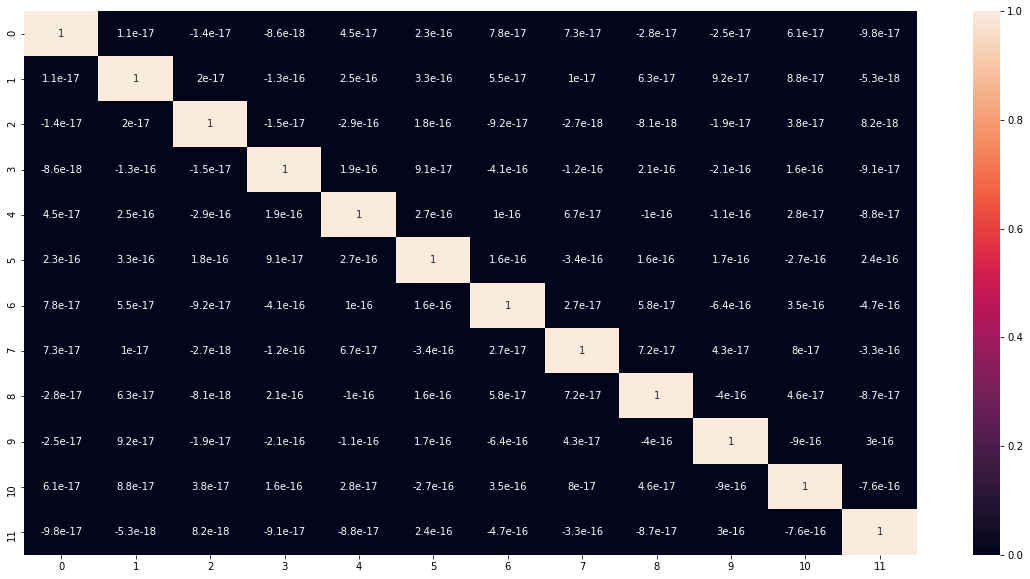

In [152]:
# Coefficients along each PC direction

plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_logr_pca.transpose()), annot=True)

Above heatmap confirms that there is no correlation between the variables, after PC transformation.

**Model Building**

In [153]:
# Fitting using GLM for logistic regression

logr_pca = sm.GLM(y_train_logr ,(sm.add_constant(X_train_logr_pca)),family = sm.families.Binomial())
logr_pca.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17826
Model:                            GLM   Df Residuals:                    17813
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3735.0
Date:                Sat, 26 Feb 2022   Deviance:                       7470.0
Time:                        22:50:56   Pearson chi2:                 4.93e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8772      0.070    -55.774      0.000      -4.013      -3.741
x1            -0.7791      0.034    -23.254      0.000      -0.845      -0.713
x2             0.8681      0.043     20.019      0.000       0.783       0.953
x3            -0.1011      0.045     -2.229      0.026      -0.190      -0.012
x4             0.0577      0.046      1.258      0.208      -0.032       0.148
x5             0.5084      0.051     10.021      0.000       0.409       0.608
x6             0.3537      0.076      4.632      0.000       0.204       0.503
x7             0.4669      0.067      7.015      0.000       0.336       0.597
x8             0.2576      0.153      1.687      0.092      -0.042       0.557
x9            -1.2114      0.130     -9.354      0.000      -1.465      -0.958
x10           -0.1338      0.095     -1.412      0.158      -0.319       0.052
x11            0.6046      0.114      5.327      0.000       0.382       0.827
x12            0.0740      0.083      0.891      0.373      -0.089       0.237
==============================================================================
"""

In [154]:
# Handling multi-collinearity

X_train_logr_pca = pd.DataFrame(X_train_logr_pca)
vif = pd.DataFrame()
vif['Features'] = X_train_logr_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_logr_pca.values, i) for i in range(X_train_logr_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0          0  1.0
1          1  1.0
2          2  1.0
3          3  1.0
4          4  1.0
5          5  1.0
6          6  1.0
7          7  1.0
8          8  1.0
9          9  1.0
10        10  1.0
11        11  1.0

**Optimal probability cut-off selection on train data**

In [155]:
# Probability of predicted churn 

y_train_logr_pca_pred = pd.DataFrame({'actual churn':y_train_logr.values, 'probability of predicted churn':(logr_pca.fit()).predict(sm.add_constant(X_train_logr_pca))})
y_train_logr_pca_pred.head()

actual churn  probability of predicted churn
0             0                        0.018629
1             0                        0.133132
2             0                        0.001863
3             1                        0.019456
4             0                        0.234540

In [156]:
# Find possibility of prediction for all probability cut-offs

cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in cutoffs:
    y_train_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i] = y_train_logr_pca_pred['probability of predicted churn'].map(lambda x: 1 if x > i else 0)
y_train_logr_pca_pred.head()

actual churn  probability of predicted churn  \
0             0                        0.018629   
1             0                        0.133132   
2             0                        0.001863   
3             1                        0.019456   
4             0                        0.234540   

   predicted churn, P cut-off=0.0  predicted churn, P cut-off=0.1  \
0                               1                               0   
1                               1                               1   
2                               1                               0   
3                               1                               0   
4                               1                               1   

   predicted churn, P cut-off=0.2  predicted churn, P cut-off=0.3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   predicted churn, P cut-off=0.4  predicted churn, P cut-off=0.5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=0.6  predicted churn, P cut-off=0.7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=0.8  predicted churn, P cut-off=0.9  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=1.0  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [157]:
# Computing the sensitvity, specificity and accuracy performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Sensitvity', 'Specificity', 'Accuracy'])

for i in cutoffs:
    cm = confusion_matrix(y_train_logr_pca_pred['actual churn'], y_train_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i])
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
    perf_all.loc[i] = [i, sensitivity, specificity, accuracy]
perf_all

P cut-off  Sensitvity  Specificity  Accuracy
0.0        0.0    1.000000     0.000000  0.087176
0.1        0.1    0.794723     0.806846  0.805789
0.2        0.2    0.692407     0.908309  0.889487
0.3        0.3    0.602960     0.945919  0.916022
0.4        0.4    0.385457     0.973574  0.922304
0.5        0.5    0.125483     0.993117  0.917480
0.6        0.6    0.039897     0.998156  0.914619
0.7        0.7    0.018662     0.999385  0.913890
0.8        0.8    0.005792     0.999877  0.913217
0.9        0.9    0.001931     0.999939  0.912936
1.0        1.0    0.000000     1.000000  0.912824

<AxesSubplot:xlabel='P cut-off'>

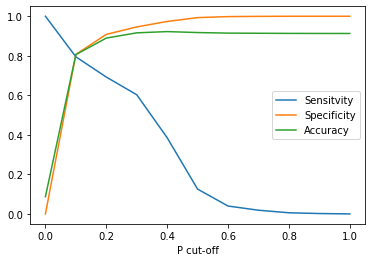

In [158]:
# Finding the optimal cut-off probability

perf_all.plot.line(x = 'P cut-off', y = ['Sensitvity', 'Specificity', 'Accuracy'])

In [159]:
# Computing the precision and recall performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Precision', 'Recall'])

for i in cutoffs:
    cm = confusion_matrix(y_train_logr_pca_pred['actual churn'], y_train_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    perf_all.loc[i] = [i, precision, recall]
perf_all

P cut-off  Precision    Recall
0.0        0.0   0.087176  1.000000
0.1        0.1   0.282092  0.794723
0.2        0.2   0.419003  0.692407
0.3        0.3   0.515685  0.602960
0.4        0.4   0.582119  0.385457
0.5        0.5   0.635179  0.125483
0.6        0.6   0.673913  0.039897
0.7        0.7   0.743590  0.018662
0.8        0.8   0.818182  0.005792
0.9        0.9   0.750000  0.001931
1.0        1.0        NaN  0.000000

<AxesSubplot:xlabel='P cut-off'>

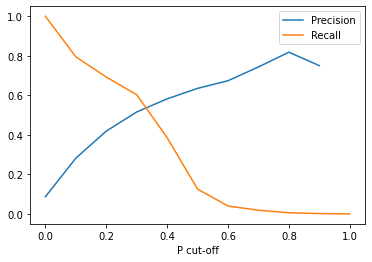

In [160]:
# Finding the precision and recall trade-off

perf_all.plot.line(x = 'P cut-off', y = ['Precision', 'Recall'])

We select the optimal probability cut-off between the point of intersection of accuracy, sensitivity, specificity and the point of intersection of precision, recall, for predicting churn.

In [161]:
# Predicted churn

y_train_logr_pca_pred['predicted churn'] = y_train_logr_pca_pred['probability of predicted churn'].map(lambda x: 1 if x > 0.18 else 0)
y_train_logr_pca_pred = y_train_logr_pca_pred.loc[:, y_train_logr_pca_pred.columns.isin(['actual churn', 'probability of predicted churn', 'predicted churn'])]
y_train_logr_pca_pred.head()

actual churn  probability of predicted churn  predicted churn
0             0                        0.018629                0
1             0                        0.133132                0
2             0                        0.001863                0
3             1                        0.019456                0
4             0                        0.234540                1

**Performance metrics on train data**

In [162]:
# Performance metrics

perf_metrics_logr_pca_train = pd.DataFrame(performance_metrics(y_train_logr_pca_pred['actual churn'], y_train_logr_pca_pred['predicted churn'],'Logistic Regression with PCA for Train (in %)'))
perf_metrics_logr_pca_train

Performance Metrics  Logistic Regression with PCA for Train (in %)
0            Accuracy                                          88.00
1         Sensitivity                                          71.00
2         Specificity                                          90.00
3           Precision                                          40.00
4              Recall                                          71.00
5            F1 Score                                          51.17

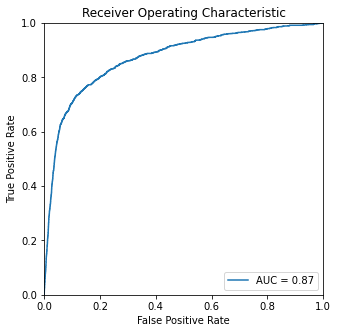

In [163]:
# Plotting the ROC curve

ROC(y_train_logr_pca_pred['actual churn'], y_train_logr_pca_pred['probability of predicted churn'])

In [164]:
# Getting AUC-ROC score

AUC_ROC_logr_pca_train = AUC_ROC(y_train_logr_pca_pred['actual churn'], y_train_logr_pca_pred['probability of predicted churn'])

**PCA on test data**

In [165]:
# Print shape

X_test_logr.shape

(4457, 25)

In [166]:
# PC transformation

X_test_logr_pca = pc.transform(X_test_logr)
X_test_logr_pca = pd.DataFrame(X_test_logr_pca)
X_test_logr_pca.head()

0         1         2         3         4         5         6   \
0 -0.223655  1.718194 -0.529602 -0.136656 -0.831801 -0.993725 -2.304741   
1 -0.543369  1.664736 -0.105635  0.244845  0.343692 -0.327995  1.062711   
2 -2.600443 -1.438818  2.103962  0.679285 -1.086926  0.109300 -0.070541   
3 -1.830635  0.436839 -0.785786 -0.398654  0.770204  0.857820  0.059302   
4 -1.552073 -0.889694  0.342693 -0.362489  0.230695  0.464900  0.274421   

         7         8         9         10        11  
0 -0.030518  1.679615 -0.728660  1.540449  0.064489  
1 -0.371747  0.447245 -0.594904 -0.287710 -0.920248  
2 -0.350614 -0.330270  0.143706  0.006500  0.017661  
3  0.201774 -0.293653  0.007798  0.077439  0.226352  
4 -0.008981 -0.093002  0.003151  0.350712 -0.111087

In [167]:
# Print shape

X_test_logr_pca.shape

(4457, 12)

**Optimum probability cut-off selection for test data**

In [168]:
#Probability of predicted churn

y_test_logr_pca_pred = pd.DataFrame({'actual churn':y_test_logr.values, 'probability of predicted churn':(logr_pca.fit()).predict(sm.add_constant(X_test_logr_pca))})
y_test_logr_pca_pred.head()

actual churn  probability of predicted churn
0             0                        0.006529
1             0                        0.097182
2             0                        0.028610
3             0                        0.305246
4             0                        0.058836

In [169]:
# Find possibility of prediction for all probability cut-offs

cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in cutoffs:
    y_test_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i] = y_test_logr_pca_pred['probability of predicted churn'].map(lambda x: 1 if x > i else 0)
y_test_logr_pca_pred.head()

actual churn  probability of predicted churn  \
0             0                        0.006529   
1             0                        0.097182   
2             0                        0.028610   
3             0                        0.305246   
4             0                        0.058836   

   predicted churn, P cut-off=0.0  predicted churn, P cut-off=0.1  \
0                               1                               0   
1                               1                               0   
2                               1                               0   
3                               1                               1   
4                               1                               0   

   predicted churn, P cut-off=0.2  predicted churn, P cut-off=0.3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               1                               1   
4                               0                               0   

   predicted churn, P cut-off=0.4  predicted churn, P cut-off=0.5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=0.6  predicted churn, P cut-off=0.7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=0.8  predicted churn, P cut-off=0.9  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   predicted churn, P cut-off=1.0  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [170]:
# Computing the sensitvity, specificity and accuracy performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Sensitvity', 'Specificity', 'Accuracy'])

for i in cutoffs:
    cm = confusion_matrix(y_test_logr_pca_pred['actual churn'], y_test_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i])
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
    perf_all.loc[i] = [i, sensitivity, specificity, accuracy]
perf_all

P cut-off  Sensitvity  Specificity  Accuracy
0.0        0.0    1.000000     0.000000  0.086830
0.1        0.1    0.806202     0.801966  0.802333
0.2        0.2    0.682171     0.902948  0.883778
0.3        0.3    0.594315     0.941278  0.911151
0.4        0.4    0.390181     0.972727  0.922145
0.5        0.5    0.111111     0.991892  0.915414
0.6        0.6    0.036176     0.998034  0.914516
0.7        0.7    0.010336     0.999509  0.913619
0.8        0.8    0.002584     0.999754  0.913170
0.9        0.9    0.000000     0.999754  0.912946
1.0        1.0    0.000000     1.000000  0.913170

<AxesSubplot:xlabel='P cut-off'>

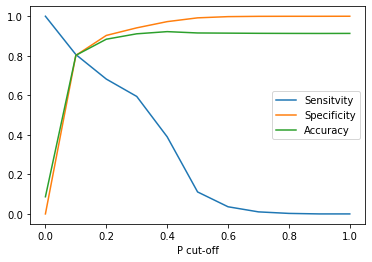

In [171]:
# Finding the optimal cut-off probability

perf_all.plot.line(x = 'P cut-off', y = ['Sensitvity', 'Specificity', 'Accuracy'])

In [172]:
# Computing the precision and recall performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Precision', 'Recall'])

for i in cutoffs:
    cm = confusion_matrix(y_test_logr_pca_pred['actual churn'], y_test_logr_pca_pred['predicted churn, P cut-off=%0.1f' % i])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    perf_all.loc[i] = [i, precision, recall]
perf_all

P cut-off  Precision    Recall
0.0        0.0   0.086830  1.000000
0.1        0.1   0.279070  0.806202
0.2        0.2   0.400607  0.682171
0.3        0.3   0.490405  0.594315
0.4        0.4   0.576336  0.390181
0.5        0.5   0.565789  0.111111
0.6        0.6   0.636364  0.036176
0.7        0.7   0.666667  0.010336
0.8        0.8   0.500000  0.002584
0.9        0.9   0.000000  0.000000
1.0        1.0        NaN  0.000000

<AxesSubplot:xlabel='P cut-off'>

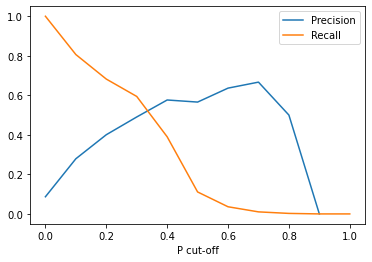

In [173]:
# Finding the precision and recall trade-off

perf_all.plot.line(x = 'P cut-off', y = ['Precision', 'Recall'])

We select the optimal probability cut-off between the point of intersection of accuracy, sensitivity, specificity and the point of intersection of precision, recall, for predicting churn.

In [174]:
# Predicted churn

y_test_logr_pca_pred['predicted churn'] = y_test_logr_pca_pred['probability of predicted churn'].map(lambda x: 1 if x > 0.18 else 0)
y_test_logr_pca_pred = y_test_logr_pca_pred.loc[:, y_test_logr_pca_pred.columns.isin(['actual churn', 'probability of predicted churn', 'predicted churn'])]
y_test_logr_pca_pred.head()

actual churn  probability of predicted churn  predicted churn
0             0                        0.006529                0
1             0                        0.097182                0
2             0                        0.028610                0
3             0                        0.305246                1
4             0                        0.058836                0

**Performance metrics for test data**

In [175]:
# Performance metrics

perf_metrics_logr_pca_test = pd.DataFrame(performance_metrics(y_test_logr_pca_pred['actual churn'], y_test_logr_pca_pred['predicted churn'],'Logistic Regression with PCA for Test (in %)'))
perf_metrics_logr_pca_test

Performance Metrics  Logistic Regression with PCA for Test (in %)
0            Accuracy                                         87.00
1         Sensitivity                                         70.00
2         Specificity                                         89.00
3           Precision                                         37.00
4              Recall                                         70.00
5            F1 Score                                         48.41

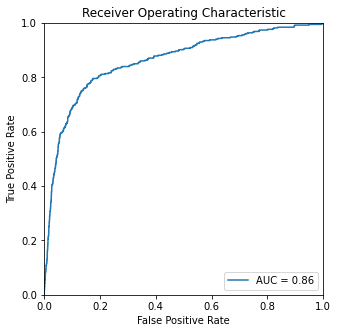

In [176]:
# Plotting the ROC curve

ROC(y_test_logr_pca_pred['actual churn'], y_test_logr_pca_pred['probability of predicted churn'])

In [177]:
# Getting AUC-ROC score

AUC_ROC_logr_pca_test = AUC_ROC(y_test_logr_pca_pred['actual churn'], y_test_logr_pca_pred['probability of predicted churn'])

## Decision Tree

**PCA on train data**

In [178]:
# Fitting PCA

pca = PCA(random_state=100)
pca.fit(X_train_dt)

PCA(random_state=100)

In [179]:
# Print shape

X_train_dt.shape

(17826, 123)

In [180]:
# Numerical distribution

X_train_dt.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         17826.0         17826.0         17826.0  17826.000000   
mean              0.0             0.0             0.0    582.191421   
std               0.0             0.0             0.0    460.992399   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    353.172250   
50%               0.0             0.0             0.0    509.672500   
75%               0.0             0.0             0.0    715.788000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  17826.000000  17826.000000  17826.000000  17826.000000  17826.000000   
mean     581.079106    520.236074    311.066092    318.659235    276.085232   
std      481.833353    511.742080    486.493820    506.199279    475.159996   
min    -2014.045000   -945.808000      0.000000      0.000000      0.000000   
25%      356.477500    262.019500     34.310000     32.330000     26.840000   
50%      508.061000    451.721000    119.265000    119.290000     92.520000   
75%      708.528500    670.802500    373.360000    379.412500    306.290000   
max    35145.834000  33543.624000   7011.110000   7399.710000   7174.580000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  17826.000000  17826.000000  17826.000000   17826.000000   17826.000000   
mean     433.563111    440.081541    386.772206      17.534212      13.913483   
std      508.648434    528.358123    514.721429      77.798837      76.056058   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      112.237500    110.782500     92.140000       0.000000       0.000000   
50%      279.875000    279.405000    230.730000       0.000000       0.000000   
75%      557.450000    569.012500    501.605000       0.000000       0.000000   
max     8362.360000   9667.130000  14007.340000    2613.310000    2933.080000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   17826.000000   17826.000000   17826.000000   17826.000000   
mean       13.324835      30.176423      23.126324      22.794443   
std        73.820187     121.464481     102.011343     114.322151   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3161.790000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      17826.000000      17826.000000      17826.000000      17826.000000   
mean          95.231237         96.996945         87.954084        184.185168   
std          236.564448        250.424360        229.404160        267.090560   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.865000          8.540000          6.380000         29.715000   
50%           31.480000         31.660000         26.535000         93.335000   
75%           92.202500         91.437500         84.660000        238.407500   
max         5278.290000       6371.980000       7010.740000       4729.740000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      17826.000000      17826.000000      17826.000000      17826.000000   
mean         183.669869        169.453693          7.073420          7.181287   
std          252.817930        244.989623         22.634393         23.583104   
min            0.000000          0.000000          0.000000          0.000000   
25%           31.932500         25.432500          0.000000          0.000000   
50%           96.340000         82.590000          0.280000          0.350000   
75%   

In [181]:
# Print shape

X_test_dt.shape

(4457, 123)

In [182]:
# Numerical distribution

X_test_dt.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count          4457.0          4457.0          4457.0   4457.000000   
mean              0.0             0.0             0.0    592.268129   
std               0.0             0.0             0.0    477.162355   
min               0.0             0.0             0.0    -17.016000   
25%               0.0             0.0             0.0    354.077000   
50%               0.0             0.0             0.0    508.450000   
75%               0.0             0.0             0.0    731.007000   
max               0.0             0.0             0.0  15487.684000   

             arpu_7        arpu_8  onnet_mou_6  onnet_mou_7   onnet_mou_8  \
count   4457.000000   4457.000000  4457.000000  4457.000000   4457.000000   
mean     590.005054    524.224532   299.677830   313.469639    269.507593   
std      468.016188    519.462711   476.300095   507.380074    502.503171   
min    -1084.211000     -5.000000     0.000000     0.000000      0.000000   
25%      352.283000    259.072000    33.610000    32.330000     26.390000   
50%      506.682000    452.633000   116.440000   112.460000     85.940000   
75%      719.946000    676.568000   354.180000   372.360000    289.530000   
max    14624.089000  16040.503000  6459.340000  7411.010000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count   4457.000000   4457.000000   4457.000000    4457.000000    4457.000000   
mean     440.285252    445.197430    382.802935      18.472944      14.269693   
std      526.253496    537.865676    493.332831      92.551573      88.982439   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      114.690000    113.240000     92.140000       0.000000       0.000000   
50%      278.390000    283.810000    235.330000       0.000000       0.000000   
75%      571.190000    578.080000    498.540000       0.000000       0.000000   
max     6712.810000   7043.980000   7460.210000    2307.910000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count    4457.000000    4457.000000    4457.000000    4457.000000   
mean       15.129208      31.040568      22.844216      22.085201   
std        93.207767     142.164079     107.545872     104.231715   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2898.340000    3775.110000    1900.060000    2939.860000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count       4457.000000       4457.000000       4457.000000       4457.000000   
mean          94.622093         97.238670         88.011436        184.495685   
std          237.371270        257.706861        269.299180        257.001450   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.830000          8.730000          6.630000         29.910000   
50%           30.630000         32.010000         27.640000         97.860000   
75%           90.860000         90.210000         83.240000        240.390000   
max         6431.330000       7163.210000      10752.560000       4212.040000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count       4457.000000       4457.000000       4457.000000        4457.00000   
mean         186.843451        172.939744          7.998681           7.87904   
std          255.406969        248.981040         31.802860          27.75861   
min            0.000000          0.000000          0.000000           0.00000   
25%           33.340000         25.830000          0.000000           0.00000   
50%          100.840000         86.940000          0.480000           0.51000   
75%          248.180000 

In [183]:
# PCA Components

pca.components_

array([[-1.93348635e-19,  1.11022302e-16,  1.11022302e-16, ...,
        -1.05940165e-04, -1.03344108e-05, -1.72794348e-05],
       [ 4.22556850e-19, -1.11022302e-16,  1.38777878e-17, ...,
         5.96081906e-05,  2.79699331e-05,  5.59964295e-05],
       [ 5.71171463e-20, -9.02056208e-17,  1.07552856e-16, ...,
         1.18149202e-05, -3.60885602e-06, -2.92232227e-05],
       ...,
       [ 0.00000000e+00, -1.37615698e-02, -5.42009841e-03, ...,
         1.79623914e-01, -2.72782725e-16, -1.94400838e-16],
       [ 0.00000000e+00, -4.39959960e-03, -1.26976877e-03, ...,
         6.69495023e-01,  3.37464914e-16,  1.06447478e-16],
       [ 9.99999539e-01, -2.50589290e-04,  9.26510626e-04, ...,
         2.26562064e-07,  1.24592461e-15, -1.53846234e-15]])

In [184]:
# Print shape

pca.components_.shape

(123, 123)

In [185]:
# Variance explained by PCA

pca.explained_variance_ratio_

array([3.55549608e-01, 1.38286021e-01, 9.35074212e-02, 7.80890003e-02,
       7.18033710e-02, 4.40209628e-02, 3.34434132e-02, 3.25351985e-02,
       1.68805909e-02, 1.50072306e-02, 1.21810964e-02, 1.04868606e-02,
       9.10647365e-03, 8.17046353e-03, 6.88210015e-03, 6.84846291e-03,
       6.08996217e-03, 5.78255873e-03, 5.37576451e-03, 5.13818437e-03,
       4.57278918e-03, 4.36007069e-03, 3.64429731e-03, 2.96697491e-03,
       2.57255947e-03, 2.37702733e-03, 2.19145899e-03, 1.77880503e-03,
       1.62565564e-03, 1.37516510e-03, 1.33897274e-03, 1.08269462e-03,
       1.07219020e-03, 1.05537525e-03, 1.00562581e-03, 9.29063577e-04,
       8.95148581e-04, 8.52365592e-04, 8.36328274e-04, 7.85360257e-04,
       7.33303621e-04, 6.60837963e-04, 6.30999820e-04, 5.74157948e-04,
       5.15332256e-04, 5.01907756e-04, 4.70174748e-04, 4.03573411e-04,
       3.44927835e-04, 3.16024063e-04, 3.10705753e-04, 2.68437409e-04,
       2.09280080e-04, 1.88927781e-04, 1.55010309e-04, 1.33454968e-04,
      

<BarContainer object of 123 artists>

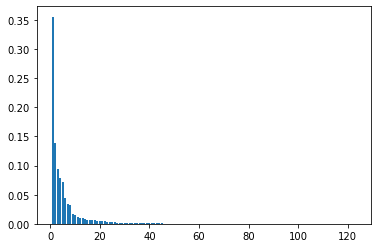

In [186]:
# Variance explained ratio

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [187]:
# Cumulative sum of variance

var_cum = np.cumsum(pca.explained_variance_ratio_)
var_cum

array([0.35554961, 0.49383563, 0.58734305, 0.66543205, 0.73723542,
       0.78125638, 0.8146998 , 0.847235  , 0.86411559, 0.87912282,
       0.89130391, 0.90179077, 0.91089725, 0.91906771, 0.92594981,
       0.93279827, 0.93888824, 0.9446708 , 0.95004656, 0.95518474,
       0.95975753, 0.9641176 , 0.9677619 , 0.97072888, 0.97330144,
       0.97567846, 0.97786992, 0.97964873, 0.98127438, 0.98264955,
       0.98398852, 0.98507122, 0.98614341, 0.98719878, 0.98820441,
       0.98913347, 0.99002862, 0.99088098, 0.99171731, 0.99250267,
       0.99323598, 0.99389681, 0.99452781, 0.99510197, 0.9956173 ,
       0.99611921, 0.99658939, 0.99699296, 0.99733789, 0.99765391,
       0.99796462, 0.99823306, 0.99844234, 0.99863126, 0.99878627,
       0.99891973, 0.99904734, 0.99916995, 0.99927765, 0.99937667,
       0.99946877, 0.99954757, 0.99961839, 0.9996745 , 0.99971847,
       0.9997581 , 0.99979385, 0.99982387, 0.99984668, 0.99986434,
       0.99988127, 0.9998968 , 0.99990962, 0.99992129, 0.99993

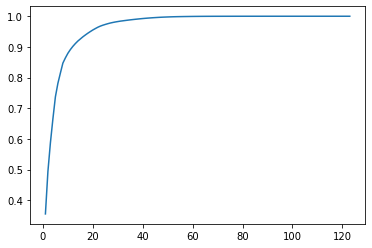

In [188]:
# Scree plot

plt.plot(range(1,len(var_cum)+1), var_cum)

Using scree plot, we identify that the optimal number of principal components to be 20.

In [189]:
# Selecting PC's

pc = PCA(n_components=20, random_state=100)
pc

PCA(n_components=20, random_state=100)

In [190]:
# PCA transformation on train data

X_train_dt_pca = pc.fit_transform(X_train_dt)
X_train_dt_pca = pd.DataFrame(X_train_dt_pca)
X_train_dt_pca.head()

0            1            2           3           4            5   \
0  -745.313127   633.520809    57.904196 -116.484949 -219.470192  -481.607139   
1 -1381.309145  -421.686187   191.761517   75.047870  401.135275  -242.448412   
2  -610.309896  1651.276000  -227.647232 -729.808610 -810.189468  1162.100635   
3 -1831.700128  -302.701480   163.877209  525.078782   94.524104    55.223349   
4   183.512016  -779.696695  1311.563213 -345.564851  165.788154  -176.918883   

           6           7           8           9           10          11  \
0 -337.977746  387.468109 -265.906232  136.996118  -48.748397   65.515548   
1 -189.607540  538.972332   12.915849 -103.558335  564.528603  293.941388   
2 -649.193214  360.450946 -234.371912  170.503711 -211.365727 -302.643351   
3  400.779129 -186.482425   55.379943    4.627557 -106.647951   13.970984   
4 -856.346116 -590.740149  103.219741 -111.257670 -261.213977  -52.417090   

           12          13          14          15          16          17  \
0 -173.434061  -66.120764  -60.007469  225.552627   -4.473439   41.772305   
1 -545.894833  -92.790471 -206.370585  490.998066   13.968477 -141.447443   
2   -7.103675 -306.263218   42.582116  113.995618 -271.090221 -375.274851   
3 -215.004252   98.208801   13.121863  -63.905437  196.826162 -354.692446   
4 -174.364383  203.476416 -459.338712  -60.449306   -1.458009    5.790661   

           18          19  
0  -91.324105   55.204740  
1  -65.465874  107.896395  
2  189.133083 -399.125873  
3 -417.986633  -68.469989  
4   82.699998  -10.581501

In [191]:
# Making train data copy from Decision Tree with PCA for Random Forest

X_train_rf_pca = X_train_dt_pca.copy()
y_train_rf = y_train_dt.copy()

In [192]:
#Print shape

X_train_dt_pca.shape

(17826, 20)

<AxesSubplot:>

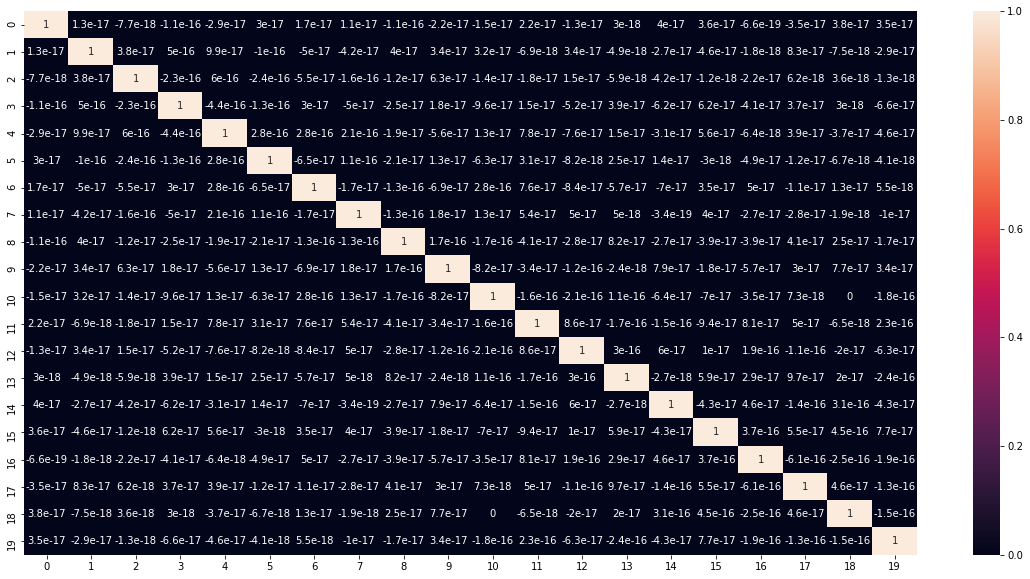

In [193]:
# Coefficients along each PC direction

plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_dt_pca.transpose()), annot=True)

Above heatmap confirms that there is no correlation between the variables, after PC transformation.

**Model Building without hyperparameter tuning**

In [194]:
# Fitting decision tree on train

dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train_dt_pca, y_train_dt)

DecisionTreeClassifier(random_state=100)

In [195]:
# Prediciton on train

y_train_dt_pred = dt.predict(X_train_dt_pca)

**Performance metrics on train data**

In [196]:
# Performance metrics

perf_metrics_dt_nh_train = pd.DataFrame(performance_metrics(y_train_dt,y_train_dt_pred,'Decision Tree w/o hyperparameter tuning with PCA for Train (in %)'))
perf_metrics_dt_nh_train

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Decision Tree w/o hyperparameter tuning with PCA for Train (in %)  
0                                              100.0                  
1                                              100.0                  
2                                              100.0                  
3                                              100.0                  
4                                              100.0                  
5                                              100.0

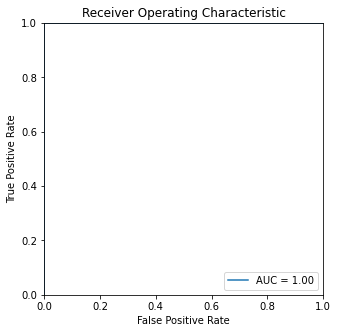

In [197]:
# Plotting the ROC curve

ROC(y_train_dt,y_train_dt_pred)

In [198]:
# Getting AUC-ROC score

AUC_ROC_dt_nh_train = AUC_ROC(y_train_dt,y_train_dt_pred)

**PCA on test data**

In [199]:
# Fitting PCA

pca = PCA(random_state=100)
pca.fit(X_test_dt)

PCA(random_state=100)

In [200]:
# Tranform PCA on test

X_test_dt_pca = pc.transform(X_test_dt)
X_test_dt_pca = pd.DataFrame(X_test_dt_pca)
X_test_dt_pca.head()

0            1            2           3           4           5   \
0  1045.370944  -597.388556  1379.895467  742.989446 -682.440936 -164.485190   
1  2039.320210 -1836.402638 -1231.911354  129.935671  219.194303  130.441751   
2 -2105.062226  -924.504376   253.539273  248.091069  -63.224244 -262.502481   
3 -1123.682102   -71.749930  -535.818895 -835.752559  434.549386 -540.568895   
4 -1964.150936  -312.248973    79.391801   71.282361 -260.842733  432.278596   

           6           7           8           9           10          11  \
0  156.090269  580.056386  181.120182   75.543409  246.392441 -149.028354   
1  132.374883  286.785565 -123.054568  146.099975 -131.816156  -38.712967   
2    8.790941  163.182865   65.439357  -27.371099  -36.761521  -24.860749   
3   44.574090  563.167487  466.644410  132.410439  708.591681 -107.981722   
4 -293.043575   52.967183   41.231209   14.046976  -63.450431 -205.527227   

           12          13          14          15          16          17  \
0  185.095487  -91.484436   59.768249   59.723682  -25.469771  -30.059255   
1   40.859088   11.638438 -458.816829   -6.999755   36.429999  -16.229451   
2 -221.693119  249.601819  -29.615857 -123.461850   56.873080  -64.946440   
3  394.003970  178.903974 -229.731569  218.396684  207.523402 -359.768667   
4  159.262807   52.908519  -25.622979  -55.664634 -346.401862  -11.855731   

           18          19  
0  -10.970780  -34.787988  
1   42.911882  -32.623343  
2  -95.685322  -44.939900  
3  258.540015 -320.844053  
4 -201.420499 -119.839282

In [201]:
# Making test data copy from Decision Tree with PCA for Random Forest

X_test_rf_pca = X_test_dt_pca.copy()
y_test_rf = y_test_dt.copy()

In [202]:
# Predicting with PCA

y_test_dt_pred = dt.predict(X_test_dt_pca)

In [203]:
cm = confusion_matrix(y_test_dt,y_test_dt_pred)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

In [204]:
# Performance metrics

perf_metrics_dt_nh_test = pd.DataFrame(performance_metrics(y_test_dt,y_test_dt_pred,'Decision Tree w/o hyperparameter tuning with PCA for Test (in %)'))
perf_metrics_dt_nh_test

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Decision Tree w/o hyperparameter tuning with PCA for Test (in %)  
0                                              87.00                 
1                                              35.00                 
2                                              92.00                 
3                                              29.00                 
4                                              35.00                 
5                                              31.72

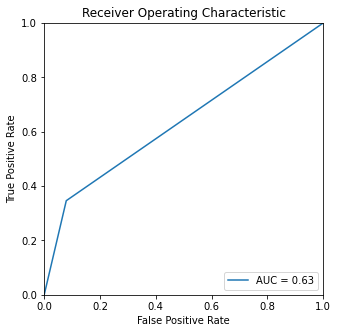

In [205]:
# Plotting the ROC curve

ROC(y_test_dt,y_test_dt_pred)

In [206]:
# Getting AUC-ROC score

AUC_ROC_dt_nh_test = AUC_ROC(y_test_dt,y_test_dt_pred)

**Model building with hyperparameter tuning**

In [207]:
# Create the parameter grid
param_grid = {'max_depth': range(0, 50, 10), 'min_samples_leaf': range(0, 200, 50), 'min_samples_split': range(0, 200, 50), 'criterion': ["entropy", "gini"]}

n_folds = 5

# Instantiate the grid search model
dt_cv = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_cv, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_dt_pca,y_train_dt)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 50, 10),
                         'min_samples_leaf': range(0, 200, 50),
                         'min_samples_split': range(0, 200, 50)},
             verbose=1)

In [208]:
# Best score

print("Best accuracy\n", grid_search.best_score_*100,'%\n')
print('Best parameters\n', grid_search.best_estimator_)

Best accuracy
 91.18142594977185 %

Best parameters
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


We select the best parameters (above) to fit our decision tree.

In [209]:
# Fitting decision tree on best parameters

dt_cv = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=100, min_samples_split=50, criterion='entropy', random_state=100)
dt_cv.fit(X_train_dt_pca, y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=50, random_state=100)

In [210]:
# Predicting decision tree using best parameters

y_train_dt_cv_pred = dt_cv.predict(X_train_dt_pca)

In [211]:
# Performance metrics

perf_metrics_dt_train = pd.DataFrame(performance_metrics(y_train_dt,y_train_dt_cv_pred,'Decision Tree w/ hyperparameter tuning with PCA for Train (in %)'))
perf_metrics_dt_train

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Decision Tree w/ hyperparameter tuning with PCA for Train (in %)  
0                                              92.00                 
1                                              14.00                 
2                                              99.00                 
3                                              61.00                 
4                                              14.00                 
5                                              22.77

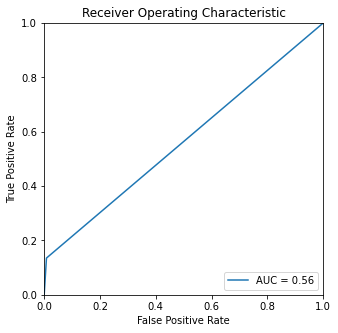

In [212]:
# Plotting the ROC curve

ROC(y_train_dt,y_train_dt_cv_pred)

In [213]:
# Getting AUC-ROC score

AUC_ROC_dt_train = AUC_ROC(y_train_dt,y_train_dt_cv_pred)

**Performance metrics on test data**

In [214]:
#Prediction

y_test_dt_cv_pred = dt_cv.predict(X_test_dt_pca)

In [215]:
# Performance metrics

perf_metrics_dt_test = pd.DataFrame(performance_metrics(y_test_dt,y_test_dt_cv_pred,'Decision Tree w/ hyperparameter tuning with PCA for Test (in %)'))
perf_metrics_dt_test

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Decision Tree w/ hyperparameter tuning with PCA for Test (in %)  
0                                              91.00                
1                                              12.00                
2                                              99.00                
3                                              50.00                
4                                              12.00                
5                                              19.35

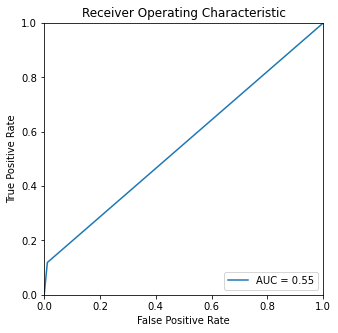

In [216]:
# Plotting the ROC curve

ROC(y_test_dt,y_test_dt_cv_pred)

In [217]:
# Getting AUC-ROC score

AUC_ROC_dt_test = AUC_ROC(y_test_dt,y_test_dt_cv_pred)

## Random Forest

**PCA on train data**

In [218]:
# Print shape

X_train_rf_pca.shape

(17826, 20)

In [219]:
X_test_rf_pca.shape

(4457, 20)

We have created copies from decision tree input variables after PC transformation. We use these variables for Random Forest model building.

**Model Building without hyperparameter tuning**

In [220]:
# Fitting Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train_rf_pca,y_train_rf)

RandomForestClassifier()

In [221]:
# Prediction

y_train_rf_pca_pred = rfc.predict(X_train_rf_pca)

In [222]:
# Performance metrics

perf_metrics_rf_nh_train = pd.DataFrame(performance_metrics(y_train_rf,y_train_rf_pca_pred,'Random Forest w/o hyperparameter tuning with PCA for Train (in %)'))
perf_metrics_rf_nh_train

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Random Forest w/o hyperparameter tuning with PCA for Train (in %)  
0                                              100.0                  
1                                              100.0                  
2                                              100.0                  
3                                              100.0                  
4                                              100.0                  
5                                              100.0

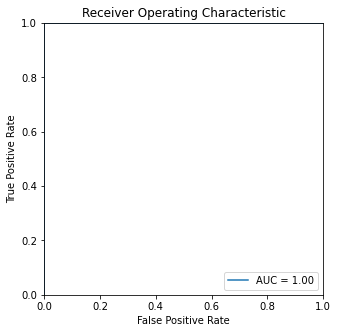

In [223]:
# Plotting the ROC curve

ROC(y_train_rf,y_train_rf_pca_pred)

In [224]:
# Getting AUC-ROC score

AUC_ROC_rf_nh_train = AUC_ROC(y_train_rf,y_train_rf_pca_pred)

**Performance Metrics on test data**

In [225]:
# Prediction

y_test_rf_pca_pred = rfc.predict(X_test_rf_pca)

In [226]:
# Performance metrics

perf_metrics_rf_nh_test = pd.DataFrame(performance_metrics(y_test_rf,y_test_rf_pca_pred,'Random Forest w/o hyperparameter tuning with PCA for Test (in %)'))
perf_metrics_rf_nh_test

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Random Forest w/o hyperparameter tuning with PCA for Test (in %)  
0                                              92.00                 
1                                              19.00                 
2                                              99.00                 
3                                              58.00                 
4                                              19.00                 
5                                              28.62

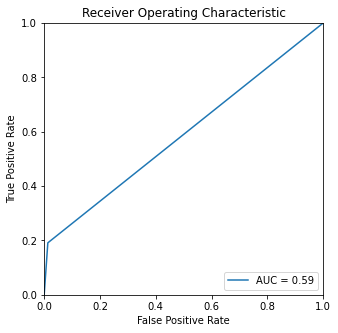

In [227]:
# Plotting the ROC curve

ROC(y_test_rf,y_test_rf_pca_pred)

In [228]:
# Getting AUC-ROC score

AUC_ROC_rf_nh_test = AUC_ROC(y_test_rf,y_test_rf_pca_pred)

**Model Building with hyperparameter tuning**

In [229]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [4,8,12,16,20], 'min_samples_leaf': range(10, 20, 30), 'min_samples_split': range(10, 30, 50), 'n_estimators': [5,10,15,20], 'max_features': [5, 10, 15]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [230]:
# Fit the grid search to the data
grid_search.fit(X_train_rf_pca, y_train_rf)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [231]:
# Best score

print("Best accuracy\n", grid_search.best_score_*100,'%\n')
print('Best parameters\n', grid_search.best_estimator_)

Best accuracy
 91.69191069224726 %

Best parameters
 RandomForestClassifier(max_depth=16, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=15)


We select the best parameters (above) to fit our Random Forest.

In [232]:
# Fitting random forest using best hyperparameters

rf_cv = RandomForestClassifier(max_depth=8, max_features=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, random_state=100)
rf_cv.fit(X_train_rf_pca, y_train_rf)

RandomForestClassifier(max_depth=8, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20, random_state=100)

In [233]:
#Prediction

y_train_rf_pca_cv_pred = rf_cv.predict(X_train_rf_pca)

In [234]:
# Performance metrics

perf_metrics_rf_train = pd.DataFrame(performance_metrics(y_train_rf,y_train_rf_pca_cv_pred,'Random Forest w/ hyperparameter tuning with PCA for Train (in %)'))
perf_metrics_rf_train

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Random Forest w/ hyperparameter tuning with PCA for Train (in %)  
0                                               94.0                 
1                                               33.0                 
2                                              100.0                 
3                                               88.0                 
4                                               33.0                 
5                                               48.0

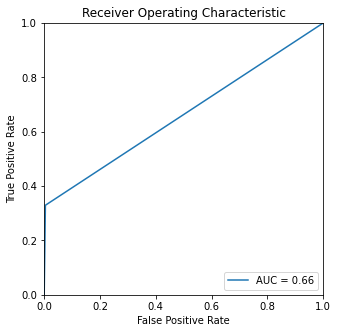

In [235]:
# Plotting the ROC curve

ROC(y_train_rf,y_train_rf_pca_cv_pred)

In [236]:
# Getting AUC-ROC score

AUC_ROC_rf_train = AUC_ROC(y_train_rf,y_train_rf_pca_cv_pred)

**Performance metrics on test data**

In [237]:
#Prediction

y_test_rf_pca_cv_pred = rf_cv.predict(X_test_rf_pca)

In [238]:
# Performance metrics

perf_metrics_rf_test = pd.DataFrame(performance_metrics(y_test_rf,y_test_rf_pca_cv_pred,'Random Forest w/ hyperparameter tuning with PCA for Test (in %)'))
perf_metrics_rf_test

Performance Metrics  \
0            Accuracy   
1         Sensitivity   
2         Specificity   
3           Precision   
4              Recall   
5            F1 Score   

   Random Forest w/ hyperparameter tuning with PCA for Test (in %)  
0                                              92.00                
1                                              18.00                
2                                              99.00                
3                                              57.00                
4                                              18.00                
5                                              27.36

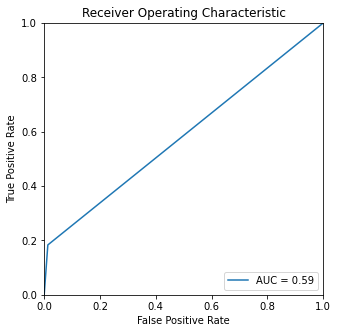

In [239]:
# Plotting the ROC curve

ROC(y_test_rf,y_test_rf_pca_cv_pred)

In [240]:
# Getting AUC-ROC score

AUC_ROC_rf_test = AUC_ROC(y_test_rf,y_test_rf_pca_cv_pred)

## Summary

**Performance Metrics for all Models**

In [244]:
# Performance metrics

perf_metrics_all_models = pd.concat([perf_metrics_logr_train, perf_metrics_logr_test, perf_metrics_logr_pca_train, perf_metrics_logr_pca_test, perf_metrics_dt_nh_train, perf_metrics_dt_nh_test, perf_metrics_dt_train, perf_metrics_dt_test, perf_metrics_rf_nh_train, perf_metrics_rf_nh_test, perf_metrics_rf_train, perf_metrics_rf_test], axis = 1)
perf_metrics_all_models = perf_metrics_all_models.loc[:,~perf_metrics_all_models.columns.duplicated()]
perf_metrics_all_models.rename(columns = {'Performance Metrics':'Performance Metrics for the Model'}, inplace = True)
perf_metrics_all_models = perf_metrics_all_models.set_index('Performance Metrics for the Model')
perf_metrics_all_models = perf_metrics_all_models.T
perf_metrics_all_models['AUC-ROC Score'] = [AUC_ROC_logr_train*100, AUC_ROC_logr_test*100, AUC_ROC_logr_pca_train*100, AUC_ROC_logr_pca_test*100, AUC_ROC_dt_nh_train*100, AUC_ROC_dt_nh_test*100, AUC_ROC_dt_train*100, AUC_ROC_dt_test*100, AUC_ROC_rf_nh_train*100, AUC_ROC_rf_nh_test*100, AUC_ROC_rf_train*100, AUC_ROC_rf_test*100]
perf_metrics_all_models

Performance Metrics for the Model                   Accuracy  Sensitivity  \
Logistic Regression for Train (in %)                    91.0         70.0   
Logistic Regression for Test (in %)                     91.0         70.0   
Logistic Regression with PCA for Train (in %)           88.0         71.0   
Logistic Regression with PCA for Test (in %)            87.0         70.0   
Decision Tree w/o hyperparameter tuning with PC...     100.0        100.0   
Decision Tree w/o hyperparameter tuning with PC...      87.0         35.0   
Decision Tree w/ hyperparameter tuning with PCA...      92.0         14.0   
Decision Tree w/ hyperparameter tuning with PCA...      91.0         12.0   
Random Forest w/o hyperparameter tuning with PC...     100.0        100.0   
Random Forest w/o hyperparameter tuning with PC...      92.0         19.0   
Random Forest w/ hyperparameter tuning with PCA...      94.0         33.0   
Random Forest w/ hyperparameter tuning with PCA...      92.0         18.0   

Performance Metrics for the Model                   Specificity  Precision  \
Logistic Regression for Train (in %)                       93.0       49.0   
Logistic Regression for Test (in %)                        93.0       47.0   
Logistic Regression with PCA for Train (in %)              90.0       40.0   
Logistic Regression with PCA for Test (in %)               89.0       37.0   
Decision Tree w/o hyperparameter tuning with PC...        100.0      100.0   
Decision Tree w/o hyperparameter tuning with PC...         92.0       29.0   
Decision Tree w/ hyperparameter tuning with PCA...         99.0       61.0   
Decision Tree w/ hyperparameter tuning with PCA...         99.0       50.0   
Random Forest w/o hyperparameter tuning with PC...        100.0      100.0   
Random Forest w/o hyperparameter tuning with PC...         99.0       58.0   
Random Forest w/ hyperparameter tuning with PCA...        100.0       88.0   
Random Forest w/ hyperparameter tuning with PCA...         99.0       57.0   

Performance Metrics for the Model                   Recall  F1 Score  \
Logistic Regression for Train (in %)                  70.0     57.65   
Logistic Regression for Test (in %)                   70.0     56.24   
Logistic Regression with PCA for Train (in %)         71.0     51.17   
Logistic Regression with PCA for Test (in %)          70.0     48.41   
Decision Tree w/o hyperparameter tuning with PC...   100.0    100.00   
Decision Tree w/o hyperparameter tuning with PC...    35.0     31.72   
Decision Tree w/ hyperparameter tuning with PCA...    14.0     22.77   
Decision Tree w/ hyperparameter tuning with PCA...    12.0     19.35   
Random Forest w/o hyperparameter tuning with PC...   100.0    100.00   
Random Forest w/o hyperparameter tuning with PC...    19.0     28.62   
Random Forest w/ hyperparameter tuning with PCA...    33.0     48.00   
Random Forest w/ hyperparameter tuning with PCA...    18.0     27.36   

Performance Metrics for the Model                   AUC-ROC Score  
Logistic Regression for Train (in %)                         90.0  
Logistic Regression for Test (in %)                          90.0  
Logistic Regression with PCA for Train (in %)                87.0  
Logistic Regression with PCA for Test (in %)                 86.0  
Decision Tree w/o hyperparameter tuning with PC...          100.0  
Decision Tree w/o hyperparameter tuning with PC...           63.0  
Decision Tree w/ hyperparameter tuning with PCA...           56.0  
Decision Tree w/ hyperparameter tuning with PCA...           55.0  
Random Forest w/o hyperparameter tuning with PC...          100.0  
Random Forest w/o hyperparameter tuning with PC...           59.0  
Random Forest w/ hyperparameter tuning with PCA...           66.0  
Random Forest w/ hyperparameter tuning with PCA...           59.0

**Selecting predictive model (with PCA)**

- Given in problem statement that, a section of customers i.e., post-paid customers have no indicator of churn.
<br>
Also, we are predicting churn only for high value customers i.e., high revenue generating customers.
- So, our model should minimize false negatives even at the expense of acceptable false positives.
<br>
Hence, our model must have high recall/sensitivity along with good accuracy.


**Note** that we have selected optimal probability cut-off for all our PCA models by keeping in mind the significance of recall.


- Decision Tree model has the lowest performance. Although its accuracy is high its Recall and F1 score is very less.
<br>
So, we are not selecting this model for churn prediction.
- Random Forest model has high Accuracy but very poor Recall value also its F1 Score drops significantly for test data.
<br>
So, we are not selecting this model for churn prediction.


- **Logistic Regression is the best model for prediction of customer churn** as:
    - Accuracy is high but not to high i.e. it won't overfit. 
    - Recall value is good with respect to other models.
    - F1 Score is above 50% also its high compared to other models.
    - Also test train performance metrics values are similar.

**Customer churn from best predictive model**

We've selected **Logistic Regression** as the best model for predicting customer churn, after comparing various performance metrics of all predictive models. 

In [242]:
#Predicted churn

y_test_logr_pca_pred.head()

actual churn  probability of predicted churn  predicted churn
0             0                        0.006529                0
1             0                        0.097182                0
2             0                        0.028610                0
3             0                        0.305246                1
4             0                        0.058836                0

**Interpretable model (without PCA)**

We have used Logistic Regression as our interpretable model to get the top predictors for customer churn. This model had the best performance compared to all other predictive models, both in train & test.

**Important predictors for customer churn from interpretable model**

We have selected the top 10 Features for predicting customer churn based on their predictive powers.

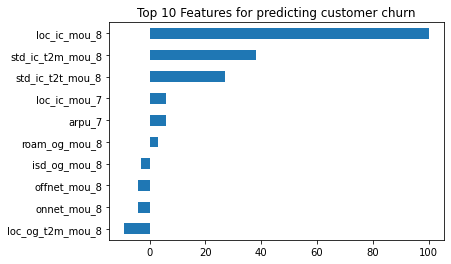

In [243]:
# Predictive power

pred_pow_top_10 = pred_pow[:10].sort_values()
(100 * pred_pow_top_10).plot.barh()
plt.title('Top 10 Features for predicting customer churn')
plt.show()

#### OBSERVATION

We could see that the top 10 features for predicting customer churn are:
1. Minutes of usage for local incoming calls during the month of August.
2. Minutes of usage for STD incoming calls from operator T to other networks during the month of August.
3. Minutes of usage for STD incoming calls from operator T to operator T during the month of August.
4. Minutes of usage for local incoming calls during the month of July.
5. Average revenue generated per user in the month of July.
6. Minutes of usage for outgoing calls during the month of August when customer is in the roaming zone.
7. Minutes of usage for ISD outgoing calls during the month of August.
8. Minutes of usage for all kinds of calls outside the operator T network during the month of August.
9. Minutes of usage for all kinds of calls within the operator T network during the month of August.
10. Minutes of usage for local outgoing calls from operator T to other networks during the month of August.

#### RECOMMENDATIONS

- Company can provide some freebies to attract offnet and onnet usage.
- Provide offers for Operator T to other operator mobile local users.
- The company needs to focus on the ISD rates. Perhaps, the rates are too high. Provide them with some kind of ISD packages.
- They needs to pay attention to the roaming rates as roaming outgoing minutes of usage is good for the company.
- As incoming call users minutes of usage is high. Some subscription for 30 day free trial period could be provided for referring a friend to the network. Or for a minimum recharge amount for 3 months some free services could be provided such as data usage for some days or few free outgoing calls.

**Area Under the Curve - Recursive Operating Characteristic (AUC-ROC)**

**NOTE!** Below ROC plots are screenshots taken from this notebook only. Subplots couldn't be created as these plots were plotted using ROC function (UDF) whereas, subplots uses 'matplotlib'. *ROC plots are deterministic under its corresponding model headings*. Below images of ROC plots are non-deterministic.

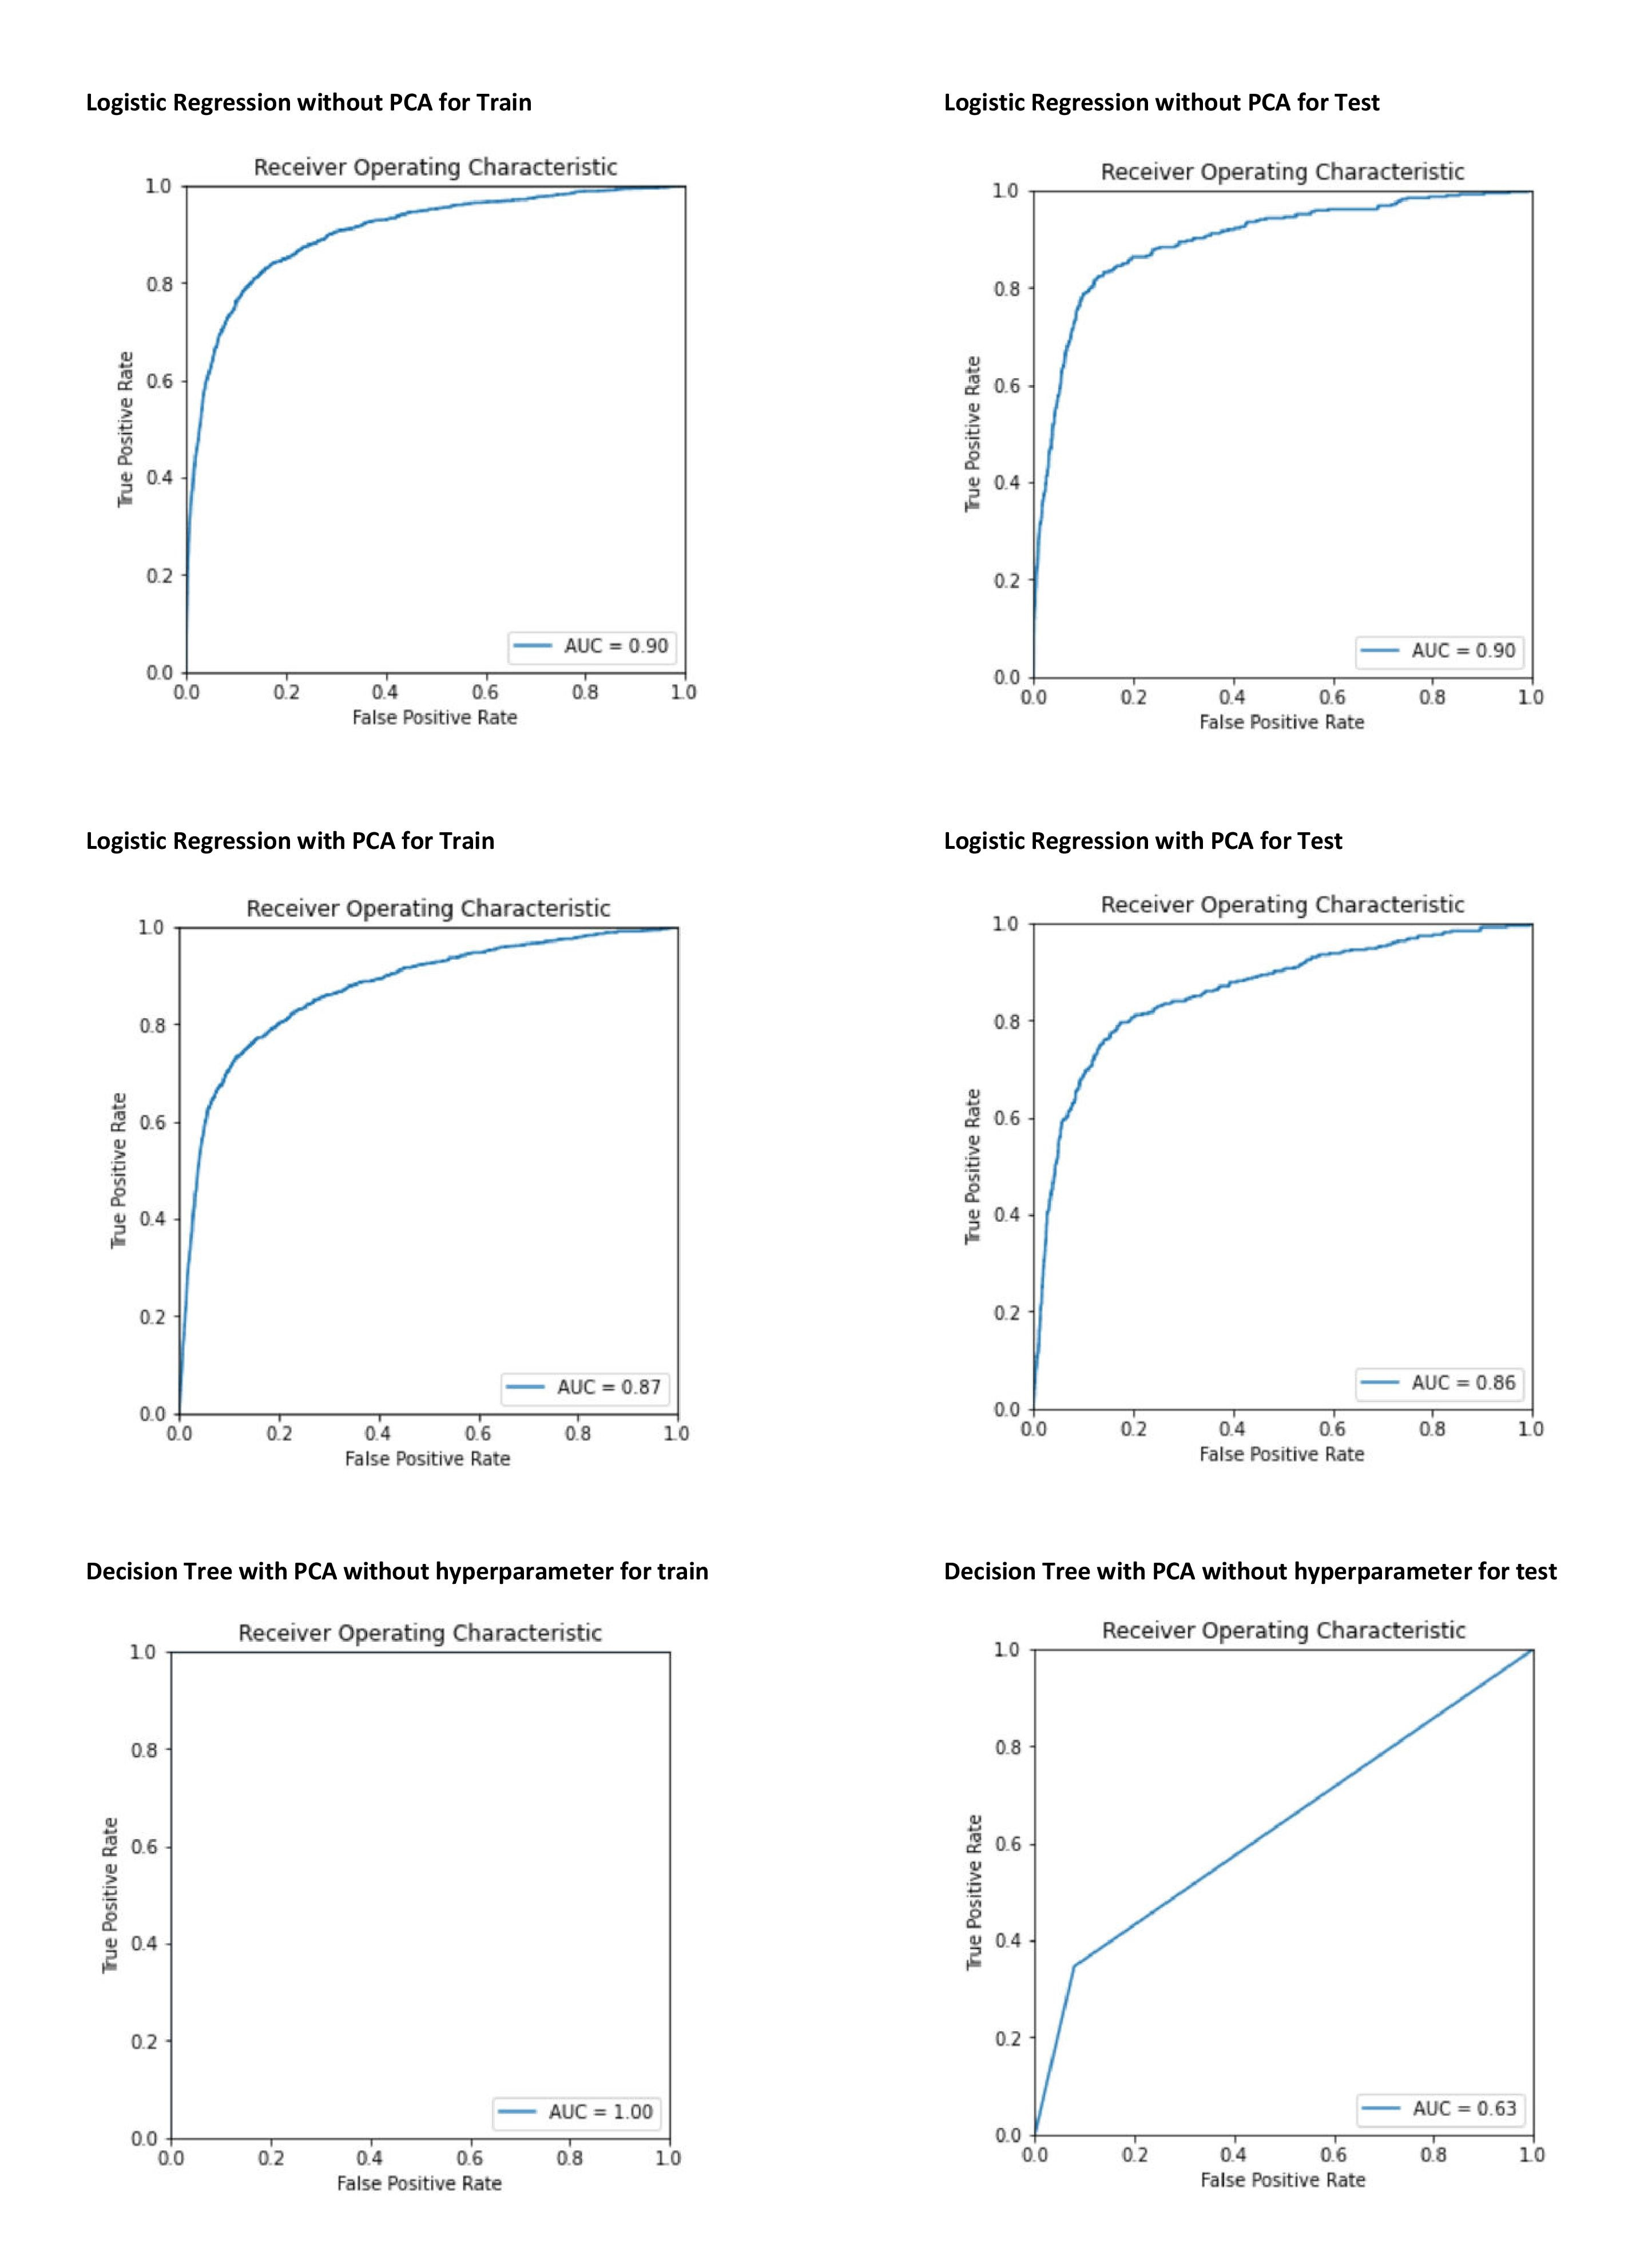

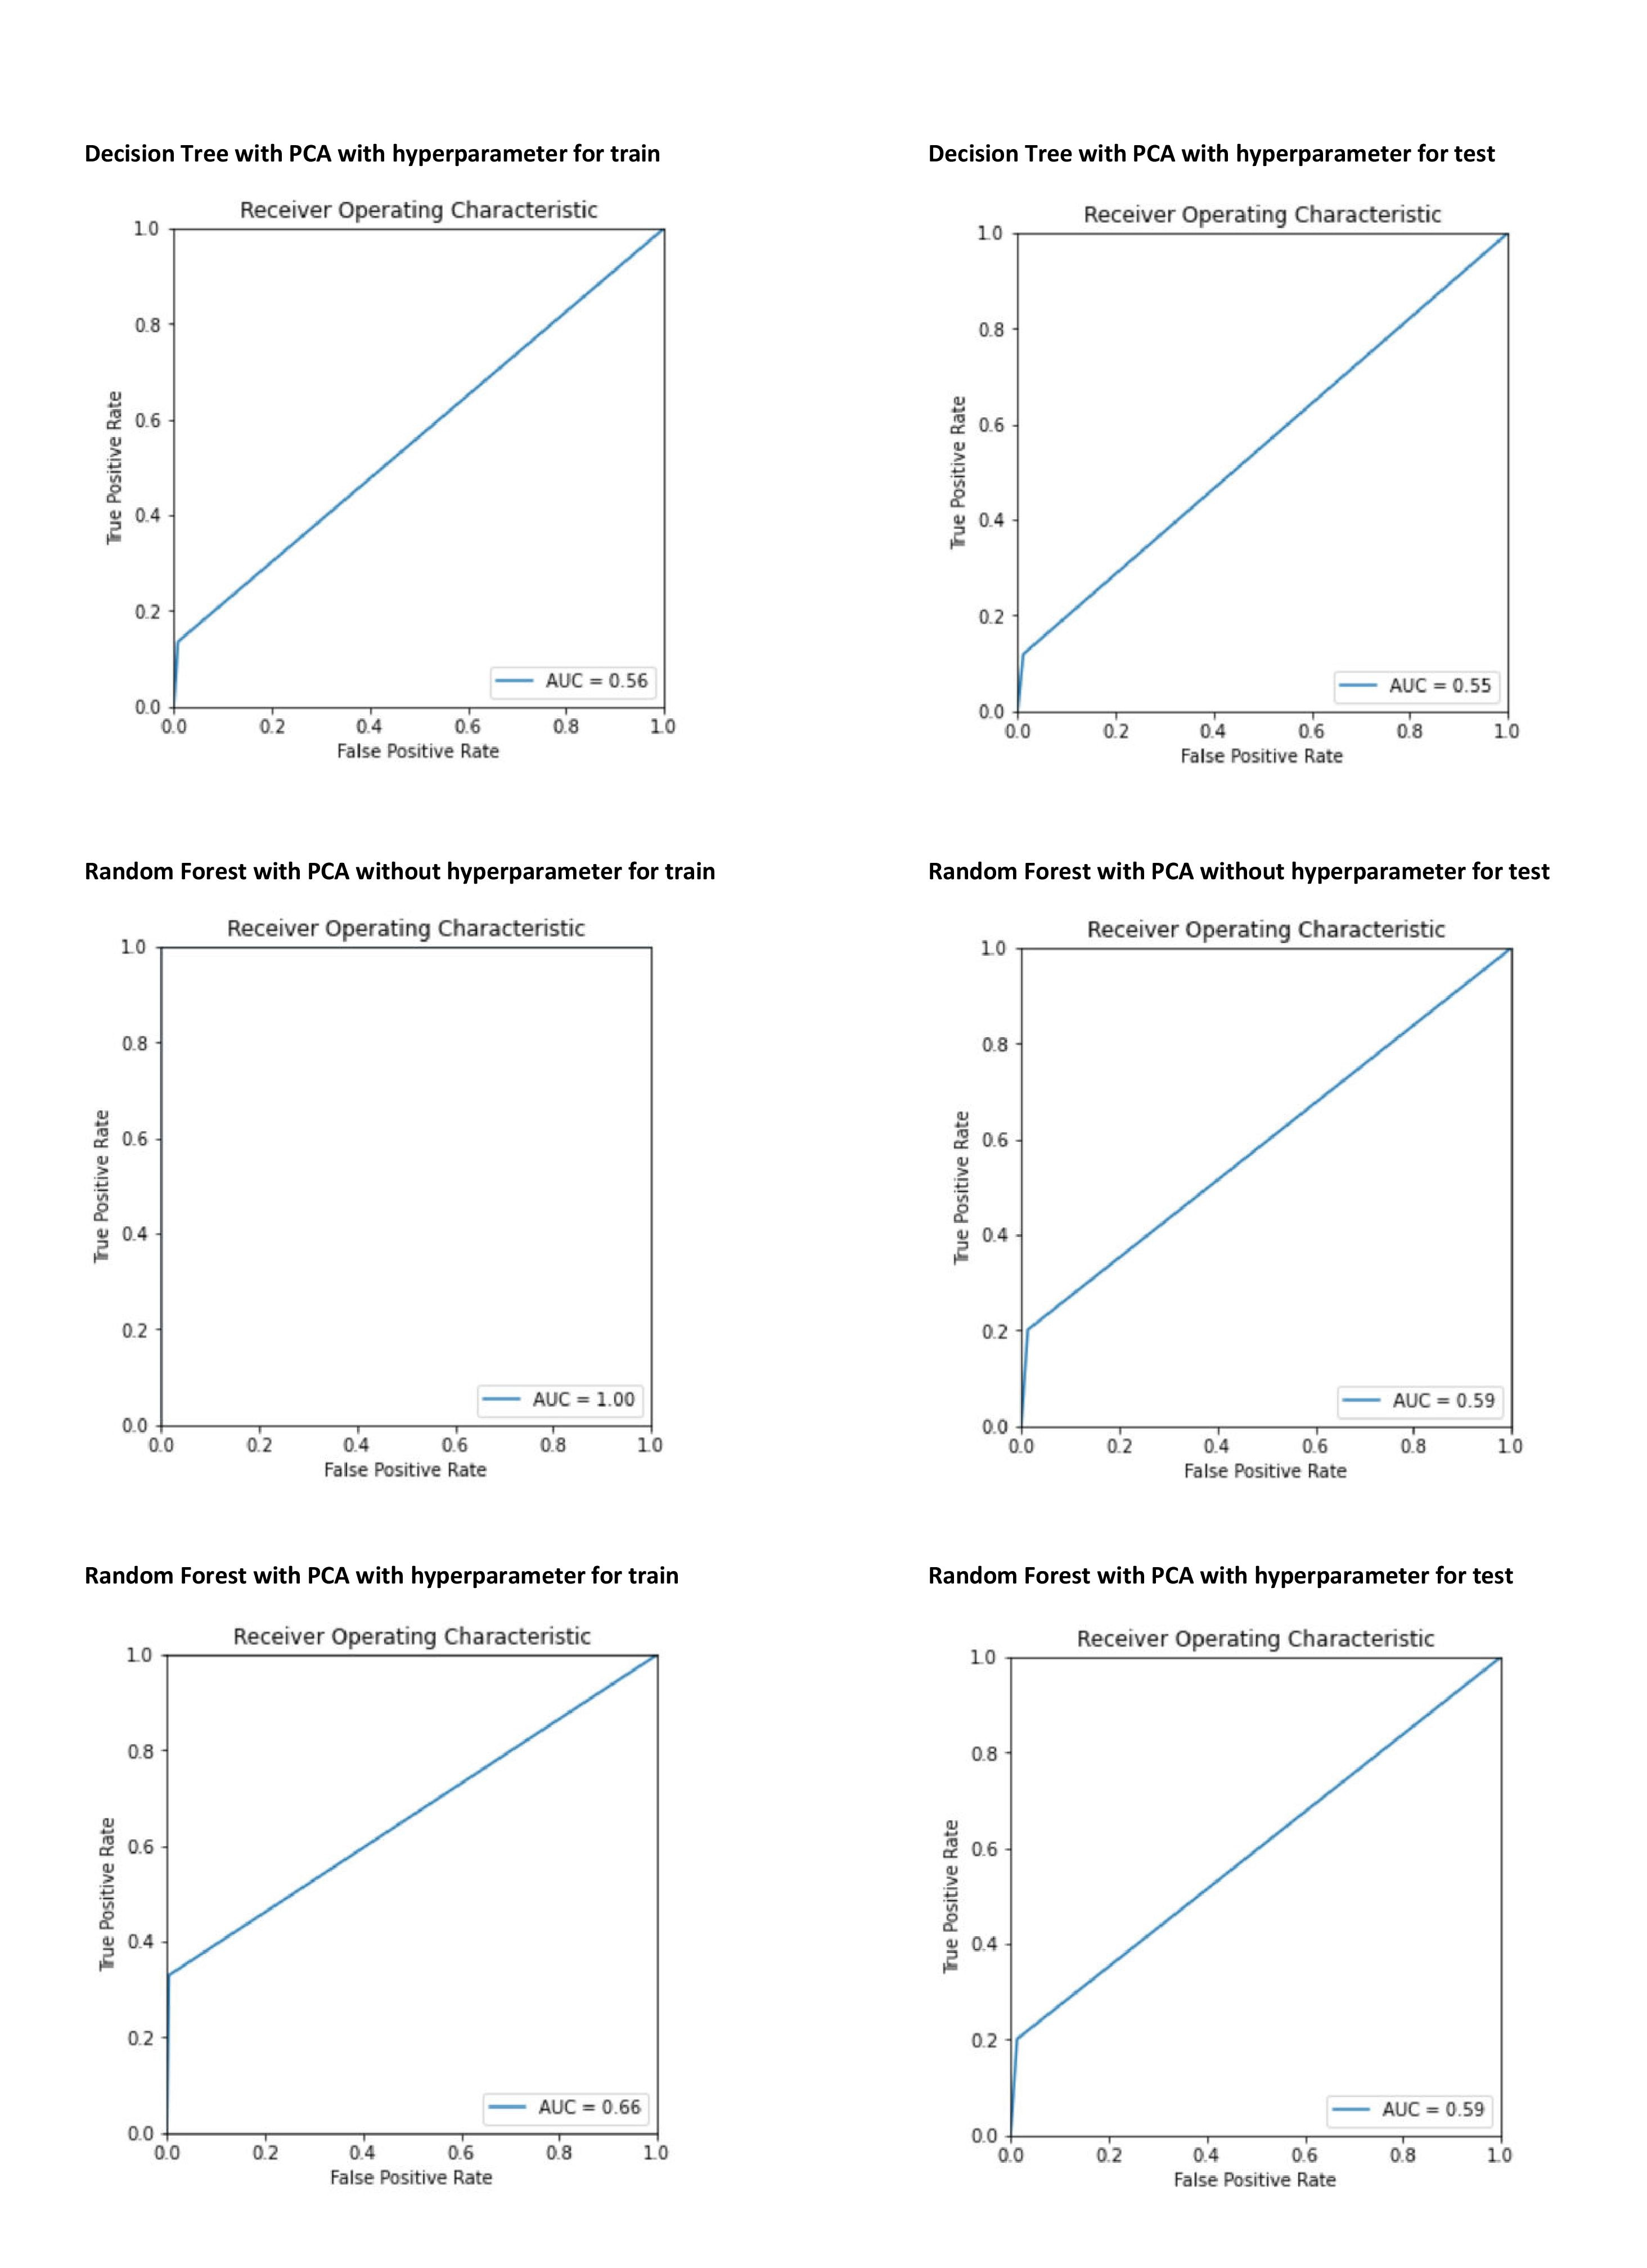

                                               -----------> end of code <-----------